In [6]:
# Start writing code here...import pandas as pd
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.simplefilter(action='ignore')

In [7]:
#df=pd.read_csv('financialdistress.csv')
fine_data = pd.read_excel ('C:\\Users\\Rideema Malji\\OneDrive\\Desktop\\Others\\Upwork\\model optimization\\new project\\fines_Input_File.xls', sheet_name='Sheet1',index_col= False)

In [8]:
fine_data.head()

Case No          Location  District council    Year  \
0      410   Whitby, Ontario                 6  2015.0   
1      411           Ontario                 6  2016.0   
2      413  Toronto, Ontario                 6  2011.0   
3      414  Montreal, Quebec                 9  2011.0   
4      415  Toronto, Ontario                 6  2014.0   

   Settled by other regulator  Type of hearing Type_of_hearing_new  \
0                         0.0              5.0           Contested   
1                         0.0              1.0          Settlement   
2                         0.0              2.0           Contested   
3                         0.0              1.0          Settlement   
4                         1.0              5.0           Contested   

   Offender appearance at hearing (the latest one)  \
0                                              1.0   
1                                              4.0   
2                                              4.0   
3                                              2.0   
4                                              2.0   

   Number of investors/clients involved  Total amount lost/affected  ...  \
0                                   1.0                       400.0  ...   
1                                   4.0                      3900.0  ...   
2                                   1.0                         0.0  ...   
3                                   1.0                         0.0  ...   
4                                   NaN                         0.0  ...   

   Fines imposed on individual offender  \
0                               50000.0   
1                               25000.0   
2                               35000.0   
3                               50000.0   
4                              625000.0   

   Enforcement costs individual offender  Quasi-Criminal offences  \
0                                50000.0                        0   
1                                 3000.0                        0   
2                                 8000.0                        1   
3                                 3000.0                        0   
4                               125000.0                        0   

  Conflict of Interest Offences  Improper Sales Practices  \
0                             0                         1   
1                             0                         3   
2                             0                         0   
3                             0                         2   
4                             0                         0   

   Internal Control Offences  Other offences  \
0                          0               1   
1                          0               0   
2                          0               1   
3                          0               0   
4                          1               2   

   Aggravating_Factors_Found_But_Not_Considered  Mitigating_Factors  \
0                                             2                   1   
1                                             2                   4   
2                                             1                   3   
3                                             2                   5   
4                                             1                   1   

   Aggravating_Factors_Found_And_Considered  
0                                         5  
1                                         1  
2                                         3  
3                                         3  
4                                        11  

[5 rows x 29 columns]

### Renaming the columns - Removing the space and replacing it with "_"

In [9]:
rename_columns = list(fine_data.columns)
rename_columns_new = [i.replace(" ", "_") for i in rename_columns ]
print(rename_columns_new)



['Case_No', 'Location', 'District_council', 'Year', 'Settled_by_other_regulator', 'Type_of_hearing', 'Type_of_hearing_new', 'Offender_appearance_at_hearing_(the_latest_one)', 'Number_of_investors/clients_involved', 'Total_amount_lost/affected', 'Total_amount_involved', 'Commissions_or_referral_fees_or_other_gains_received', 'Offender_highest_occupation', 'Firm_name_(the_one_when_offence_was_committed)', 'Firm_name', 'Firm_type_(the_one_when_offence_was_committed)', 'Offender_experience', 'Offender_gender', 'Disciplinary_history_individual_offender', 'Fines_imposed_on_individual_offender', 'Enforcement_costs_individual_offender', 'Quasi-Criminal_offences', 'Conflict_of_Interest_Offences', 'Improper_Sales_Practices', 'Internal_Control_Offences', 'Other_offences', 'Aggravating_Factors_Found_But_Not_Considered', 'Mitigating_Factors', 'Aggravating_Factors_Found_And_Considered']


In [10]:
fine_data.columns = rename_columns_new

In [11]:
fine_data.dtypes

Case_No                                                   int64
Location                                                 object
District_council                                          int64
Year                                                    float64
Settled_by_other_regulator                              float64
Type_of_hearing                                         float64
Type_of_hearing_new                                      object
Offender_appearance_at_hearing_(the_latest_one)         float64
Number_of_investors/clients_involved                    float64
Total_amount_lost/affected                              float64
Total_amount_involved                                   float64
Commissions_or_referral_fees_or_other_gains_received    float64
Offender_highest_occupation                             float64
Firm_name_(the_one_when_offence_was_committed)           object
Firm_name                                                 int64
Firm_type_(the_one_when_offence_was_comm

In [12]:
fine_data.head()

Case_No          Location  District_council    Year  \
0      410   Whitby, Ontario                 6  2015.0   
1      411           Ontario                 6  2016.0   
2      413  Toronto, Ontario                 6  2011.0   
3      414  Montreal, Quebec                 9  2011.0   
4      415  Toronto, Ontario                 6  2014.0   

   Settled_by_other_regulator  Type_of_hearing Type_of_hearing_new  \
0                         0.0              5.0           Contested   
1                         0.0              1.0          Settlement   
2                         0.0              2.0           Contested   
3                         0.0              1.0          Settlement   
4                         1.0              5.0           Contested   

   Offender_appearance_at_hearing_(the_latest_one)  \
0                                              1.0   
1                                              4.0   
2                                              4.0   
3                                              2.0   
4                                              2.0   

   Number_of_investors/clients_involved  Total_amount_lost/affected  ...  \
0                                   1.0                       400.0  ...   
1                                   4.0                      3900.0  ...   
2                                   1.0                         0.0  ...   
3                                   1.0                         0.0  ...   
4                                   NaN                         0.0  ...   

   Fines_imposed_on_individual_offender  \
0                               50000.0   
1                               25000.0   
2                               35000.0   
3                               50000.0   
4                              625000.0   

   Enforcement_costs_individual_offender  Quasi-Criminal_offences  \
0                                50000.0                        0   
1                                 3000.0                        0   
2                                 8000.0                        1   
3                                 3000.0                        0   
4                               125000.0                        0   

  Conflict_of_Interest_Offences  Improper_Sales_Practices  \
0                             0                         1   
1                             0                         3   
2                             0                         0   
3                             0                         2   
4                             0                         0   

   Internal_Control_Offences  Other_offences  \
0                          0               1   
1                          0               0   
2                          0               1   
3                          0               0   
4                          1               2   

   Aggravating_Factors_Found_But_Not_Considered  Mitigating_Factors  \
0                                             2                   1   
1                                             2                   4   
2                                             1                   3   
3                                             2                   5   
4                                             1                   1   

   Aggravating_Factors_Found_And_Considered  
0                                         5  
1                                         1  
2                                         3  
3                                         3  
4                                        11  

[5 rows x 29 columns]

### Dropping the variables that we dont need 

In [13]:
# drop unnecessery variables
fine_data = fine_data.drop(['Case_No','Type_of_hearing','Firm_name_(the_one_when_offence_was_committed)'], axis = 1)

In [14]:
fine_data.shape

(410, 26)

### Renaming the Dependent Variable - Giving a short name

In [15]:
fine_data = fine_data.rename(columns={'Fines_imposed_on_individual_offender': 'Fines_Imposed'})

### Cheking the Location Count

In [16]:
fine_data.groupby(['Location'])['Location'].agg("count")

Location
 Alberta,Calgary                      12
British Columbia                       3
Calgary, Alberta                      35
Charlettown, Prince edward Island      1
Charlottetown, PEI                     1
Halifax, Nova Scotia                   3
London, Ontario                        1
Monreal, Quebec                        1
Montral, Quebec                        1
Montreak, Quebec                       1
Montreal, Quebec                      16
Montréal, Québec                      28
New Brunswick                          1
New Brunswick District                 1
Nova Scotia, Halifax                   1
Ontario                               14
Pacific                                2
Pacific District                       7
Pacific District Council              11
Quebec, Montreal                      22
Québec                                11
Regina, Saskatchewan                   2
Rouyn-Noranda, Québec                  1
Saint John, New Brunswick              1
Saskatc

### Replacing the location with respective Province Name-

So that we can avoide sparseness within the data

In [17]:
 fine_data["Location"] = fine_data["Location"].replace({"British Columbia": "BC","Vancouver": "BC","Vancouver, BC": "BC","Vancouver, British Columbia": "BC","Whistler, BC": "BC"
                                                    ,"Monreal, Quebec": "QC","Montral, Quebec": "QC","Montreak, Quebec": "QC","Montreal, Quebec": "QC","Montréal, Québec": "QC","Quebec, Montreal": "QC","Québec": "QC","Rouyn-Noranda, Québec": "QC"
                                                    ,"London, Ontario": "ON","Ontario": "ON","Toronto, Ontario": "ON","Whitby, Ontario": "ON"
                                                    ," Alberta,Calgary": "AB","Calgary, Alberta": "AB"
                                                    ,"Regina, Saskatchewan": "SK","Saskatchewan": "SK","Saskatoon, Saskatchewan":"SK"
                                                    ,"New Brunswick": "NB","New Brunswick District": "NB","Saint John, New Brunswick":"NB"
                                                    ,"Halifax, Nova Scotia": "NS","Nova Scotia, Halifax": "NS"
                                                    ,"Winnipeg, Manitoba": "MB","Winnipeg,Manitoba": "MB"
                                                    ,"Charlettown, Prince edward Island": "PEI","Charlottetown, PEI": "PEI"
                                                    ,"Pacific District": "Pacific","Pacific District Council": "Pacific"

})

In [18]:
fine_data.groupby(['Location'])['Location'].agg("count")

Location
AB          47
BC          76
MB           6
NB           3
NS           4
ON         165
PEI          2
Pacific     20
QC          81
SK           6
Name: Location, dtype: int64

In [19]:
fine_data.groupby(['District_council'])['District_council'].agg("count")

District_council
1      46
2       6
3       2
5       4
6     166
7      20
8       2
9      82
10      6
11     67
12      9
Name: District_council, dtype: int64

In [20]:
 # Atlantic Canada includes the entire region — the provinces of 
 #New Brunswick, Nova Scotia, Prince Edward Island, and Newfoundland and Labrador. */


 # The Prairie Provinces -- Include Alberta, Saskatchewan, and Manitoba.
 
 fine_data["District_council"] = fine_data["District_council"].replace({1: "Prairie_Provinces",2:"Prairie_Provinces",3:"Atlantic_Provinces",4:"Atlantic_Provinces",5:"Atlantic_Provinces",6:"ON",
                                                                        7:"PACIFIC",8:"Atlantic_Provinces",9:"QC",10:"Prairie_Provinces",11:"BC",12:"BC"

})

In [21]:
fine_data.groupby(['District_council'])['District_council'].agg("count")

District_council
Atlantic_Provinces      8
BC                     76
ON                    166
PACIFIC                20
Prairie_Provinces      58
QC                     82
Name: District_council, dtype: int64

In [22]:
fine_data.groupby(['Offender_highest_occupation'])['Offender_highest_occupation'].agg("count")

Offender_highest_occupation
1.0    310
2.0     40
3.0     15
4.0     32
5.0      9
6.0      1
Name: Offender_highest_occupation, dtype: int64

In [23]:
 fine_data["Offender_highest_occupation"] = fine_data["Offender_highest_occupation"].replace({1: "Advisor",
                                                                        2:"Manager",3:"Executives",
                                                                        4:"Executives",5:"Advisor",6:"Manager"
})

In [24]:
fine_data.groupby(['Offender_highest_occupation'])['Offender_highest_occupation'].agg("count")

Offender_highest_occupation
Advisor       319
Executives     47
Manager        41
Name: Offender_highest_occupation, dtype: int64

In [20]:
# drop unnecessery variables
#fine_data = fine_data.drop(['Settled_by_other_regulator','Location'], axis = 1)

In [21]:
fine_data.head()

Location District_council    Year  Settled_by_other_regulator  \
0       ON               ON  2015.0                         0.0   
1       ON               ON  2016.0                         0.0   
2       ON               ON  2011.0                         0.0   
3       QC               QC  2011.0                         0.0   
4       ON               ON  2014.0                         1.0   

  Type_of_hearing_new  Offender_appearance_at_hearing_(the_latest_one)  \
0           Contested                                              1.0   
1          Settlement                                              4.0   
2           Contested                                              4.0   
3          Settlement                                              2.0   
4           Contested                                              2.0   

   Number_of_investors/clients_involved  Total_amount_lost/affected  \
0                                   1.0                       400.0   
1                                   4.0                      3900.0   
2                                   1.0                         0.0   
3                                   1.0                         0.0   
4                                   NaN                         0.0   

   Total_amount_involved  \
0                    NaN   
1                    NaN   
2                25000.0   
3             26000000.0   
4                    NaN   

   Commissions_or_referral_fees_or_other_gains_received  ... Fines_Imposed  \
0                                             3900.0     ...       50000.0   
1                                            22000.0     ...       25000.0   
2                                                NaN     ...       35000.0   
3                                           119500.0     ...       50000.0   
4                                                NaN     ...      625000.0   

   Enforcement_costs_individual_offender  Quasi-Criminal_offences  \
0                                50000.0                        0   
1                                 3000.0                        0   
2                                 8000.0                        1   
3                                 3000.0                        0   
4                               125000.0                        0   

   Conflict_of_Interest_Offences  Improper_Sales_Practices  \
0                              0                         1   
1                              0                         3   
2                              0                         0   
3                              0                         2   
4                              0                         0   

   Internal_Control_Offences  Other_offences  \
0                          0               1   
1                          0               0   
2                          0               1   
3                          0               0   
4                          1               2   

   Aggravating_Factors_Found_But_Not_Considered  Mitigating_Factors  \
0                                             2                   1   
1                                             2                   4   
2                                             1                   3   
3                                             2                   5   
4                                             1                   1   

   Aggravating_Factors_Found_And_Considered  
0                                         5  
1                                         1  
2                                         3  
3                                         3  
4                                        11  

[5 rows x 26 columns]

In [22]:
df = fine_data.copy()

In [23]:
df.describe().transpose()

count          mean  \
Year                                                409.0  2.012756e+03   
Settled_by_other_regulator                          243.0  5.761317e-02   
Offender_appearance_at_hearing_(the_latest_one)     392.0  2.311224e+00   
Number_of_investors/clients_involved                320.0  1.046875e+01   
Total_amount_lost/affected                          242.0  3.670881e+05   
Total_amount_involved                               235.0  3.158901e+06   
Commissions_or_referral_fees_or_other_gains_rec...  197.0  3.880586e+04   
Firm_name                                           410.0  2.951220e-01   
Firm_type_(the_one_when_offence_was_committed)      396.0  8.671717e+00   
Offender_experience                                 355.0  3.623239e+00   
Offender_gender                                     409.0  8.899756e-01   
Disciplinary_history_individual_offender            330.0  1.090909e-01   
Fines_Imposed                                       364.0  7.989235e+04   
Enforcement_costs_individual_offender               356.0  1.239591e+04   
Quasi-Criminal_offences                             410.0  1.634146e-01   
Conflict_of_Interest_Offences                       410.0  4.439024e-01   
Improper_Sales_Practices                            410.0  1.292683e+00   
Internal_Control_Offences                           410.0  5.902439e-01   
Other_offences                                      410.0  8.878049e-01   
Aggravating_Factors_Found_But_Not_Considered        410.0  8.268293e-01   
Mitigating_Factors                                  410.0  3.180488e+00   
Aggravating_Factors_Found_And_Considered            410.0  3.141463e+00   

                                                             std       min  \
Year                                                3.066881e+00   2006.00   
Settled_by_other_regulator                          2.334914e-01      0.00   
Offender_appearance_at_hearing_(the_latest_one)     1.114919e+00      1.00   
Number_of_investors/clients_involved                3.170305e+01      0.00   
Total_amount_lost/affected                          2.226420e+06      0.00   
Total_amount_involved                               1.103742e+07      0.00   
Commissions_or_referral_fees_or_other_gains_rec...  9.311670e+04 -50000.00   
Firm_name                                           4.566548e-01      0.00   
Firm_type_(the_one_when_offence_was_committed)      1.513921e+00      1.00   
Offender_experience                                 1.842431e+00      0.25   
Offender_gender                                     3.133035e-01      0.00   
Disciplinary_history_individual_offender            3.122267e-01      0.00   
Fines_Imposed                                       1.675878e+05      0.00   
Enforcement_costs_individual_offender               1.991147e+04      0.00   
Quasi-Criminal_offences                             4.896264e-01      0.00   
Conflict_of_Interest_Offences                       9.603506e-01      0.00   
Improper_Sales_Practices                            1.662824e+00      0.00   
Internal_Control_Offences                           1.202240e+00      0.00   
Other_offences                                      1.253688e+00      0.00   
Aggravating_Factors_Found_But_Not_Considered        1.301405e+00      0.00   
Mitigating_Factors                                  2.591430e+00      0.00   
Aggravating_Factors_Found_And_Considered            2.924392e+00      0.00   

                                                        25%         50%  \
Year                                                 2010.0    2012.000   
Settled_by_other_regulator                              0.0       0.000   
Offender_appearance_at_hearing_(the_latest_one)         2.0       2.000   
Number_of_investors/clients_involved                    1.0       3.000   
Total_amount_lost/affected                              0.0   11367.975   
Total_amount_involved                               90000.0  352000.000   
Commis

In [24]:
# Check for missing values
def check_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percentage = round(df.isnull().sum() / df.isnull().count() * 100, 1).sort_values(ascending=False)

    missing_data = pd.concat([total, percentage], axis=1, keys=['Total Missing Count', 'Missing %'])
    return missing_data

### Cheking the missing value %

In [25]:
check_missing(df)

Total Missing Count  \
Commissions_or_referral_fees_or_other_gains_rec...                  213   
Total_amount_involved                                               175   
Total_amount_lost/affected                                          168   
Settled_by_other_regulator                                          167   
Number_of_investors/clients_involved                                 90   
Disciplinary_history_individual_offender                             80   
Offender_experience                                                  55   
Enforcement_costs_individual_offender                                54   
Fines_Imposed                                                        46   
Offender_appearance_at_hearing_(the_latest_one)                      18   
Firm_type_(the_one_when_offence_was_committed)                       14   
Offender_highest_occupation                                           3   
Offender_gender                                                       1   
Year                                                                  1   
Mitigating_Factors                                                    0   
Improper_Sales_Practices                                              0   
Aggravating_Factors_Found_But_Not_Considered                          0   
Other_offences                                                        0   
Internal_Control_Offences                                             0   
Location                                                              0   
Conflict_of_Interest_Offences                                         0   
Quasi-Criminal_offences                                               0   
District_council                                                      0   
Firm_name                                                             0   
Type_of_hearing_new                                                   0   
Aggravating_Factors_Found_And_Considered                              0   

                                                    Missing %  
Commissions_or_referral_fees_or_other_gains_rec...       52.0  
Total_amount_involved                                    42.7  
Total_amount_lost/affected                               41.0  
Settled_by_other_regulator                               40.7  
Number_of_investors/clients_involved                     22.0  
Disciplinary_history_individual_offender                 19.5  
Offender_experience                                      13.4  
Enforcement_costs_individual_offender                    13.2  
Fines_Imposed                                            11.2  
Offender_appearance_at_hearing_(the_latest_one)           4.4  
Firm_type_(the_one_when_offence_was_committed)            3.4  
Offender_highest_occupation                               0.7  
Offender_gender                                           0.2  
Year                                                      0.2  
Mitigating_Factors                                        0.0  
Improper_Sales_Practices                                  0.0  
Aggravating_Factors_Found_But_Not_Considered              0.0  
Other_offences                                            0.0  
Internal_Control_Offences                                 0.0  
Location                                                  0.0  
Conflict_of_Interest_Offences                             0.0  
Quasi-Criminal_offences                                   0.0  
District_council                                          0.0  
Firm_name                                                 0.0  
Type_of_hearing_new                                       0.0  
Aggravating_Factors_Found_And_Considered                  0.0

In [26]:
from sklearn.impute import KNNImputer

In [27]:
...
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [28]:
columns_to_impute_using_KNN = ['Commissions_or_referral_fees_or_other_gains_received',
                     'Total_amount_involved',
                     'Total_amount_lost/affected',
                     'Settled_by_other_regulator',
                     'Number_of_investors/clients_involved',
                     'Disciplinary_history_individual_offender',
                     'Offender_experience',
                     'Offender_appearance_at_hearing_(the_latest_one)',
                     'Firm_type_(the_one_when_offence_was_committed)',
                     
                     'Enforcement_costs_individual_offender',
                     'Fines_Imposed'
                     
                     ]

In [29]:
df1 = imputer.fit_transform(df[columns_to_impute_using_KNN])

In [30]:
df2 = pd.DataFrame(df1,columns=columns_to_impute_using_KNN)

In [31]:
df2

Commissions_or_referral_fees_or_other_gains_received  \
0                                             3900.000      
1                                            22000.000      
2                                            25650.902      
3                                           119500.000      
4                                           100000.000      
..                                                 ...      
405                                          36562.600      
406                                          12662.600      
407                                          27591.872      
408                                           4370.198      
409                                          55899.112      

     Total_amount_involved  Total_amount_lost/affected  \
0             3.306794e+06                       400.0   
1             3.867266e+06                      3900.0   
2             2.500000e+04                         0.0   
3             2.600000e+07                         0.0   
4             2.773995e+07                         0.0   
..                     ...                         ...   
405           8.442997e+06                    155819.2   
406           3.331794e+06                     60800.0   
407           1.500000e+07                    101557.2   
408           4.120000e+05                    132000.0   
409           1.525638e+07                    322000.0   

     Settled_by_other_regulator  Number_of_investors/clients_involved  \
0                           0.0                                   1.0   
1                           0.0                                   4.0   
2                           0.0                                   1.0   
3                           0.0                                   1.0   
4                           1.0                                  19.0   
..                          ...                                   ...   
405                         0.0                                   2.0   
406                         0.0                                   1.0   
407                         0.0                                   2.0   
408                         0.0                                   2.0   
409                         0.0                                  23.0   

     Disciplinary_history_individual_offender  Offender_experience  \
0                                         0.0                  3.0   
1                                         0.0                  2.0   
2                                         0.0                  2.0   
3                                         0.0                  5.0   
4                                         0.0                  3.0   
..                                        ...                  ...   
405                                       1.0                  4.0   
406                                       0.0                  2.8   
407                                       0.2                  4.0   
408                                       0.0                  3.6   
409                                       1.0                  2.8   

     Offender_appearance_at_hearing_(the_latest_one)  \
0                                                1.0   
1                                                4.0   
2                                                4.0   
3                                                2.0   
4                                                2.0   
..                                               ...   
405                                              3.0   
406                                              3.0   
407                                              2.6   
408                                              3.0   
409                                              2.0   

     Firm_type_(the_one_when_offence_was_committed)  \
0                                               9.0   
1                                               9.0   
2                  

In [32]:
print(df.shape)
print(df2.shape)

(410, 26)
(410, 11)


In [33]:
check_missing(df2)

Total Missing Count  \
Commissions_or_referral_fees_or_other_gains_rec...                    0   
Total_amount_involved                                                 0   
Total_amount_lost/affected                                            0   
Settled_by_other_regulator                                            0   
Number_of_investors/clients_involved                                  0   
Disciplinary_history_individual_offender                              0   
Offender_experience                                                   0   
Offender_appearance_at_hearing_(the_latest_one)                       0   
Firm_type_(the_one_when_offence_was_committed)                        0   
Enforcement_costs_individual_offender                                 0   
Fines_Imposed                                                         0   

                                                    Missing %  
Commissions_or_referral_fees_or_other_gains_rec...        0.0  
Total_amount_involved                                     0.0  
Total_amount_lost/affected                                0.0  
Settled_by_other_regulator                                0.0  
Number_of_investors/clients_involved                      0.0  
Disciplinary_history_individual_offender                  0.0  
Offender_experience                                       0.0  
Offender_appearance_at_hearing_(the_latest_one)           0.0  
Firm_type_(the_one_when_offence_was_committed)            0.0  
Enforcement_costs_individual_offender                     0.0  
Fines_Imposed                                             0.0

In [34]:
result = pd.concat([df.drop(columns_to_impute_using_KNN, axis =1), df2], axis=1)

In [35]:
result.head()

Location District_council    Year Type_of_hearing_new  \
0       ON               ON  2015.0           Contested   
1       ON               ON  2016.0          Settlement   
2       ON               ON  2011.0           Contested   
3       QC               QC  2011.0          Settlement   
4       ON               ON  2014.0           Contested   

  Offender_highest_occupation  Firm_name  Offender_gender  \
0                     Advisor          0              1.0   
1                     Advisor          1              1.0   
2                     Advisor          1              1.0   
3                     Advisor          0              1.0   
4                  Executives          0              1.0   

   Quasi-Criminal_offences  Conflict_of_Interest_Offences  \
0                        0                              0   
1                        0                              0   
2                        1                              0   
3                        0                              0   
4                        0                              0   

   Improper_Sales_Practices  ...  Total_amount_involved  \
0                         1  ...           3.306794e+06   
1                         3  ...           3.867266e+06   
2                         0  ...           2.500000e+04   
3                         2  ...           2.600000e+07   
4                         0  ...           2.773995e+07   

   Total_amount_lost/affected  Settled_by_other_regulator  \
0                       400.0                         0.0   
1                      3900.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         1.0   

   Number_of_investors/clients_involved  \
0                                   1.0   
1                                   4.0   
2                                   1.0   
3                                   1.0   
4                                  19.0   

   Disciplinary_history_individual_offender  Offender_experience  \
0                                       0.0                  3.0   
1                                       0.0                  2.0   
2                                       0.0                  2.0   
3                                       0.0                  5.0   
4                                       0.0                  3.0   

   Offender_appearance_at_hearing_(the_latest_one)  \
0                                              1.0   
1                                              4.0   
2                                              4.0   
3                                              2.0   
4                                              2.0   

   Firm_type_(the_one_when_offence_was_committed)  \
0                                             9.0   
1                                             9.0   
2                                             9.0   
3                                             9.0   
4                                             3.0   

   Enforcement_costs_individual_offender  Fines_Imposed  
0                                50000.0        50000.0  
1                                 3000.0        25000.0  
2                                 8000.0        35000.0  
3                                 3000.0        50000.0  
4                               125000.0       625000.0  

[5 rows x 26 columns]

In [36]:
check_missing(result)

Total Missing Count  \
Offender_highest_occupation                                           3   
Year                                                                  1   
Offender_gender                                                       1   
Location                                                              0   
Commissions_or_referral_fees_or_other_gains_rec...                    0   
Enforcement_costs_individual_offender                                 0   
Firm_type_(the_one_when_offence_was_committed)                        0   
Offender_appearance_at_hearing_(the_latest_one)                       0   
Offender_experience                                                   0   
Disciplinary_history_individual_offender                              0   
Number_of_investors/clients_involved                                  0   
Settled_by_other_regulator                                            0   
Total_amount_lost/affected                                            0   
Total_amount_involved                                                 0   
Mitigating_Factors                                                    0   
Aggravating_Factors_Found_And_Considered                              0   
District_council                                                      0   
Aggravating_Factors_Found_But_Not_Considered                          0   
Other_offences                                                        0   
Internal_Control_Offences                                             0   
Improper_Sales_Practices                                              0   
Conflict_of_Interest_Offences                                         0   
Quasi-Criminal_offences                                               0   
Firm_name                                                             0   
Type_of_hearing_new                                                   0   
Fines_Imposed                                                         0   

                                                    Missing %  
Offender_highest_occupation                               0.7  
Year                                                      0.2  
Offender_gender                                           0.2  
Location                                                  0.0  
Commissions_or_referral_fees_or_other_gains_rec...        0.0  
Enforcement_costs_individual_offender                     0.0  
Firm_type_(the_one_when_offence_was_committed)            0.0  
Offender_appearance_at_hearing_(the_latest_one)           0.0  
Offender_experience                                       0.0  
Disciplinary_history_individual_offender                  0.0  
Number_of_investors/clients_involved                      0.0  
Settled_by_other_regulator                                0.0  
Total_amount_lost/affected                                0.0  
Total_amount_involved                                     0.0  
Mitigating_Factors                                        0.0  
Aggravating_Factors_Found_And_Considered                  0.0  
District_council                                          0.0  
Aggravating_Factors_Found_But_Not_Considered              0.0  
Other_offences                                            0.0  
Internal_Control_Offences                                 0.0  
Improper_Sales_Practices                                  0.0  
Conflict_of_Interest_Offences                             0.0  
Quasi-Criminal_offences                                   0.0  
Firm_name                                                 0.0  
Type_of_hearing_new                                       0.0  
Fines_Imposed                                             0.0

### Missing Value Imputation- with their MOD value

In [37]:
Mod_Missing_Variables = ['Offender_gender','Year','Offender_highest_occupation']

In [38]:
#Function to replace NAN values with mode value
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
    # DataFrame[ColName] = DataFrame[ColName]
     DataFrame[ColName].fillna(most_frequent_category,inplace=True)


In [39]:
#Call function to impute most occured category
for Columns in Mod_Missing_Variables:
    impute_nan_most_frequent_category(result,Columns)

In [40]:
check_missing(result)

Total Missing Count  \
Location                                                              0   
District_council                                                      0   
Enforcement_costs_individual_offender                                 0   
Firm_type_(the_one_when_offence_was_committed)                        0   
Offender_appearance_at_hearing_(the_latest_one)                       0   
Offender_experience                                                   0   
Disciplinary_history_individual_offender                              0   
Number_of_investors/clients_involved                                  0   
Settled_by_other_regulator                                            0   
Total_amount_lost/affected                                            0   
Total_amount_involved                                                 0   
Commissions_or_referral_fees_or_other_gains_rec...                    0   
Aggravating_Factors_Found_And_Considered                              0   
Mitigating_Factors                                                    0   
Aggravating_Factors_Found_But_Not_Considered                          0   
Other_offences                                                        0   
Internal_Control_Offences                                             0   
Improper_Sales_Practices                                              0   
Conflict_of_Interest_Offences                                         0   
Quasi-Criminal_offences                                               0   
Offender_gender                                                       0   
Firm_name                                                             0   
Offender_highest_occupation                                           0   
Type_of_hearing_new                                                   0   
Year                                                                  0   
Fines_Imposed                                                         0   

                                                    Missing %  
Location                                                  0.0  
District_council                                          0.0  
Enforcement_costs_individual_offender                     0.0  
Firm_type_(the_one_when_offence_was_committed)            0.0  
Offender_appearance_at_hearing_(the_latest_one)           0.0  
Offender_experience                                       0.0  
Disciplinary_history_individual_offender                  0.0  
Number_of_investors/clients_involved                      0.0  
Settled_by_other_regulator                                0.0  
Total_amount_lost/affected                                0.0  
Total_amount_involved                                     0.0  
Commissions_or_referral_fees_or_other_gains_rec...        0.0  
Aggravating_Factors_Found_And_Considered                  0.0  
Mitigating_Factors                                        0.0  
Aggravating_Factors_Found_But_Not_Considered              0.0  
Other_offences                                            0.0  
Internal_Control_Offences                                 0.0  
Improper_Sales_Practices                                  0.0  
Conflict_of_Interest_Offences                             0.0  
Quasi-Criminal_offences                                   0.0  
Offender_gender                                           0.0  
Firm_name                                                 0.0  
Offender_highest_occupation                               0.0  
Type_of_hearing_new                                       0.0  
Year                                                      0.0  
Fines_Imposed                                             0.0

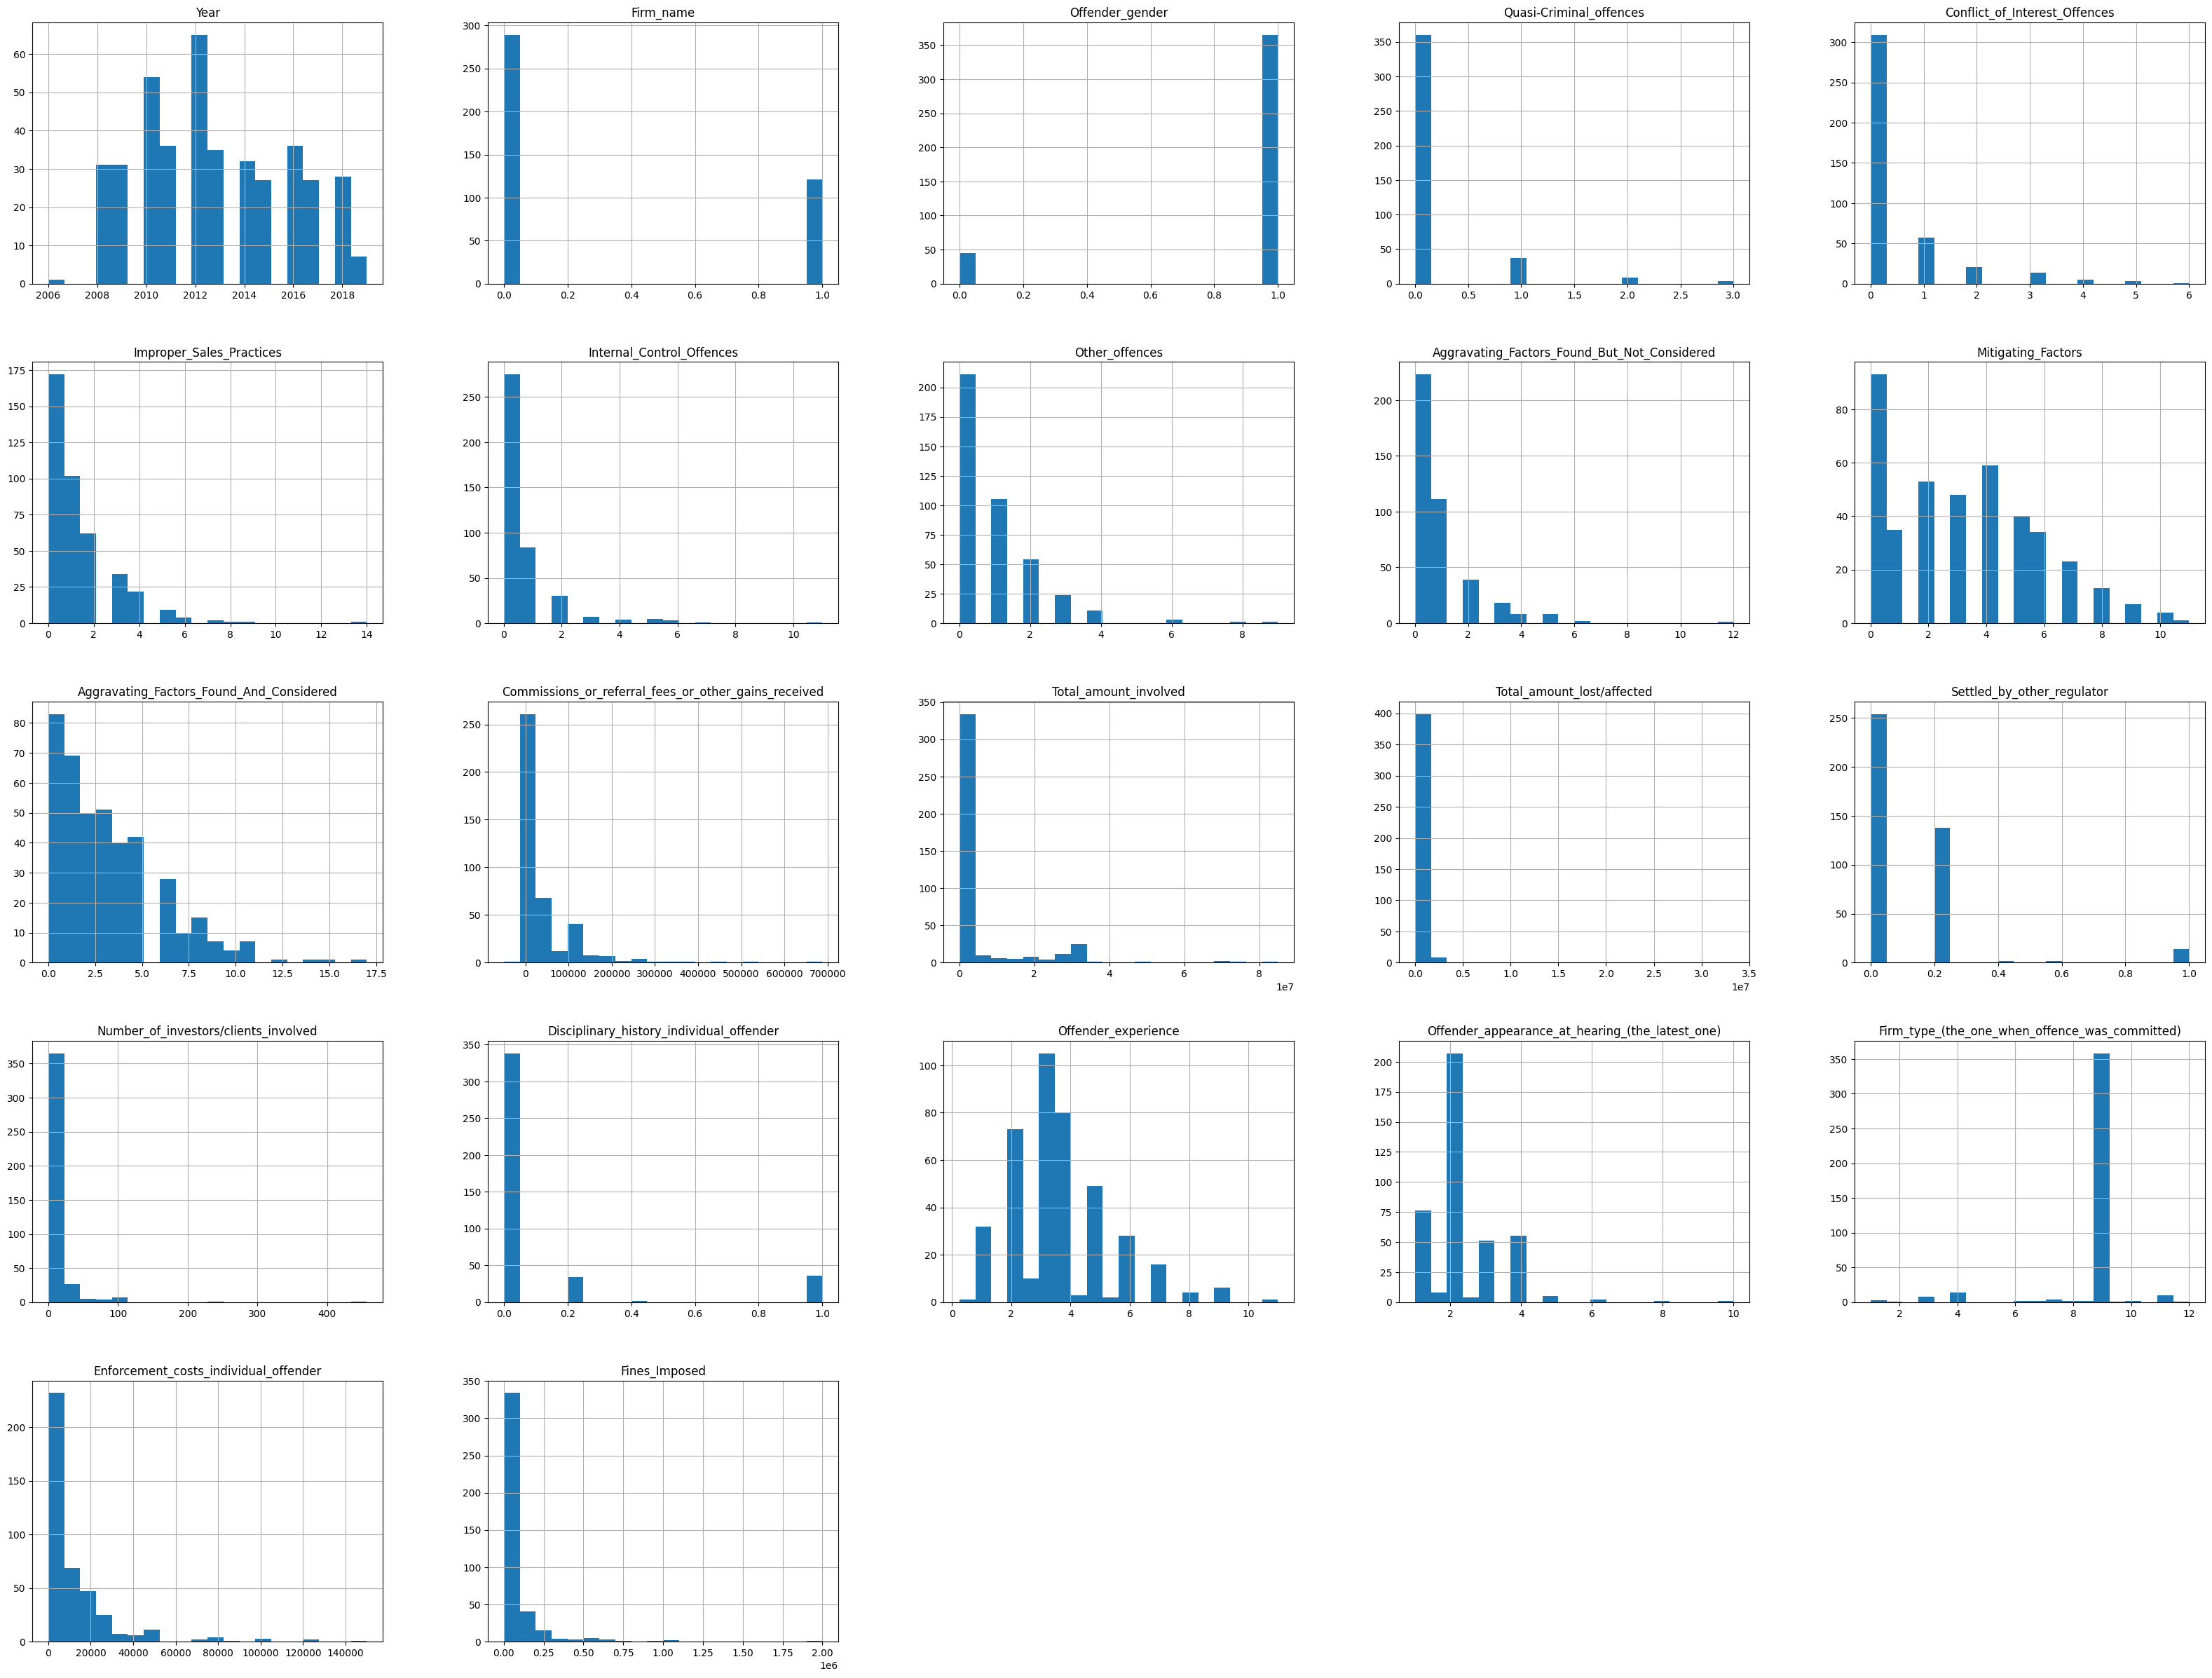

In [41]:
%matplotlib inline
result.hist(bins=20, figsize=(40,30))
plt.show()

In [42]:
check_missing(result)

Total Missing Count  \
Location                                                              0   
District_council                                                      0   
Enforcement_costs_individual_offender                                 0   
Firm_type_(the_one_when_offence_was_committed)                        0   
Offender_appearance_at_hearing_(the_latest_one)                       0   
Offender_experience                                                   0   
Disciplinary_history_individual_offender                              0   
Number_of_investors/clients_involved                                  0   
Settled_by_other_regulator                                            0   
Total_amount_lost/affected                                            0   
Total_amount_involved                                                 0   
Commissions_or_referral_fees_or_other_gains_rec...                    0   
Aggravating_Factors_Found_And_Considered                              0   
Mitigating_Factors                                                    0   
Aggravating_Factors_Found_But_Not_Considered                          0   
Other_offences                                                        0   
Internal_Control_Offences                                             0   
Improper_Sales_Practices                                              0   
Conflict_of_Interest_Offences                                         0   
Quasi-Criminal_offences                                               0   
Offender_gender                                                       0   
Firm_name                                                             0   
Offender_highest_occupation                                           0   
Type_of_hearing_new                                                   0   
Year                                                                  0   
Fines_Imposed                                                         0   

                                                    Missing %  
Location                                                  0.0  
District_council                                          0.0  
Enforcement_costs_individual_offender                     0.0  
Firm_type_(the_one_when_offence_was_committed)            0.0  
Offender_appearance_at_hearing_(the_latest_one)           0.0  
Offender_experience                                       0.0  
Disciplinary_history_individual_offender                  0.0  
Number_of_investors/clients_involved                      0.0  
Settled_by_other_regulator                                0.0  
Total_amount_lost/affected                                0.0  
Total_amount_involved                                     0.0  
Commissions_or_referral_fees_or_other_gains_rec...        0.0  
Aggravating_Factors_Found_And_Considered                  0.0  
Mitigating_Factors                                        0.0  
Aggravating_Factors_Found_But_Not_Considered              0.0  
Other_offences                                            0.0  
Internal_Control_Offences                                 0.0  
Improper_Sales_Practices                                  0.0  
Conflict_of_Interest_Offences                             0.0  
Quasi-Criminal_offences                                   0.0  
Offender_gender                                           0.0  
Firm_name                                                 0.0  
Offender_highest_occupation                               0.0  
Type_of_hearing_new                                       0.0  
Year                                                      0.0  
Fines_Imposed                                             0.0

In [43]:
df = result.copy()

In [44]:
fig = plt.figure(figsize=(40,15),dpi=400)
sns.set(font_scale=2)
sns.countplot(data = df, x = 'Location')

ax = sns.countplot(x="Location", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()


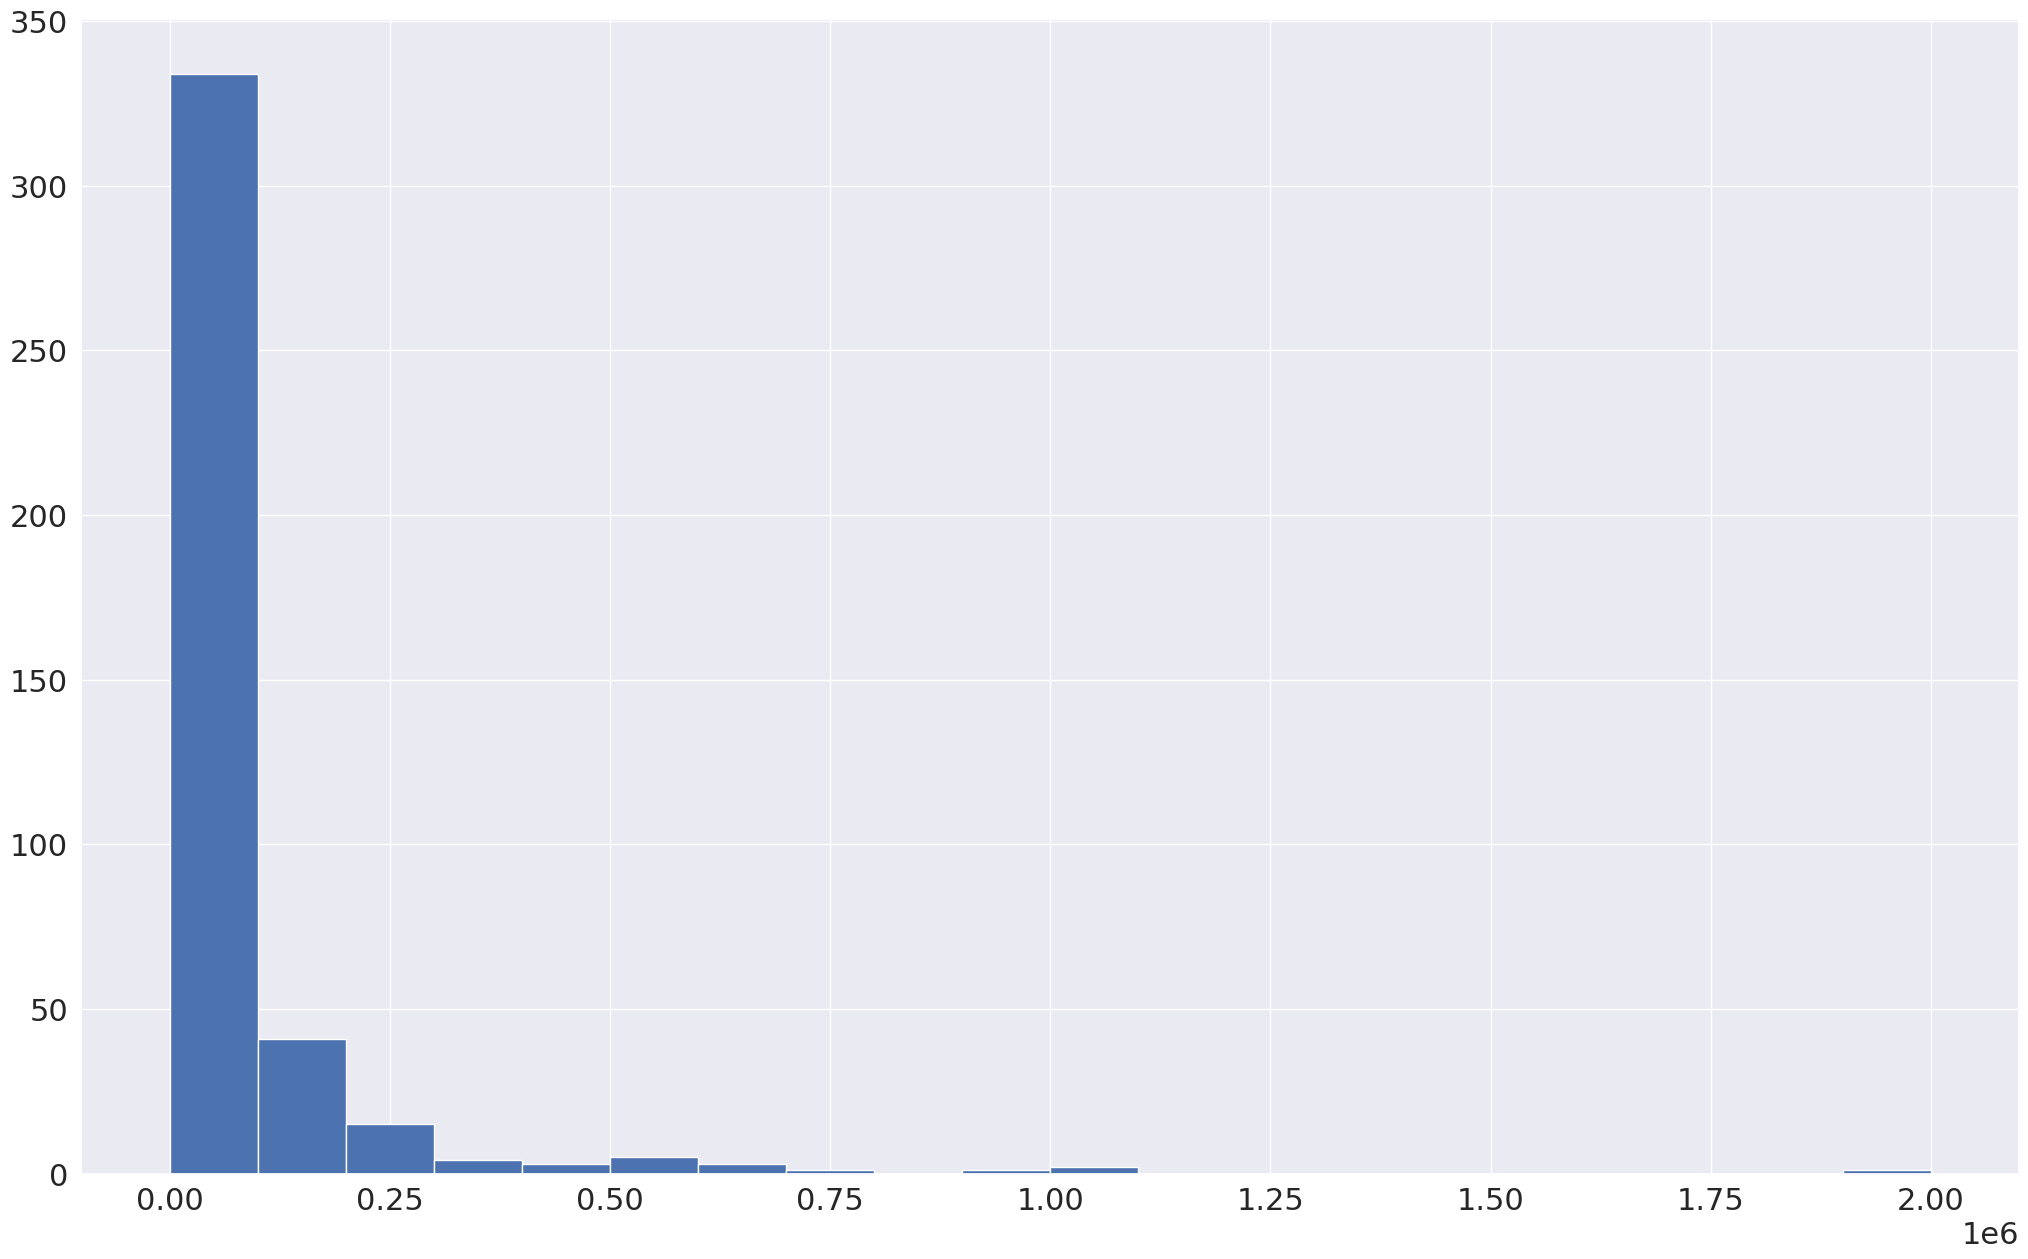

In [45]:
%matplotlib inline
(df['Fines_Imposed']).hist(bins=20, figsize=(25,15))
plt.show() 

### Log Transformation for Dependent variable - because it was Right Skewed 

In [46]:
log_var = ['Fines_Imposed']

for j in range (len (log_var)) :
    var = log_var[j]
    transformed_log = "Log_"+ var
    transformed_anti_log = "Anti_log_"+ var
#    transformed =  var
#    df[transformed_log] = np.log(df[var]+1)
    df[transformed_log] = np.round(np.log(df[var]+1),3)
    df[transformed_anti_log] = np.round(np.exp(df[transformed_log]))

In [47]:
#df.describe().transpose()

In [48]:
df.head()

Location District_council    Year Type_of_hearing_new  \
0       ON               ON  2015.0           Contested   
1       ON               ON  2016.0          Settlement   
2       ON               ON  2011.0           Contested   
3       QC               QC  2011.0          Settlement   
4       ON               ON  2014.0           Contested   

  Offender_highest_occupation  Firm_name  Offender_gender  \
0                     Advisor          0              1.0   
1                     Advisor          1              1.0   
2                     Advisor          1              1.0   
3                     Advisor          0              1.0   
4                  Executives          0              1.0   

   Quasi-Criminal_offences  Conflict_of_Interest_Offences  \
0                        0                              0   
1                        0                              0   
2                        1                              0   
3                        0                              0   
4                        0                              0   

   Improper_Sales_Practices  ...  Settled_by_other_regulator  \
0                         1  ...                         0.0   
1                         3  ...                         0.0   
2                         0  ...                         0.0   
3                         2  ...                         0.0   
4                         0  ...                         1.0   

   Number_of_investors/clients_involved  \
0                                   1.0   
1                                   4.0   
2                                   1.0   
3                                   1.0   
4                                  19.0   

   Disciplinary_history_individual_offender  Offender_experience  \
0                                       0.0                  3.0   
1                                       0.0                  2.0   
2                                       0.0                  2.0   
3                                       0.0                  5.0   
4                                       0.0                  3.0   

   Offender_appearance_at_hearing_(the_latest_one)  \
0                                              1.0   
1                                              4.0   
2                                              4.0   
3                                              2.0   
4                                              2.0   

   Firm_type_(the_one_when_offence_was_committed)  \
0                                             9.0   
1                                             9.0   
2                                             9.0   
3                                             9.0   
4                                             3.0   

   Enforcement_costs_individual_offender  Fines_Imposed  Log_Fines_Imposed  \
0                                50000.0        50000.0             10.820   
1                                 3000.0        25000.0             10.127   
2                                 8000.0        35000.0             10.463   
3                                 3000.0        50000.0             10.820   
4                               125000.0       625000.0             13.346   

   Anti_log_Fines_Imposed  
0                 50011.0  
1                 25009.0  
2                 34996.0  
3                 50011.0  
4                625308.0  

[5 rows x 28 columns]

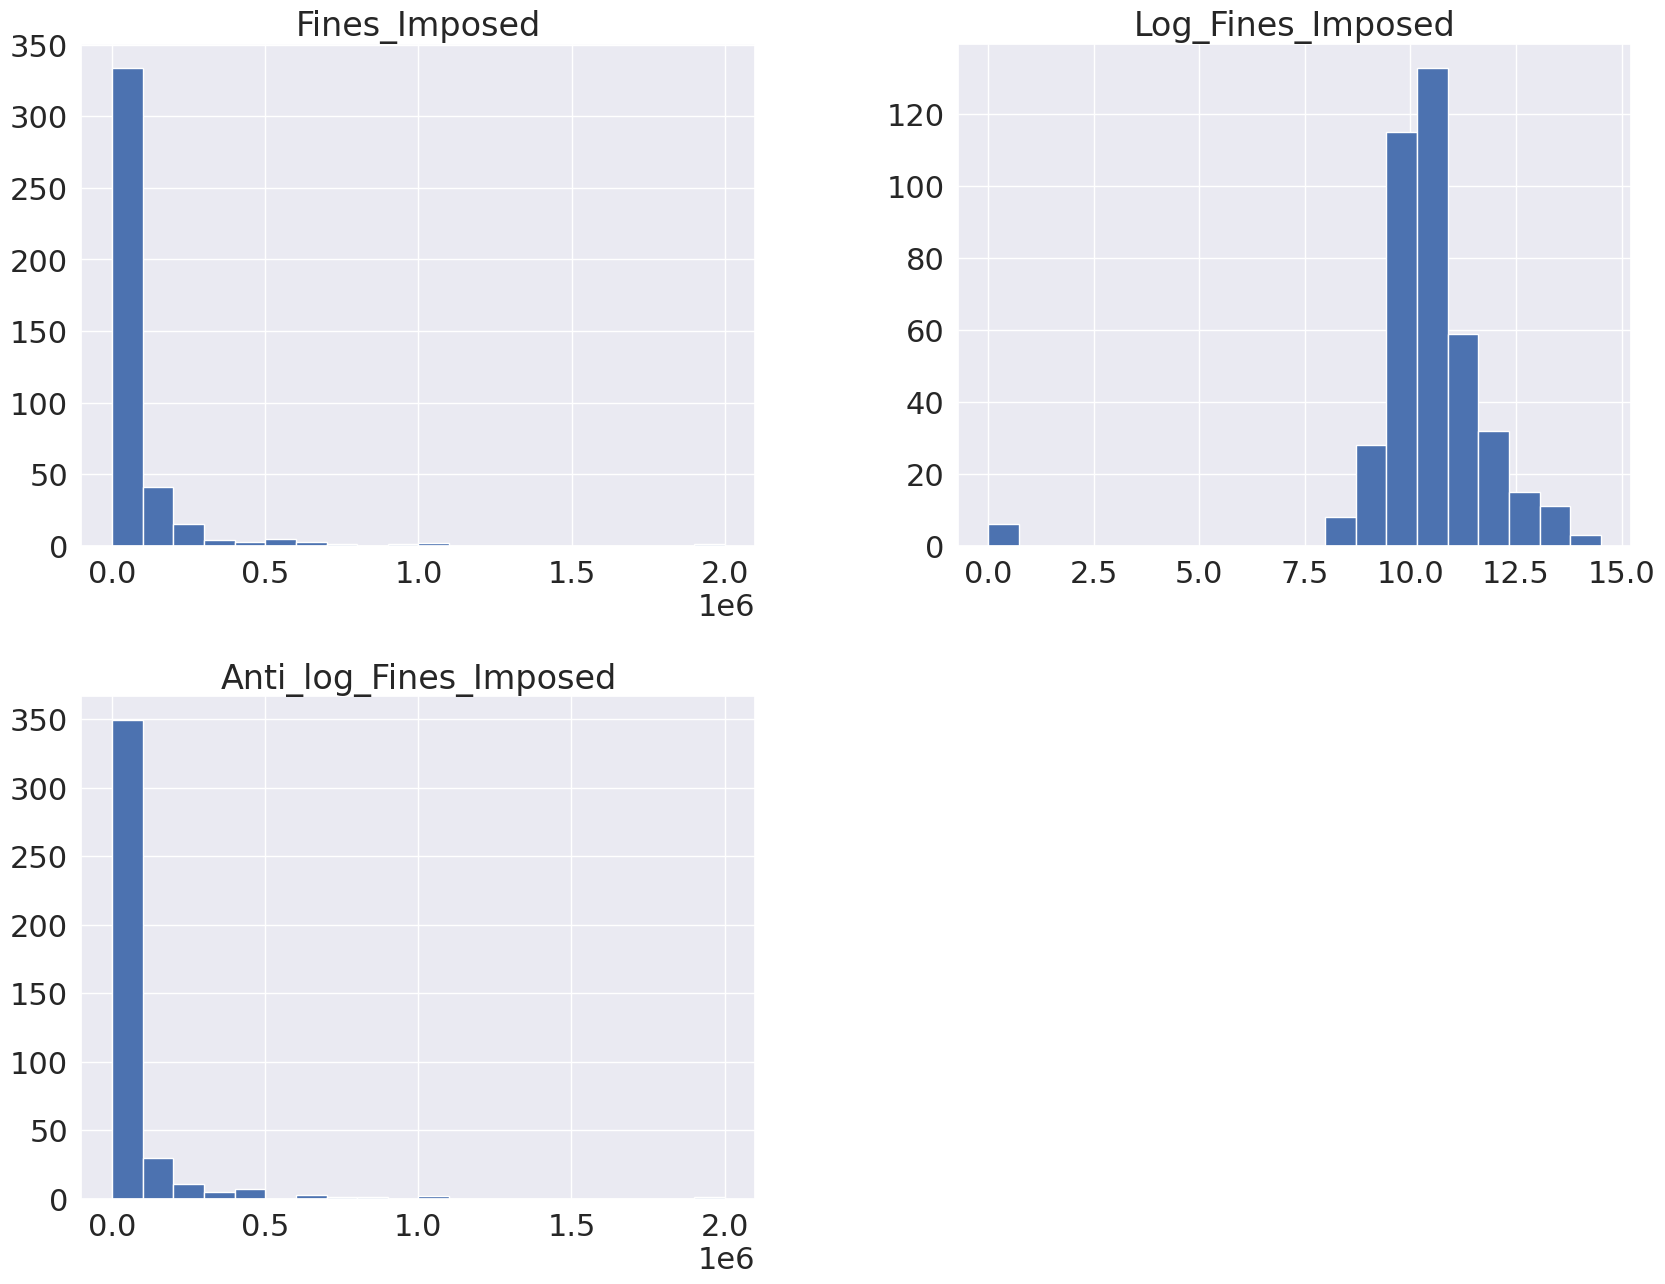

In [49]:
%matplotlib inline
(df[['Fines_Imposed','Log_Fines_Imposed','Anti_log_Fines_Imposed']]).hist(bins=20, figsize=(20,15))
plt.show() 

Year
2006.0     100000.00
2008.0    1759722.35
2009.0    2240622.35
2010.0    3809655.14
2011.0    4723250.00
2012.0    8429000.00
2013.0    1699144.70
2014.0    2226900.00
2015.0    1097500.00
2016.0    2771000.00
2017.0    1221500.00
2018.0    1774034.10
2019.0     870000.00
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Year'>

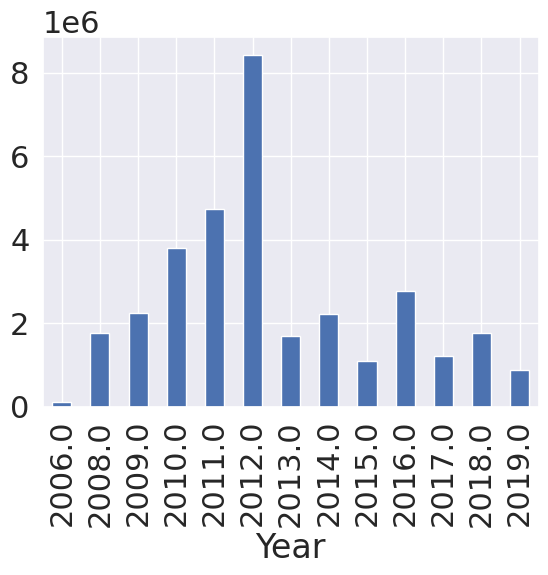

In [50]:

#calculate sum of points for each team
Firm_fine = df.groupby('Year')['Fines_Imposed'].sum()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Year
2006.0    100000.000000
2008.0     56765.237097
2009.0     72278.140323
2010.0     70549.169259
2011.0    131201.388889
2012.0    129676.923077
2013.0     48546.991429
2014.0     69590.625000
2015.0     40648.148148
2016.0     76972.222222
2017.0     45240.740741
2018.0     63358.360714
2019.0    124285.714286
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Year'>

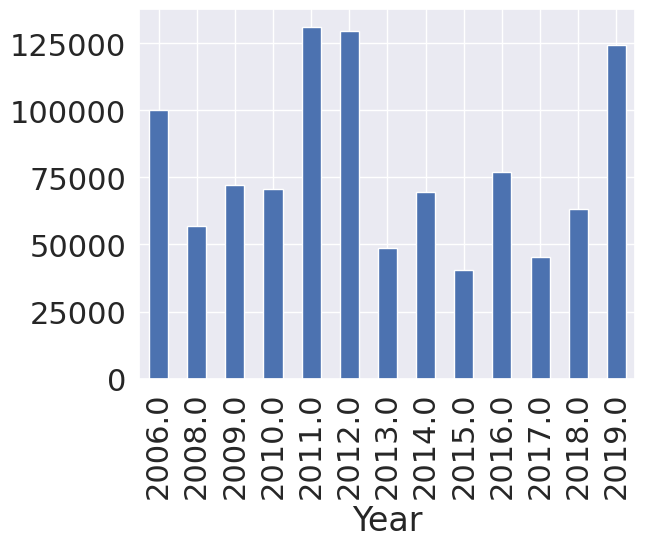

In [51]:
#calculate sum of points for each team
Firm_fine = df.groupby('Year')['Fines_Imposed'].mean()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Firm_name
0    22568206.29
1    10154122.35
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Firm_name'>

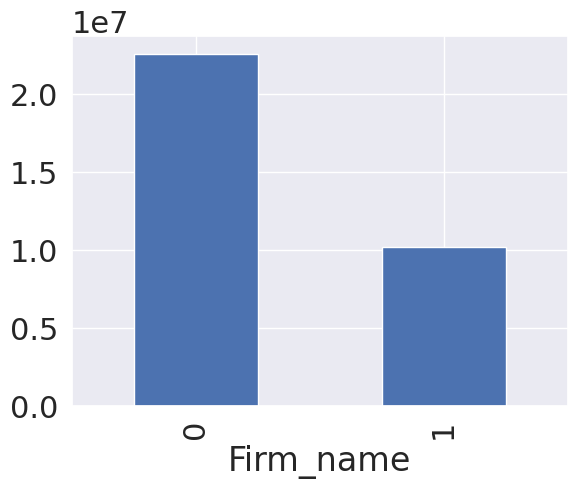

In [52]:
# Instantiate the scaler and fit X_train
np.set_printoptions(suppress=True)
#calculate sum of points for each team
Firm_fine = df.groupby('Firm_name')['Fines_Imposed'].sum()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Firm_name
0    78090.679204
1    83918.366529
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Firm_name'>

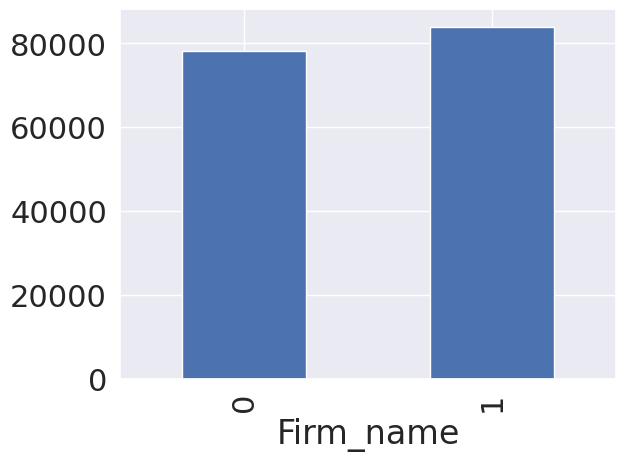

In [53]:
# Instantiate the scaler and fit X_train
np.set_printoptions(suppress=True)
#calculate sum of points for each team
Firm_fine = df.groupby('Firm_name')['Fines_Imposed'].mean()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Type_of_hearing_new
Contested     20940666.89
Settlement    11781661.75
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Type_of_hearing_new'>

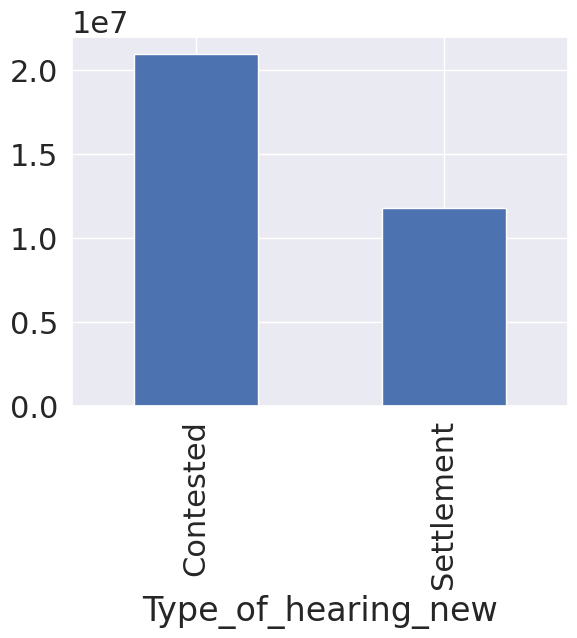

In [54]:

Firm_fine = df.groupby('Type_of_hearing_new')['Fines_Imposed'].sum()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Type_of_hearing_new
Contested     135978.356429
Settlement     46022.116211
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Type_of_hearing_new'>

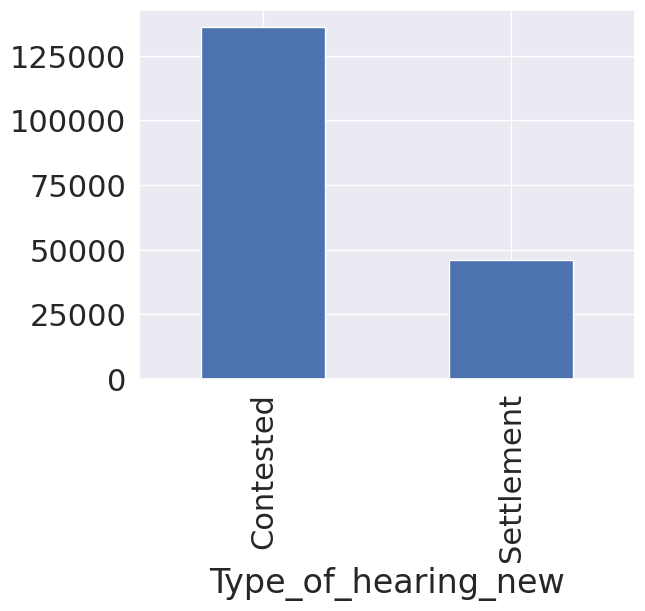

In [55]:

Firm_fine = df.groupby('Type_of_hearing_new')['Fines_Imposed'].mean()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Location
AB          66345.744681
BC          48780.263158
MB          32750.000000
NB         391666.666667
NS          30500.000000
ON         106536.298424
PEI         60750.000000
Pacific     57200.000000
QC          63262.832099
SK          72500.000000
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Location'>

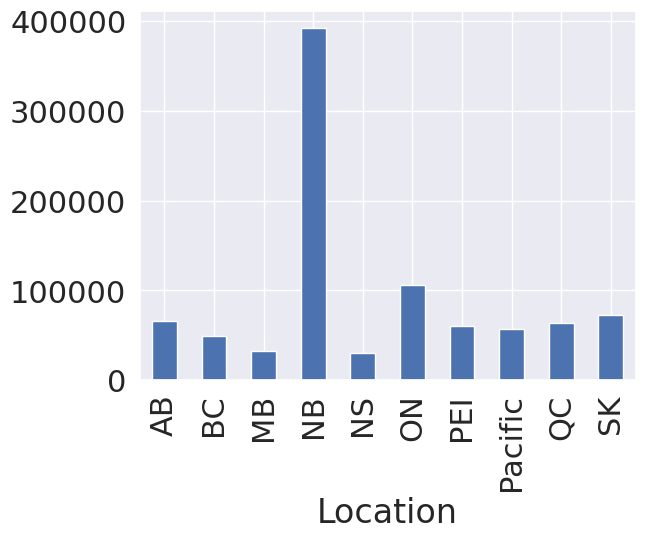

In [56]:
Firm_fine = df.groupby('Location')['Fines_Imposed'].mean()
print(Firm_fine)
Firm_fine.plot(kind='bar')

District_council
Atlantic_Provinces    158562.500000
BC                     48780.263158
ON                    106129.453253
PACIFIC                57200.000000
Prairie_Provinces      63978.448276
QC                     64320.602439
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='District_council'>

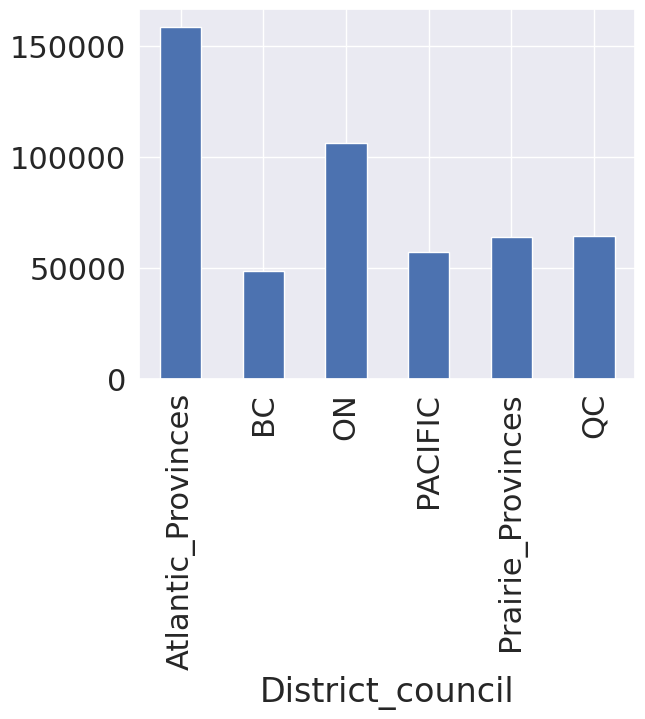

In [57]:
Firm_fine = df.groupby('District_council')['Fines_Imposed'].mean()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Offender_highest_occupation
Advisor       23927583.94
Executives     6081422.35
Manager        2713322.35
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Offender_highest_occupation'>

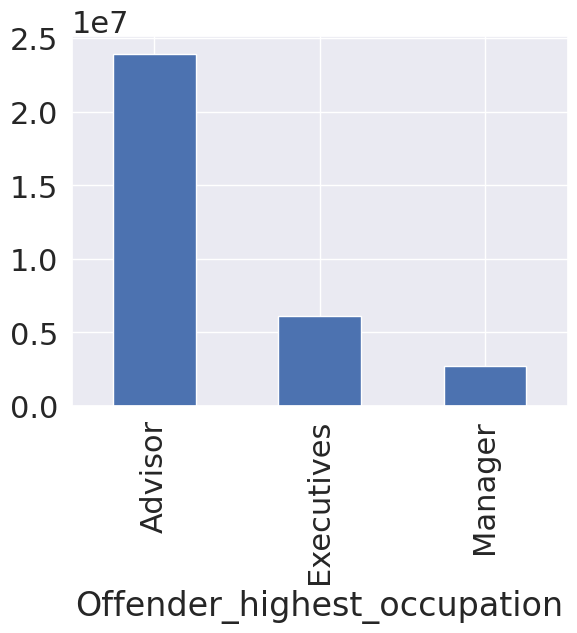

In [58]:
Firm_fine = df.groupby('Offender_highest_occupation')['Fines_Imposed'].sum()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Offender_highest_occupation
Advisor        74309.266894
Executives    129391.964894
Manager        66178.593902
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Offender_highest_occupation'>

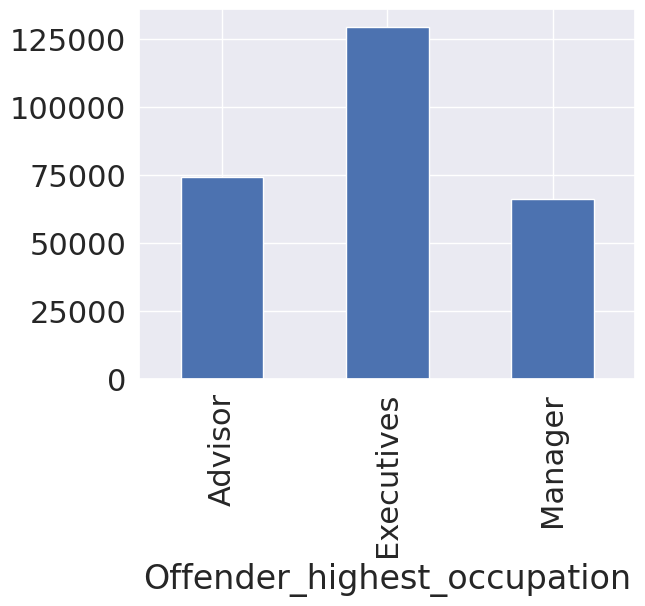

In [59]:
Firm_fine = df.groupby('Offender_highest_occupation')['Fines_Imposed'].mean()
print(Firm_fine)
Firm_fine.plot(kind='bar')

Offender_highest_occupation
Advisor       322
Executives     47
Manager        41
Name: Fines_Imposed, dtype: int64


<AxesSubplot: xlabel='Offender_highest_occupation'>

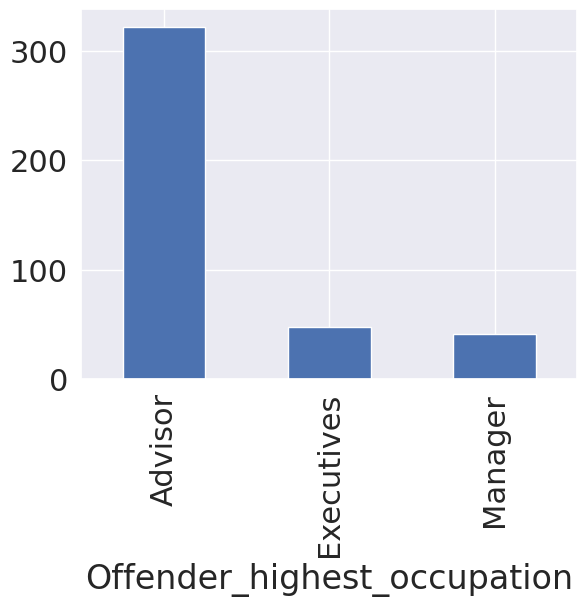

In [60]:
Firm_fine = df.groupby('Offender_highest_occupation')['Fines_Imposed'].count()
print(Firm_fine)
Firm_fine.plot(kind='bar')

In [61]:
df.drop(['Location','Year','Settled_by_other_regulator'],axis=1,inplace=True)

Offender_gender
0.0    70957.163333
1.0    80902.072027
Name: Fines_Imposed, dtype: float64


<AxesSubplot: xlabel='Offender_gender'>

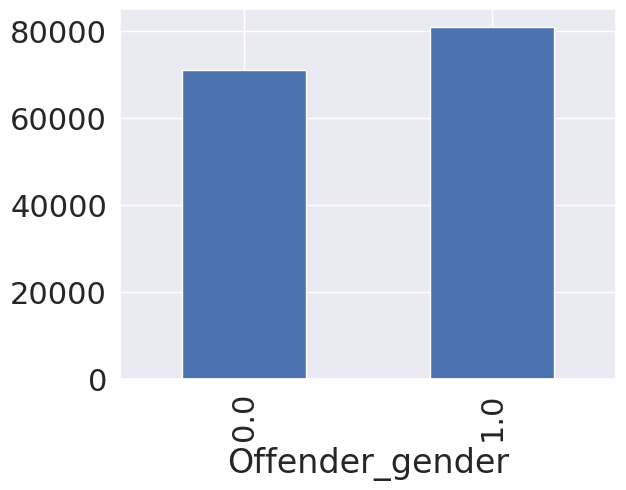

In [62]:
Firm_fine = df.groupby('Offender_gender')['Fines_Imposed'].mean()
print(Firm_fine)
Firm_fine.plot(kind='bar')

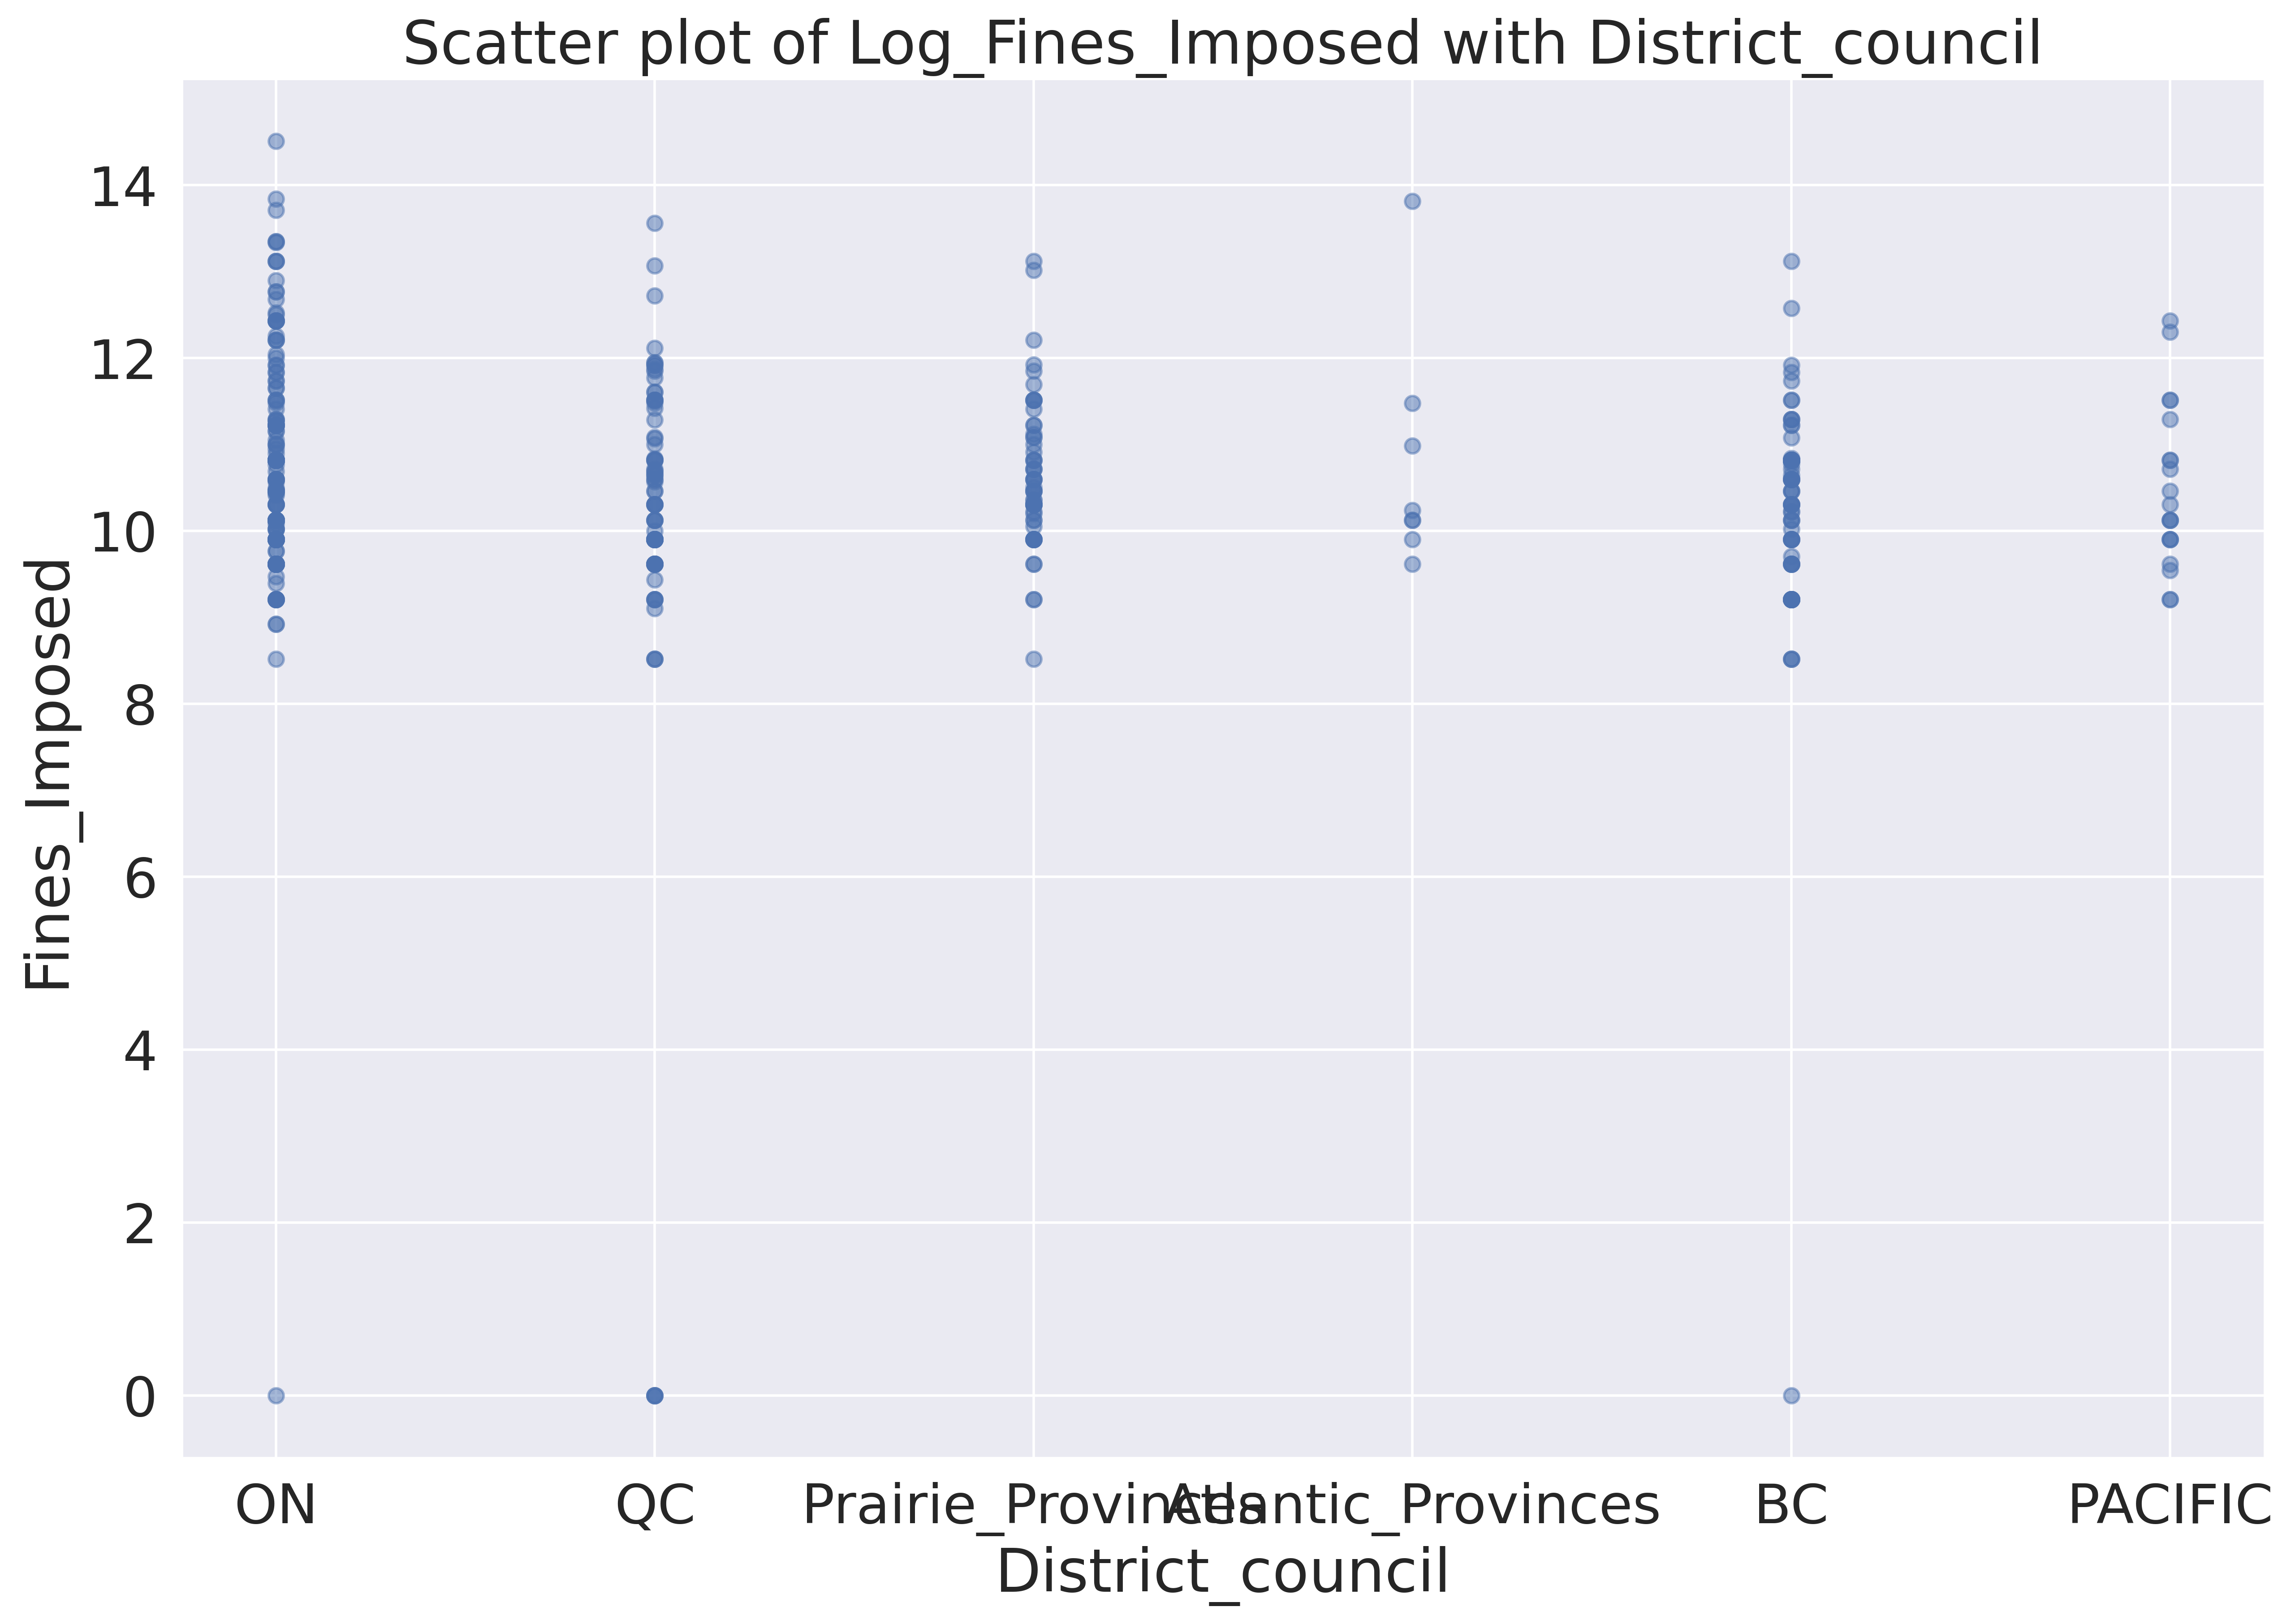

In [63]:
#Administration with Profit
plt.figure(figsize = (15,10), dpi=400)
plt.scatter(df['District_council'], df['Log_Fines_Imposed'], alpha=0.5)
plt.title('Scatter plot of Log_Fines_Imposed with District_council')
plt.xlabel('District_council')
plt.ylabel('Fines_Imposed')
plt.show()

### Checking correlation within the variables

In [4]:
def correlation_plot(df):
    
    corr = abs(df.corr(method = 'spearman')) # correlation matrix
    #corr = abs(df.corr()) # correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

    plt.figure(figsize = (35,25), dpi=400)  # setting the figure size
    sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', xticklabels = corr.index,
                yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   # Da Heatmap
    plt.show()

In [5]:
correlation_plot(df)

NameError: name 'df' is not defined

In [66]:
df.head()

District_council Type_of_hearing_new Offender_highest_occupation  Firm_name  \
0               ON           Contested                     Advisor          0   
1               ON          Settlement                     Advisor          1   
2               ON           Contested                     Advisor          1   
3               QC          Settlement                     Advisor          0   
4               ON           Contested                  Executives          0   

   Offender_gender  Quasi-Criminal_offences  Conflict_of_Interest_Offences  \
0              1.0                        0                              0   
1              1.0                        0                              0   
2              1.0                        1                              0   
3              1.0                        0                              0   
4              1.0                        0                              0   

   Improper_Sales_Practices  Internal_Control_Offences  Other_offences  ...  \
0                         1                          0               1  ...   
1                         3                          0               0  ...   
2                         0                          0               1  ...   
3                         2                          0               0  ...   
4                         0                          1               2  ...   

   Total_amount_lost/affected  Number_of_investors/clients_involved  \
0                       400.0                                   1.0   
1                      3900.0                                   4.0   
2                         0.0                                   1.0   
3                         0.0                                   1.0   
4                         0.0                                  19.0   

   Disciplinary_history_individual_offender  Offender_experience  \
0                                       0.0                  3.0   
1                                       0.0                  2.0   
2                                       0.0                  2.0   
3                                       0.0                  5.0   
4                                       0.0                  3.0   

   Offender_appearance_at_hearing_(the_latest_one)  \
0                                              1.0   
1                                              4.0   
2                                              4.0   
3                                              2.0   
4                                              2.0   

   Firm_type_(the_one_when_offence_was_committed)  \
0                                             9.0   
1                                             9.0   
2                                             9.0   
3                                             9.0   
4                                             3.0   

   Enforcement_costs_individual_offender  Fines_Imposed  Log_Fines_Imposed  \
0                                50000.0        50000.0             10.820   
1                                 3000.0        25000.0             10.127   
2                                 8000.0        35000.0             10.463   
3                                 3000.0        50000.0             10.820   
4                               125000.0       625000.0             13.346   

   Anti_log_Fines_Imposed  
0                 50011.0  
1                 25009.0  
2                 34996.0  
3                 50011.0  
4                625308.0  

[5 rows x 25 columns]

In [67]:
df.dtypes

District_council                                         object
Type_of_hearing_new                                      object
Offender_highest_occupation                              object
Firm_name                                                 int64
Offender_gender                                         float64
Quasi-Criminal_offences                                   int64
Conflict_of_Interest_Offences                             int64
Improper_Sales_Practices                                  int64
Internal_Control_Offences                                 int64
Other_offences                                            int64
Aggravating_Factors_Found_But_Not_Considered              int64
Mitigating_Factors                                        int64
Aggravating_Factors_Found_And_Considered                  int64
Commissions_or_referral_fees_or_other_gains_received    float64
Total_amount_involved                                   float64
Total_amount_lost/affected              

In [68]:
df.columns

Index(['District_council', 'Type_of_hearing_new',
       'Offender_highest_occupation', 'Firm_name', 'Offender_gender',
       'Quasi-Criminal_offences', 'Conflict_of_Interest_Offences',
       'Improper_Sales_Practices', 'Internal_Control_Offences',
       'Other_offences', 'Aggravating_Factors_Found_But_Not_Considered',
       'Mitigating_Factors', 'Aggravating_Factors_Found_And_Considered',
       'Commissions_or_referral_fees_or_other_gains_received',
       'Total_amount_involved', 'Total_amount_lost/affected',
       'Number_of_investors/clients_involved',
       'Disciplinary_history_individual_offender', 'Offender_experience',
       'Offender_appearance_at_hearing_(the_latest_one)',
       'Firm_type_(the_one_when_offence_was_committed)',
       'Enforcement_costs_individual_offender', 'Fines_Imposed',
       'Log_Fines_Imposed', 'Anti_log_Fines_Imposed'],
      dtype='object')

In [69]:
df.select_dtypes(include=['object']).columns


Index(['District_council', 'Type_of_hearing_new',
       'Offender_highest_occupation'],
      dtype='object')

In [70]:
data2 = pd.get_dummies(df)

In [71]:
data2.columns

Index(['Firm_name', 'Offender_gender', 'Quasi-Criminal_offences',
       'Conflict_of_Interest_Offences', 'Improper_Sales_Practices',
       'Internal_Control_Offences', 'Other_offences',
       'Aggravating_Factors_Found_But_Not_Considered', 'Mitigating_Factors',
       'Aggravating_Factors_Found_And_Considered',
       'Commissions_or_referral_fees_or_other_gains_received',
       'Total_amount_involved', 'Total_amount_lost/affected',
       'Number_of_investors/clients_involved',
       'Disciplinary_history_individual_offender', 'Offender_experience',
       'Offender_appearance_at_hearing_(the_latest_one)',
       'Firm_type_(the_one_when_offence_was_committed)',
       'Enforcement_costs_individual_offender', 'Fines_Imposed',
       'Log_Fines_Imposed', 'Anti_log_Fines_Imposed',
       'District_council_Atlantic_Provinces', 'District_council_BC',
       'District_council_ON', 'District_council_PACIFIC',
       'District_council_Prairie_Provinces', 'District_council_QC',
       'T

In [72]:
data2.head()

Firm_name  Offender_gender  Quasi-Criminal_offences  \
0          0              1.0                        0   
1          1              1.0                        0   
2          1              1.0                        1   
3          0              1.0                        0   
4          0              1.0                        0   

   Conflict_of_Interest_Offences  Improper_Sales_Practices  \
0                              0                         1   
1                              0                         3   
2                              0                         0   
3                              0                         2   
4                              0                         0   

   Internal_Control_Offences  Other_offences  \
0                          0               1   
1                          0               0   
2                          0               1   
3                          0               0   
4                          1               2   

   Aggravating_Factors_Found_But_Not_Considered  Mitigating_Factors  \
0                                             2                   1   
1                                             2                   4   
2                                             1                   3   
3                                             2                   5   
4                                             1                   1   

   Aggravating_Factors_Found_And_Considered  ...  District_council_BC  \
0                                         5  ...                    0   
1                                         1  ...                    0   
2                                         3  ...                    0   
3                                         3  ...                    0   
4                                        11  ...                    0   

   District_council_ON  District_council_PACIFIC  \
0                    1                         0   
1                    1                         0   
2                    1                         0   
3                    0                         0   
4                    1                         0   

   District_council_Prairie_Provinces  District_council_QC  \
0                                   0                    0   
1                                   0                    0   
2                                   0                    0   
3                                   0                    1   
4                                   0                    0   

   Type_of_hearing_new_Contested  Type_of_hearing_new_Settlement  \
0                              1                               0   
1                              0                               1   
2                              1                               0   
3                              0                               1   
4                              1                               0   

   Offender_highest_occupation_Advisor  \
0                                    1   
1                                    1   
2                                    1   
3                                    1   
4                                    0   

   Offender_highest_occupation_Executives  Offender_highest_occupation_Manager  
0                                       0                                    0  
1                                       0                                    0  
2                                       0                                    0  
3                                       0                                    0  
4                                       1                                    0  

[5 rows x 33 columns]

In [73]:
check_missing(data2)

Total Missing Count  \
Firm_name                                                             0   
Firm_type_(the_one_when_offence_was_committed)                        0   
Offender_highest_occupation_Executives                                0   
Offender_highest_occupation_Advisor                                   0   
Type_of_hearing_new_Settlement                                        0   
Type_of_hearing_new_Contested                                         0   
District_council_QC                                                   0   
District_council_Prairie_Provinces                                    0   
District_council_PACIFIC                                              0   
District_council_ON                                                   0   
District_council_BC                                                   0   
District_council_Atlantic_Provinces                                   0   
Anti_log_Fines_Imposed                                                0   
Log_Fines_Imposed                                                     0   
Fines_Imposed                                                         0   
Enforcement_costs_individual_offender                                 0   
Offender_appearance_at_hearing_(the_latest_one)                       0   
Offender_gender                                                       0   
Offender_experience                                                   0   
Disciplinary_history_individual_offender                              0   
Number_of_investors/clients_involved                                  0   
Total_amount_lost/affected                                            0   
Total_amount_involved                                                 0   
Commissions_or_referral_fees_or_other_gains_rec...                    0   
Aggravating_Factors_Found_And_Considered                              0   
Mitigating_Factors                                                    0   
Aggravating_Factors_Found_But_Not_Considered                          0   
Other_offences                                                        0   
Internal_Control_Offences                                             0   
Improper_Sales_Practices                                              0   
Conflict_of_Interest_Offences                                         0   
Quasi-Criminal_offences                                               0   
Offender_highest_occupation_Manager                                   0   

                                                    Missing %  
Firm_name                                                 0.0  
Firm_type_(the_one_when_offence_was_committed)            0.0  
Offender_highest_occupation_Executives                    0.0  
Offender_highest_occupation_Advisor                       0.0  
Type_of_hearing_new_Settlement                            0.0  
Type_of_hearing_new_Contested                             0.0  
District_council_QC                                       0.0  
District_council_Prairie_Provinces                        0.0  
District_council_PACIFIC                                  0.0  
District_council_ON                                       0.0  
District_council_BC                                       0.0  
District_council_Atlantic_Provinces                       0.0  
Anti_log_Fines_Imposed                                    0.0  
Log_Fines_Imposed                                         0.0  
Fines_Imposed                                             0.0  
Enforcement_costs_individual_offender                     0.0  
Offender_appearance_at_hearing_(the_latest_one)           0.0  
Offender_gender                                           0.0  
Offender_experience                                       0.0  
Disciplinary_history_individual_offender                  0.0  
Number_of_investors/clients_involved                      0.0  
Total_amount_lost/affected                                0.0  
Total_amount_involved        

In [74]:
# Spliting target variable and independent variables
X = data2.drop(['Fines_Imposed','Anti_log_Fines_Imposed','Log_Fines_Imposed'], axis = 1)
y = data2['Log_Fines_Imposed']

In [75]:
X.head()

Firm_name  Offender_gender  Quasi-Criminal_offences  \
0          0              1.0                        0   
1          1              1.0                        0   
2          1              1.0                        1   
3          0              1.0                        0   
4          0              1.0                        0   

   Conflict_of_Interest_Offences  Improper_Sales_Practices  \
0                              0                         1   
1                              0                         3   
2                              0                         0   
3                              0                         2   
4                              0                         0   

   Internal_Control_Offences  Other_offences  \
0                          0               1   
1                          0               0   
2                          0               1   
3                          0               0   
4                          1               2   

   Aggravating_Factors_Found_But_Not_Considered  Mitigating_Factors  \
0                                             2                   1   
1                                             2                   4   
2                                             1                   3   
3                                             2                   5   
4                                             1                   1   

   Aggravating_Factors_Found_And_Considered  ...  District_council_BC  \
0                                         5  ...                    0   
1                                         1  ...                    0   
2                                         3  ...                    0   
3                                         3  ...                    0   
4                                        11  ...                    0   

   District_council_ON  District_council_PACIFIC  \
0                    1                         0   
1                    1                         0   
2                    1                         0   
3                    0                         0   
4                    1                         0   

   District_council_Prairie_Provinces  District_council_QC  \
0                                   0                    0   
1                                   0                    0   
2                                   0                    0   
3                                   0                    1   
4                                   0                    0   

   Type_of_hearing_new_Contested  Type_of_hearing_new_Settlement  \
0                              1                               0   
1                              0                               1   
2                              1                               0   
3                              0                               1   
4                              1                               0   

   Offender_highest_occupation_Advisor  \
0                                    1   
1                                    1   
2                                    1   
3                                    1   
4                                    0   

   Offender_highest_occupation_Executives  Offender_highest_occupation_Manager  
0                                       0                                    0  
1                                       0                                    0  
2                                       0                                    0  
3                                       0                                    0  
4                                       1                                    0  

[5 rows x 30 columns]

In [76]:
y.head()

0    10.820
1    10.127
2    10.463
3    10.820
4    13.346
Name: Log_Fines_Imposed, dtype: float64

In [77]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [78]:
from sklearn.preprocessing import MinMaxScaler
Select_Scale ='Standard'  # Please Use only 'MinMax' or 'Standard'

if  Select_Scale =='MinMax':
    scaler=MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


elif Select_Scale =='Standard':
    np.set_printoptions(suppress=True)
    norm = preprocessing.StandardScaler().fit(X_train)
    X_train = norm.transform(X_train)
    norm = preprocessing.StandardScaler().fit(X_test)
    X_test = norm.transform(X_test)

else:
    print("Please Select the correct Parameter to run this step")
    

In [79]:
X_train

array([[ 1.50378311,  0.372678  , -0.32151925, ...,  0.49782134,
        -0.3665888 , -0.29516303],
       [-0.66498952,  0.372678  , -0.32151925, ...,  0.49782134,
        -0.3665888 , -0.29516303],
       [-0.66498952,  0.372678  ,  1.77566311, ...,  0.49782134,
        -0.3665888 , -0.29516303],
       ...,
       [-0.66498952,  0.372678  , -0.32151925, ..., -2.00875278,
         2.72785199, -0.29516303],
       [-0.66498952,  0.372678  , -0.32151925, ...,  0.49782134,
        -0.3665888 , -0.29516303],
       [ 1.50378311,  0.372678  ,  3.87284548, ...,  0.49782134,
        -0.3665888 , -0.29516303]])

### Linear Regression Model on Full Training Variables

In [80]:
columns_name = list(X.columns)

In [81]:
from sklearn.linear_model import Lasso,Ridge, LinearRegression
# Train the model
linearRegressor = LinearRegression() 
linearRegressor.fit(X_train, y_train)
y_train_pred_linear = linearRegressor.predict(X_train)
y_test_pred_linear = linearRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared_train_linear = metrics.r2_score(y_train_pred_linear,y_train)
R_squared_test_linear = metrics.r2_score(y_test_pred_linear,y_test)

Adjusted_R_square_train_linear= 1 - (1-metrics.r2_score(y_train, y_train_pred_linear))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_R_square_test_linear= 1 - (1-metrics.r2_score(y_test, y_test_pred_linear))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

MSE_train_linear = metrics.mean_squared_error(y_train, y_train_pred_linear)
RMSE_train_linear = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_linear))

MSE_test_linear = metrics.mean_squared_error(y_test, y_test_pred_linear)
RMSE_test_linear = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_linear))

print ("R squared Error on train set :", R_squared_train_linear)
print ("R squared Error on test set :", R_squared_test_linear)

print ("Adjusted R squared Error on train set :", Adjusted_R_square_train_linear)
print ("Adjusted R squared Error on test set :", Adjusted_R_square_test_linear)

print ("Mean Squared Error on train set :", MSE_train_linear)
print ("Mean squared Error on test set :", MSE_test_linear)

print ("Root Mean Squared Error on train set :", RMSE_train_linear)
print ("Root Mean squared Error on test set :", RMSE_test_linear)

coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = columns_name
coefficient_df['Coefficient_Value'] = pd. Series(linearRegressor.coef_)

print (coefficient_df)

R squared Error on train set : -0.1864910978103833
R squared Error on test set : -2.9820590441431705e-13
Adjusted R squared Error on train set : 0.3944132537091022
Adjusted R squared Error on test set : -2.2825232836636797e+23
Mean Squared Error on train set : 1.2179700622964438
Mean squared Error on test set : 6.236443690258966e+23
Root Mean Squared Error on train set : 1.1036168095387293
Root Mean squared Error on test set : 789711573313.8882
                                          Column_Name  Coefficient_Value
0                                           Firm_name       7.460849e-02
1                                     Offender_gender       2.483059e-02
2                             Quasi-Criminal_offences       1.893924e-01
3                       Conflict_of_Interest_Offences      -8.900961e-03
4                            Improper_Sales_Practices       4.787484e-02
5                           Internal_Control_Offences      -1.468233e-01
6                                      O

### Checking VIF on Dataset 

In [82]:
#Useing VIF to check for Collinearity 

vif_series = pd.Series(
#    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
     [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])],
    index=X.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))



Series before feature selection: 

Firm_name                                               1.112291
Offender_gender                                         1.074352
Quasi-Criminal_offences                                 1.287176
Conflict_of_Interest_Offences                           1.270466
Improper_Sales_Practices                                1.266945
Internal_Control_Offences                               1.426106
Other_offences                                          1.440912
Aggravating_Factors_Found_But_Not_Considered            1.261302
Mitigating_Factors                                      1.400218
Aggravating_Factors_Found_And_Considered                1.658185
Commissions_or_referral_fees_or_other_gains_received    1.139543
Total_amount_involved                                   1.183049
Total_amount_lost/affected                              1.226720
Number_of_investors/clients_involved                    1.234077
Disciplinary_history_individual_offender               

### Building Models on Dataset After Dropping variable from VIF Test 

### Use Stats Model to generate P-Values

In [83]:
features = list(X.columns)

Stats_Model_features = ['Constant'] + features # because stats model takes addition variable "Constant"

print(Stats_Model_features)

print(len(Stats_Model_features))


['Constant', 'Firm_name', 'Offender_gender', 'Quasi-Criminal_offences', 'Conflict_of_Interest_Offences', 'Improper_Sales_Practices', 'Internal_Control_Offences', 'Other_offences', 'Aggravating_Factors_Found_But_Not_Considered', 'Mitigating_Factors', 'Aggravating_Factors_Found_And_Considered', 'Commissions_or_referral_fees_or_other_gains_received', 'Total_amount_involved', 'Total_amount_lost/affected', 'Number_of_investors/clients_involved', 'Disciplinary_history_individual_offender', 'Offender_experience', 'Offender_appearance_at_hearing_(the_latest_one)', 'Firm_type_(the_one_when_offence_was_committed)', 'Enforcement_costs_individual_offender', 'District_council_Atlantic_Provinces', 'District_council_BC', 'District_council_ON', 'District_council_PACIFIC', 'District_council_Prairie_Provinces', 'District_council_QC', 'Type_of_hearing_new_Contested', 'Type_of_hearing_new_Settlement', 'Offender_highest_occupation_Advisor', 'Offender_highest_occupation_Executives', 'Offender_highest_occupa

In [84]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model2 = sm.OLS(y_train,sm.add_constant(X_train) ).fit()
 
# Get the model summary
model2.summary(xname=Stats_Model_features)
#model2.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Log_Fines_Imposed   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     8.104
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           6.53e-22
Time:                        23:17:45   Log-Likelihood:                -435.53
No. Observations:                 287   AIC:                             927.1
Df Residuals:                     259   BIC:                             1030.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Constant                                                10.4683      0.069    152.654      0.000      10.333      10.603
Firm_name                                                0.0717      0.072      0.992      0.322      -0.071       0.214
Offender_gender                                          0.0237      0.071      0.333      0.739      -0.116       0.164
Quasi-Criminal_offences                                  0.1898      0.078      2.440      0.015       0.037       0.343
Conflict_of_Interest_Offences                           -0.0090      0.077     -0.117      0.907      -0.161       0.143
Improper_Sales_Practices                                 0.0472      0.077      0.611      0.541      -0.105       0.199
Internal_Control_Offences                               -0.1467      0.082     -1.791      0.074      -0.308       0.015
Other_offences                                           0.0387      0.082      0.470      0.638      -0.123       0.201
Aggravating_Factors_Found_But_Not_Considered             0.1355      0.077      1.760      0.080      -0.016       0.287
Mitigating_Factors                                      -0.0793      0.081     -0.977      0.329      -0.239       0.081
Aggravating_Factors_Found_And_Considered                 0.2180      0.088      2.469      0.014       0.044       0.392
Commissions_or_referral_fees_or_other_gains_received     0.2295      0.073      3.136      0.002       0.085       0.374
Total_amount_involved                                   -0.0520      0.075     -0.698      0.486      -0.199       0.095
Total_amount_lost/affected                              -0.0157      0.076     -0.207      0.836      -0.165       0.134
Number_of_investors/clients_involved                    -0.5304      0.076     -6.963      0.000      -0.680      -0.380
Disciplinary_history_individual_offender                -0.0914      0.075     -1.220      0.224      -0.239       0.056
Offender_experience                                      0.0719      0.075      0.956      0.340      -0.076       0.220
Offender_appearance_at_hearing_(the_latest_one)         -0.1236      0.074     -1.680      0.094      -0.269       0.021
Firm_type_(the_one_when_offence_was_committed)           0.0652      0.075      0.867      0.387      -0.083       0.213
Enforcement_costs_individual_offender                    0.5439      0.089      6.114      0.000       0.369       0.719
District_council_Atlantic_Provinces                     -0.0290      0.070     -0.416      0.678      -0.166       0.108
District_council_BC                                     -0.0954      0.058     -1.652      0.100      -0.209       0.018
District_council_ON                                      0

In [85]:
X_train_new = pd.DataFrame(X_train,columns=features).drop(['Conflict_of_Interest_Offences'],axis=1)
X_test_new = pd.DataFrame(X_test,columns=features).drop(['Conflict_of_Interest_Offences'],axis=1)

In [86]:
features = list(X_train_new.columns)

Stats_Model_features = ['Constant'] + features # because stats model takes addition variable "Constant"

print(Stats_Model_features)

['Constant', 'Firm_name', 'Offender_gender', 'Quasi-Criminal_offences', 'Improper_Sales_Practices', 'Internal_Control_Offences', 'Other_offences', 'Aggravating_Factors_Found_But_Not_Considered', 'Mitigating_Factors', 'Aggravating_Factors_Found_And_Considered', 'Commissions_or_referral_fees_or_other_gains_received', 'Total_amount_involved', 'Total_amount_lost/affected', 'Number_of_investors/clients_involved', 'Disciplinary_history_individual_offender', 'Offender_experience', 'Offender_appearance_at_hearing_(the_latest_one)', 'Firm_type_(the_one_when_offence_was_committed)', 'Enforcement_costs_individual_offender', 'District_council_Atlantic_Provinces', 'District_council_BC', 'District_council_ON', 'District_council_PACIFIC', 'District_council_Prairie_Provinces', 'District_council_QC', 'Type_of_hearing_new_Contested', 'Type_of_hearing_new_Settlement', 'Offender_highest_occupation_Advisor', 'Offender_highest_occupation_Executives', 'Offender_highest_occupation_Manager']


In [87]:
model2 = sm.OLS(y_train,sm.add_constant(X_train_new.values) ).fit()
 
# Get the model summary
model2.summary(xname=Stats_Model_features)
#model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Log_Fines_Imposed   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     8.447
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           2.23e-22
Time:                        23:17:45   Log-Likelihood:                -435.54
No. Observations:                 287   AIC:                             925.1
Df Residuals:                     260   BIC:                             1024.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Constant                                                10.4683      0.068    152.944      0.000      10.333      10.603
Firm_name                                                0.0718      0.072      0.995      0.321      -0.070       0.214
Offender_gender                                          0.0231      0.071      0.326      0.745      -0.116       0.162
Quasi-Criminal_offences                                  0.1902      0.078      2.452      0.015       0.037       0.343
Improper_Sales_Practices                                 0.0481      0.077      0.627      0.531      -0.103       0.199
Internal_Control_Offences                               -0.1480      0.081     -1.828      0.069      -0.307       0.011
Other_offences                                           0.0363      0.080      0.456      0.648      -0.120       0.193
Aggravating_Factors_Found_But_Not_Considered             0.1350      0.077      1.759      0.080      -0.016       0.286
Mitigating_Factors                                      -0.0788      0.081     -0.974      0.331      -0.238       0.080
Aggravating_Factors_Found_And_Considered                 0.2164      0.087      2.487      0.014       0.045       0.388
Commissions_or_referral_fees_or_other_gains_received     0.2289      0.073      3.142      0.002       0.085       0.372
Total_amount_involved                                   -0.0519      0.074     -0.697      0.486      -0.198       0.095
Total_amount_lost/affected                              -0.0158      0.076     -0.209      0.835      -0.165       0.133
Number_of_investors/clients_involved                    -0.5296      0.076     -6.996      0.000      -0.679      -0.381
Disciplinary_history_individual_offender                -0.0915      0.075     -1.224      0.222      -0.239       0.056
Offender_experience                                      0.0721      0.075      0.960      0.338      -0.076       0.220
Offender_appearance_at_hearing_(the_latest_one)         -0.1238      0.073     -1.686      0.093      -0.268       0.021
Firm_type_(the_one_when_offence_was_committed)           0.0647      0.075      0.863      0.389      -0.083       0.212
Enforcement_costs_individual_offender                    0.5441      0.089      6.129      0.000       0.369       0.719
District_council_Atlantic_Provinces                     -0.0286      0.069     -0.411      0.681      -0.165       0.108
District_council_BC                                     -0.0950      0.058     -1.651      0.100      -0.208       0.018
District_council_ON                                      0.0531      0.049      1.082      0.280      -0.044       0.150
District_council_PACIFIC                                 0

### Lasso Regression Model

In [88]:
from sklearn.linear_model import Lasso,Ridge, LinearRegression


In [89]:
# Train the model
lassoRegressor = Lasso(alpha = .1) #here setting alpha
lassoRegressor.fit(X_train, y_train)

y_train_pred_lasso = lassoRegressor.predict(X_train)
y_test_pred_lasso = lassoRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared_train_lasso = metrics.r2_score(y_train_pred_lasso,y_train)
R_squared_test_lasso = metrics.r2_score(y_test_pred_lasso,y_test)

Adjusted_R_square_train_lasso= 1 - (1-metrics.r2_score(y_train, y_train_pred_lasso))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_R_square_test_lasso= 1 - (1-metrics.r2_score(y_test, y_test_pred_lasso))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

MSE_train_lasso = metrics.mean_squared_error(y_train, y_train_pred_lasso)
RMSE_train_lasso = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lasso))


MSE_test_lasso = metrics.mean_squared_error(y_test, y_test_pred_lasso)
RMSE_test_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso))

print ("MSE Error on train set :", MSE_train_lasso)
print ("RMSE Error on train set :", RMSE_train_lasso)
print("check" ,np.sqrt(MSE_train_lasso))

print ("MSE Error on test set :", MSE_test_lasso)
print ("RMSE Error on test set :", RMSE_test_lasso)

print ("R squared Error on train set :", R_squared_train_lasso)
print ("R squared Error on test set :", R_squared_test_lasso)

print ("Adjusted R squared Error on train set :", Adjusted_R_square_train_lasso)
print ("Adjusted R squared Error on test set :", Adjusted_R_square_test_lasso)



coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = columns_name
coefficient_df['Coefficient_Value'] = pd. Series(lassoRegressor.coef_)

print (coefficient_df)

MSE Error on train set : 1.3806989659834275
RMSE Error on train set : 1.1750314744650152
check 1.1750314744650152
MSE Error on test set : 3.1084092072182887
RMSE Error on test set : 1.763068123249436
R squared Error on train set : -1.5142758010138748
R squared Error on test set : -6.333000101721441
Adjusted R squared Error on train set : 0.313502835331922
Adjusted R squared Error on test set : -0.1376702401261778
                                          Column_Name  Coefficient_Value
0                                           Firm_name           0.000000
1                                     Offender_gender           0.000000
2                             Quasi-Criminal_offences           0.079129
3                       Conflict_of_Interest_Offences           0.000000
4                            Improper_Sales_Practices           0.000000
5                           Internal_Control_Offences          -0.000000
6                                      Other_offences           0.000000

###  Mean of Residuals

In [90]:
residuals_train = y_train-y_train_pred_lasso
mean_residuals = np.mean(residuals_train)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.2087897240145307e-16


### Check for Normality of error terms/residuals

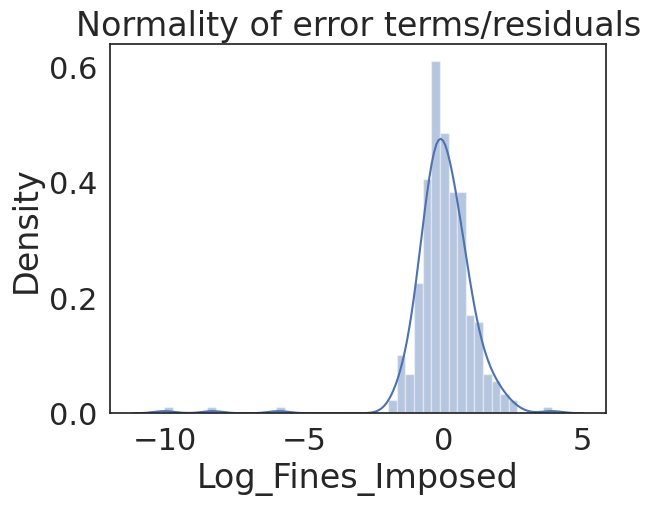

In [91]:
p = sns.distplot(residuals_train,kde=True)
p = plt.title('Normality of error terms/residuals')

### Visual Check for Homoscedasticity

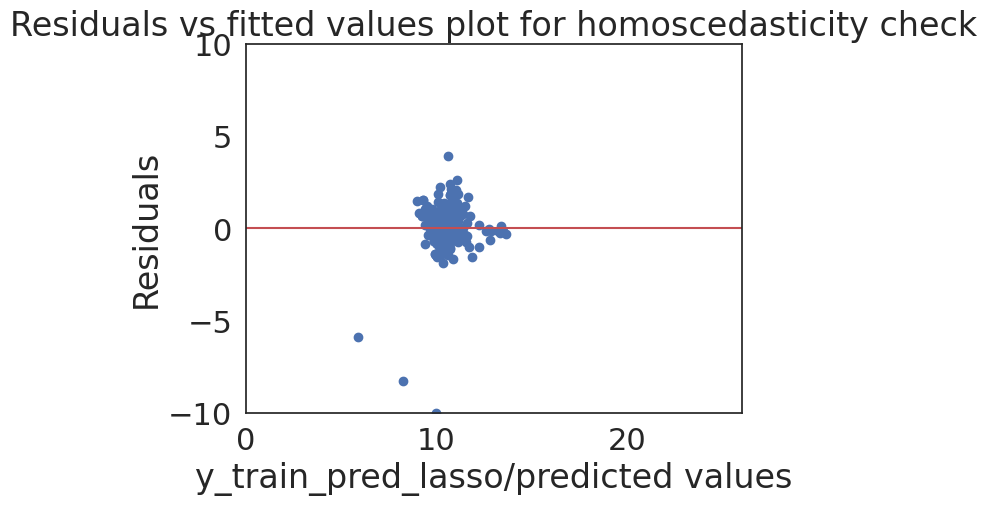

In [92]:
p = plt.scatter(y_train_pred_lasso,residuals_train)
plt.xlabel('y_train_pred_lasso/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
plt.axhline(y=0, color='r', linestyle='-')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

### Stastical Test for Homoscedasticity

Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [93]:
residuals_train = y_train-y_train_pred_lasso
print("====Stastical Test for Homoscedasticity=====")
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals_train, X_train)
print(lzip(name, test))

====Stastical Test for Homoscedasticity=====
[('F statistic', 1.023831304374038), ('p-value', 0.4494323318726552)]


In [94]:
residuals_test = y_test-y_test_pred_lasso
print("====Stastical Test for Homoscedasticity=====")
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals_test, X_test)
print(lzip(name, test))

====Stastical Test for Homoscedasticity=====
[('F statistic', 2.288739763510796), ('p-value', 0.008489471695297013)]


Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic.

In [95]:
def Run_Linear_Regrssion_Assumption(y_variable,y_variable_predicted,X_dataset ):

    print("===== Mean of Residuals====")
    residuals = y_variable-y_variable_predicted
    mean_residuals = np.mean(residuals)
    print("Mean of Residuals {}".format(mean_residuals))

    print("====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====")
    import statsmodels.stats.api as sms
    from statsmodels.compat import lzip
    name = ['F statistic', 'p-value']
    test = sms.het_goldfeldquandt(residuals, X_dataset)
    print(lzip(name, test))


    plt.figure(figsize=(25,10))
    ax1 = plt.subplot(1,2,1)
    p = sns.distplot(residuals,kde=True)
    p = plt.title('Normality of error terms/residuals')

    ax2 = plt.subplot(1,2,2)
    p = plt.scatter(y_variable_predicted,residuals)
    plt.xlabel('y predicted values')
    plt.ylabel('Residuals')
    plt.ylim(-10,10)
    plt.xlim(0,26)
    plt.axhline(y=0, color='r', linestyle='-')
    p = plt.title('Residuals vs fitted values plot for homoscedasticity check')



===== Mean of Residuals====
Mean of Residuals 4.2087897240145307e-16
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 1.023831304374038), ('p-value', 0.4494323318726552)]


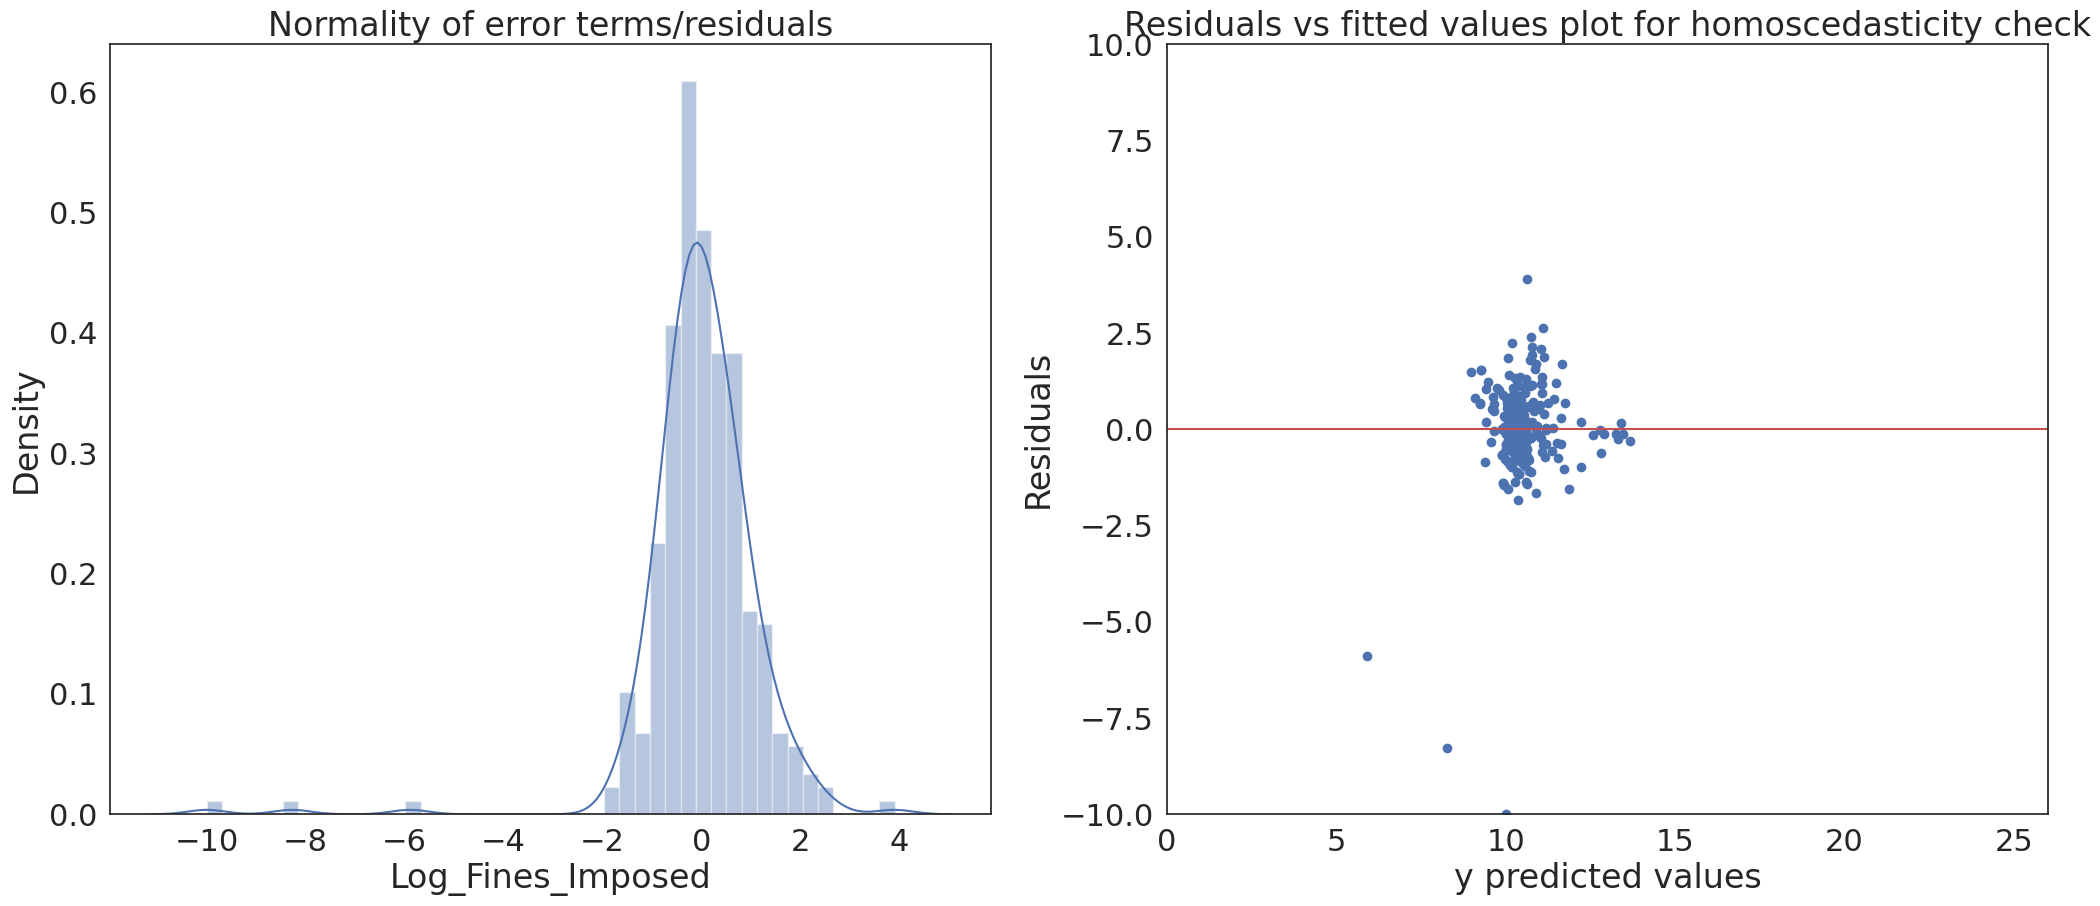

In [96]:
Run_Linear_Regrssion_Assumption(y_train,y_train_pred_lasso,X_train )

===== Mean of Residuals====
Mean of Residuals 0.017350754936121177
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 2.288739763510796), ('p-value', 0.008489471695297013)]


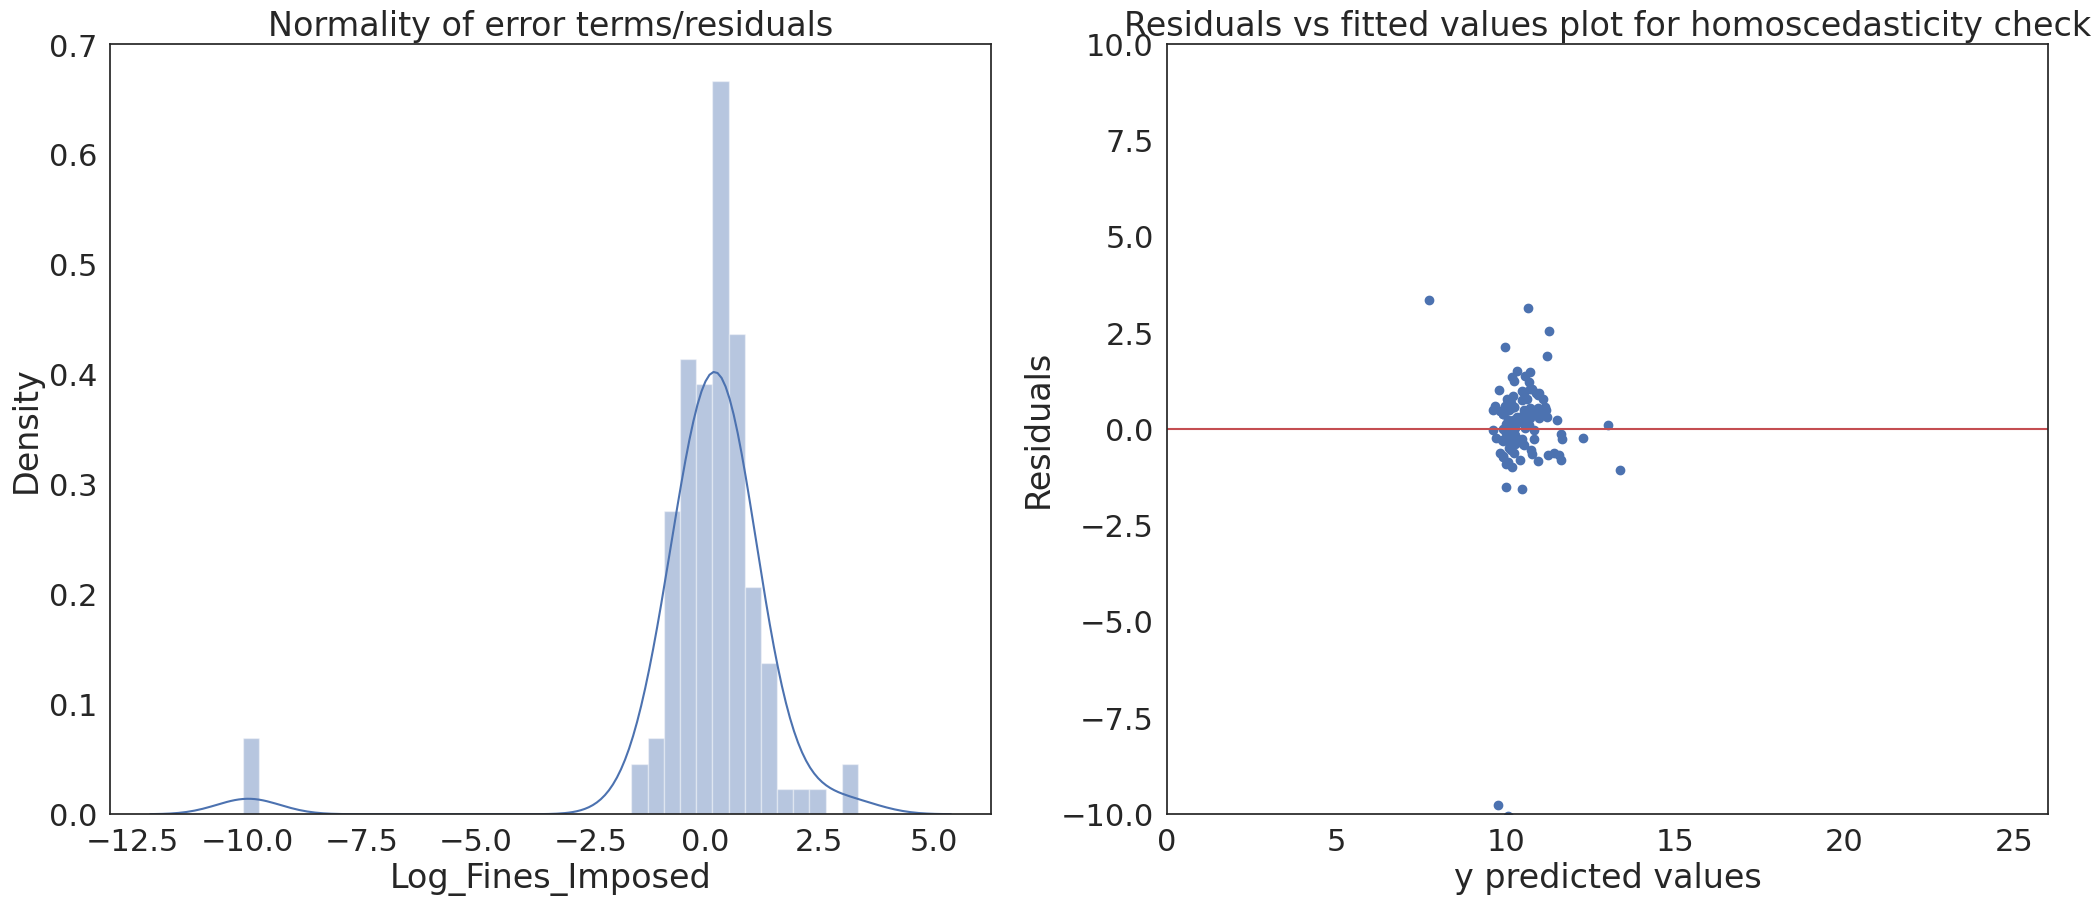

In [97]:
Run_Linear_Regrssion_Assumption(y_test,y_test_pred_lasso,X_test )

#Ridge Regression Model

In [98]:
# Train the model
ridgeRegressor = Ridge(alpha = .1) #here setting alpha
ridgeRegressor.fit(X_train, y_train)

y_train_pred_ridge = ridgeRegressor.predict(X_train)
y_test_pred_ridge = ridgeRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared_train_ridge = metrics.r2_score(y_train_pred_ridge,y_train)
R_squared_test_ridge = metrics.r2_score(y_test_pred_ridge,y_test)

Adjusted_R_square_train_ridge= 1 - (1-metrics.r2_score(y_train, y_train_pred_ridge))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_R_square_test_ridge= 1 - (1-metrics.r2_score(y_test, y_test_pred_ridge))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

MSE_train_ridge = metrics.mean_squared_error(y_train, y_train_pred_ridge)
RMSE_train_ridge = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ridge))

MSE_test_ridge = metrics.mean_squared_error(y_test, y_test_pred_ridge)
RMSE_test_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge))

print ("R squared Error on train set :", R_squared_train_ridge)
print ("R squared Error on test set :", R_squared_test_ridge)

print ("Adjusted R squared Error on train set :", Adjusted_R_square_train_ridge)
print ("Adjusted R squared Error on test set :", Adjusted_R_square_test_ridge)



coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = columns_name
coefficient_df['Coefficient_Value'] = pd. Series(ridgeRegressor.coef_)

print (coefficient_df)

R squared Error on train set : -0.18443599825193036
R squared Error on test set : -2.463342019915275
Adjusted R squared Error on train set : 0.39441752537373664
Adjusted R squared Error on test set : -0.17706349109832664
                                          Column_Name  Coefficient_Value
0                                           Firm_name           0.071693
1                                     Offender_gender           0.023686
2                             Quasi-Criminal_offences           0.189761
3                       Conflict_of_Interest_Offences          -0.009006
4                            Improper_Sales_Practices           0.047209
5                           Internal_Control_Offences          -0.146601
6                                      Other_offences           0.038708
7        Aggravating_Factors_Found_But_Not_Considered           0.135422
8                                  Mitigating_Factors          -0.079298
9            Aggravating_Factors_Found_And_Consid

===== Mean of Residuals====
Mean of Residuals 3.094698326481273e-16
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 1.0238313043740384), ('p-value', 0.4494323318726492)]


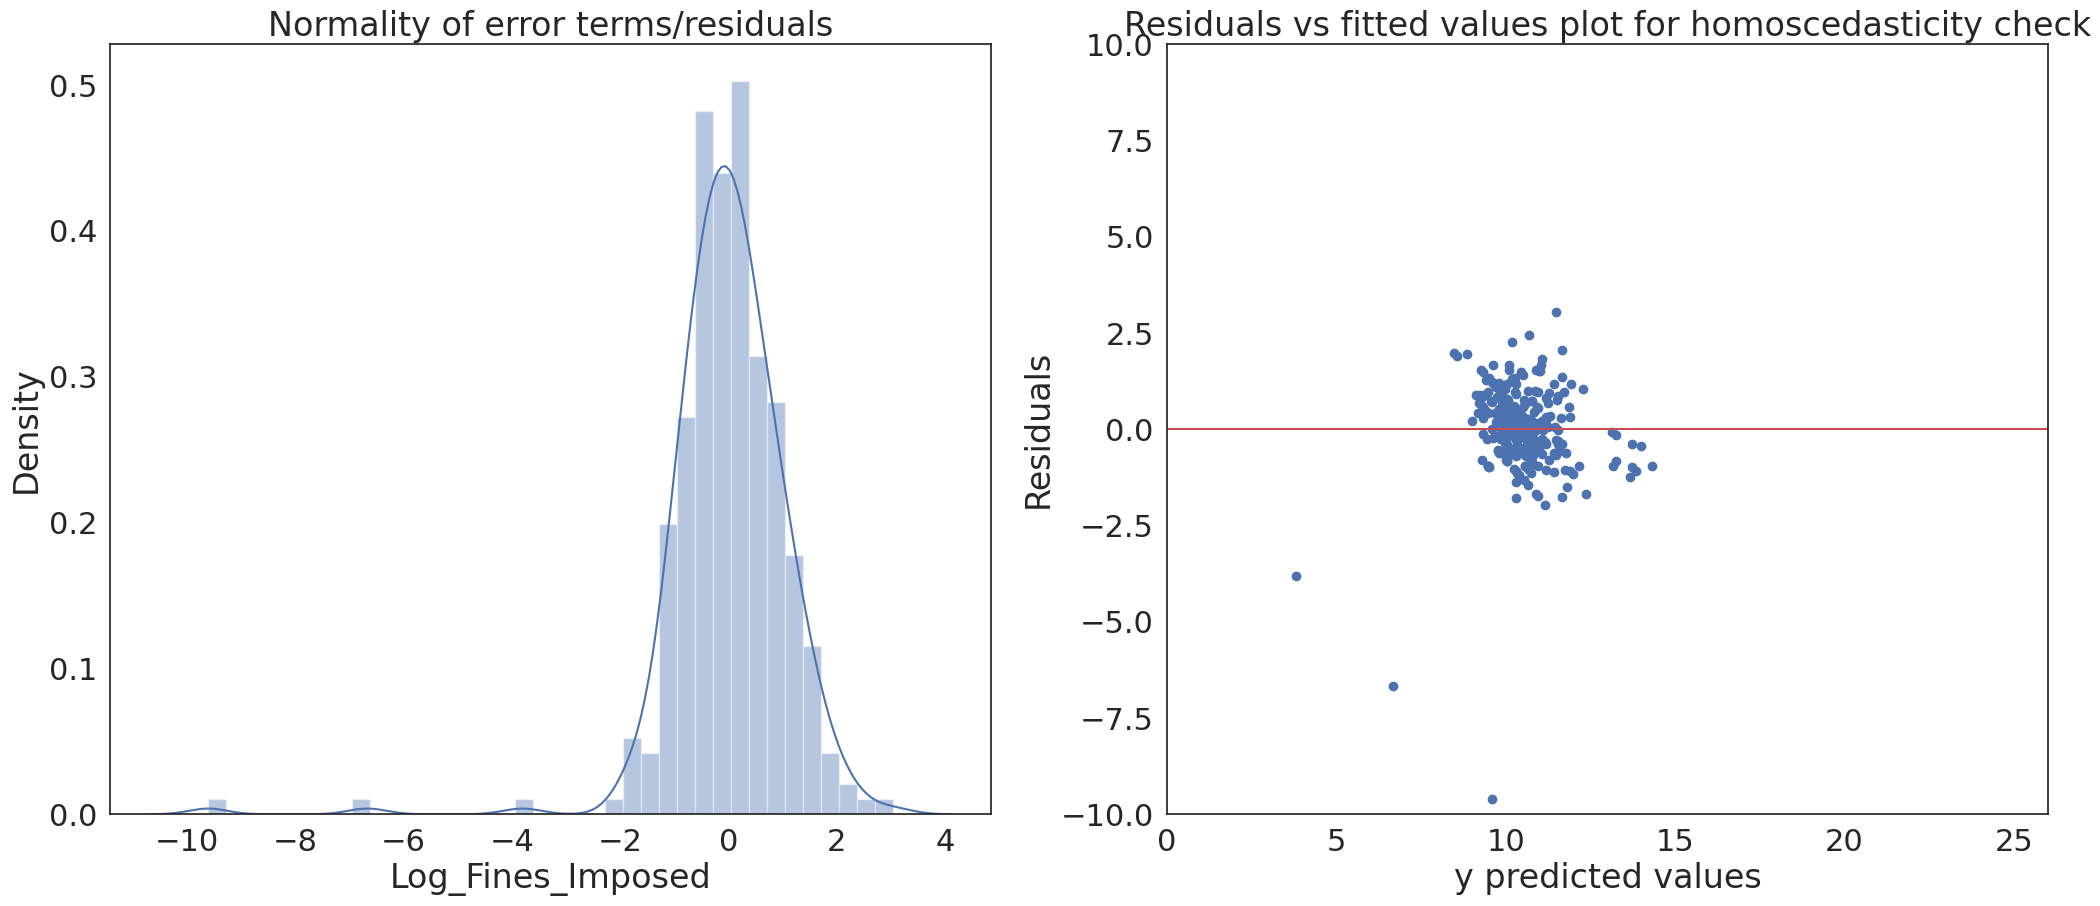

In [99]:
Run_Linear_Regrssion_Assumption(y_train,y_train_pred_ridge,X_train )

===== Mean of Residuals====
Mean of Residuals 0.017350754936121277
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 2.2887397635107942), ('p-value', 0.008489471695297051)]


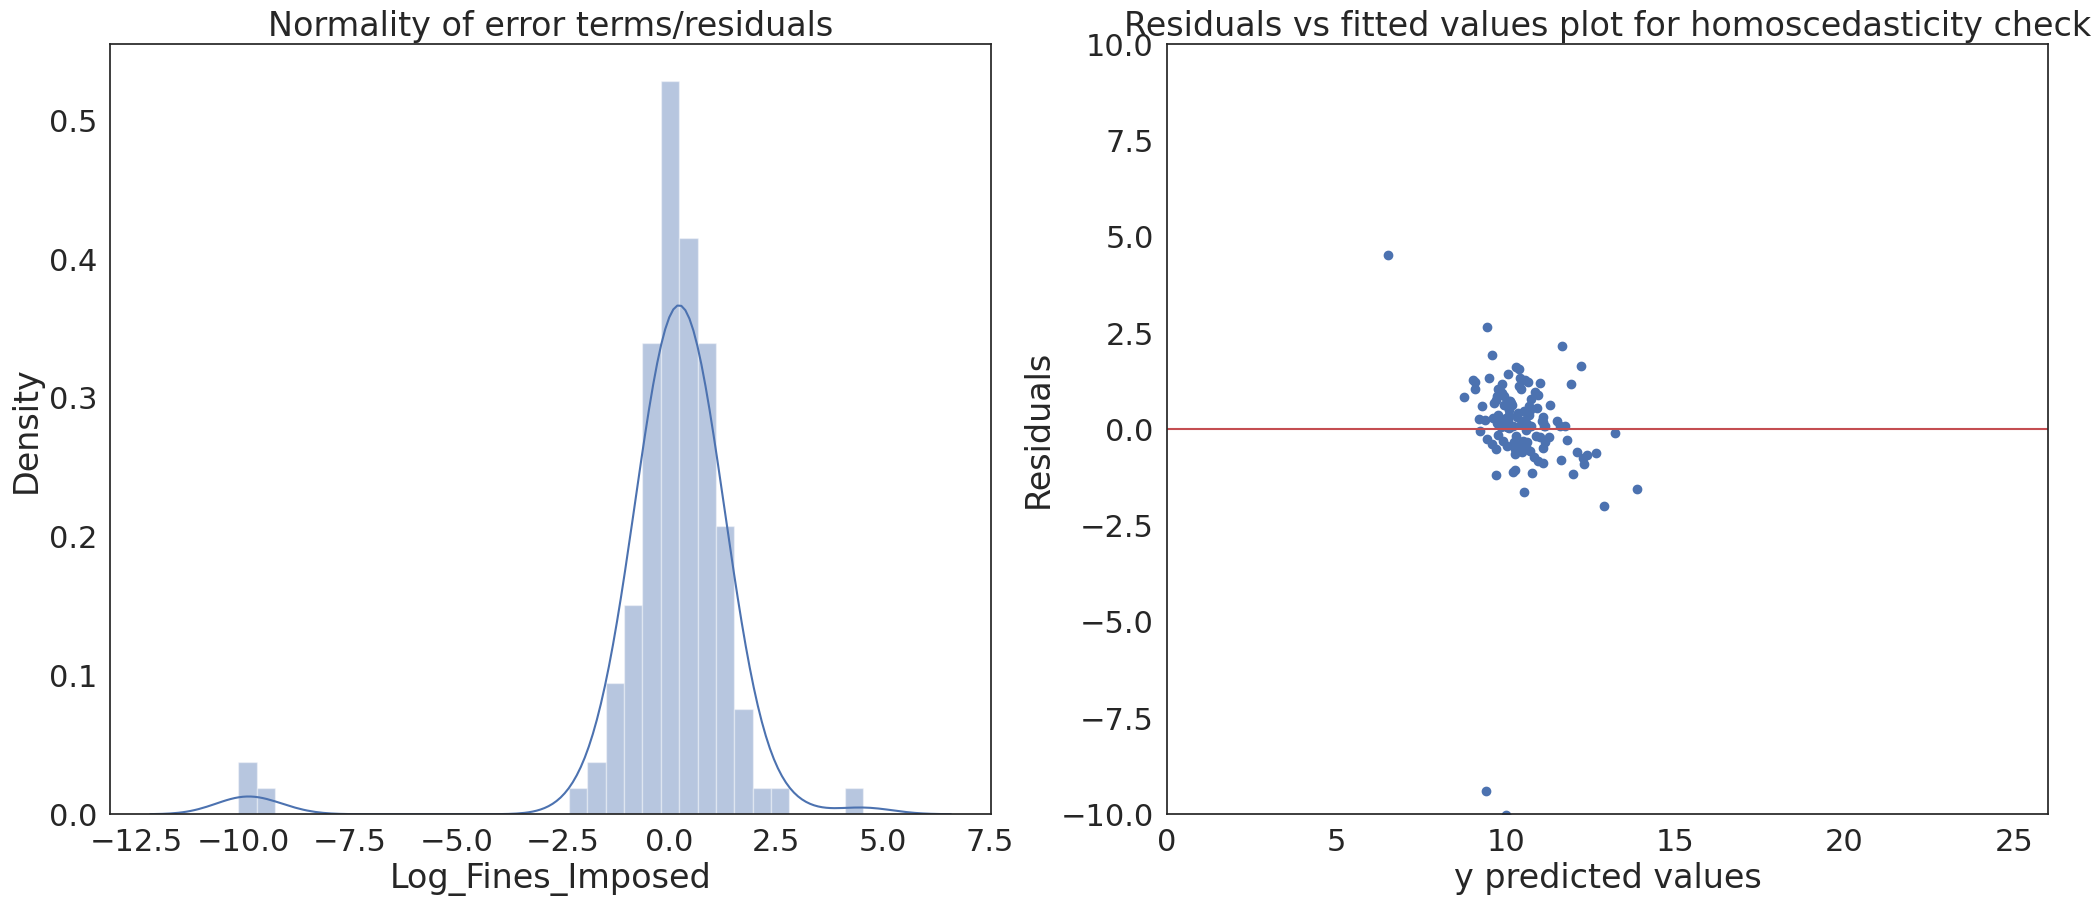

In [100]:
Run_Linear_Regrssion_Assumption(y_test,y_test_pred_ridge,X_test )

### ElasticNet Regression Model

In [101]:
from sklearn.linear_model import ElasticNet
# Train the model
elastiRegressor = ElasticNet(alpha = .1) #here setting alpha
elastiRegressor.fit(X_train, y_train)

y_train_pred_elastic = elastiRegressor.predict(X_train)
y_test_pred_elastic = elastiRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared_train_elastic = metrics.r2_score(y_train_pred_elastic,y_train)
R_squared_test_elastic = metrics.r2_score(y_test_pred_elastic,y_test)

Adjusted_R_square_train_elastic= 1 - (1-metrics.r2_score(y_train, y_train_pred_elastic))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_R_square_test_elastic= 1 - (1-metrics.r2_score(y_test, y_test_pred_elastic))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

MSE_train_elastic = metrics.mean_squared_error(y_train, y_train_pred_elastic)
RMSE_train_elastic = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_elastic))

MSE_test_elastic = metrics.mean_squared_error(y_test, y_test_pred_elastic)
RMSE_test_elastic = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_elastic))

print ("R squared Error on train set :", R_squared_train_elastic)
print ("R squared Error on test set :", R_squared_test_elastic)

print ("Adjusted R squared Error on train set :", Adjusted_R_square_train_elastic)
print ("Adjusted R squared Error on test set :", Adjusted_R_square_test_elastic)

coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = columns_name
coefficient_df['Coefficient_Value'] = pd. Series(elastiRegressor.coef_)

print (coefficient_df)

R squared Error on train set : -0.8816639915317199
R squared Error on test set : -4.323563321706122
Adjusted R squared Error on train set : 0.36093703302074276
Adjusted R squared Error on test set : -0.12781262745221378
                                          Column_Name  Coefficient_Value
0                                           Firm_name           0.012989
1                                     Offender_gender           0.000000
2                             Quasi-Criminal_offences           0.125288
3                       Conflict_of_Interest_Offences           0.000000
4                            Improper_Sales_Practices           0.002497
5                           Internal_Control_Offences          -0.068207
6                                      Other_offences           0.000000
7        Aggravating_Factors_Found_But_Not_Considered           0.069049
8                                  Mitigating_Factors          -0.019231
9            Aggravating_Factors_Found_And_Conside

===== Mean of Residuals====
Mean of Residuals 4.0231078244256543e-16
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 1.0238313043740381), ('p-value', 0.4494323318726552)]


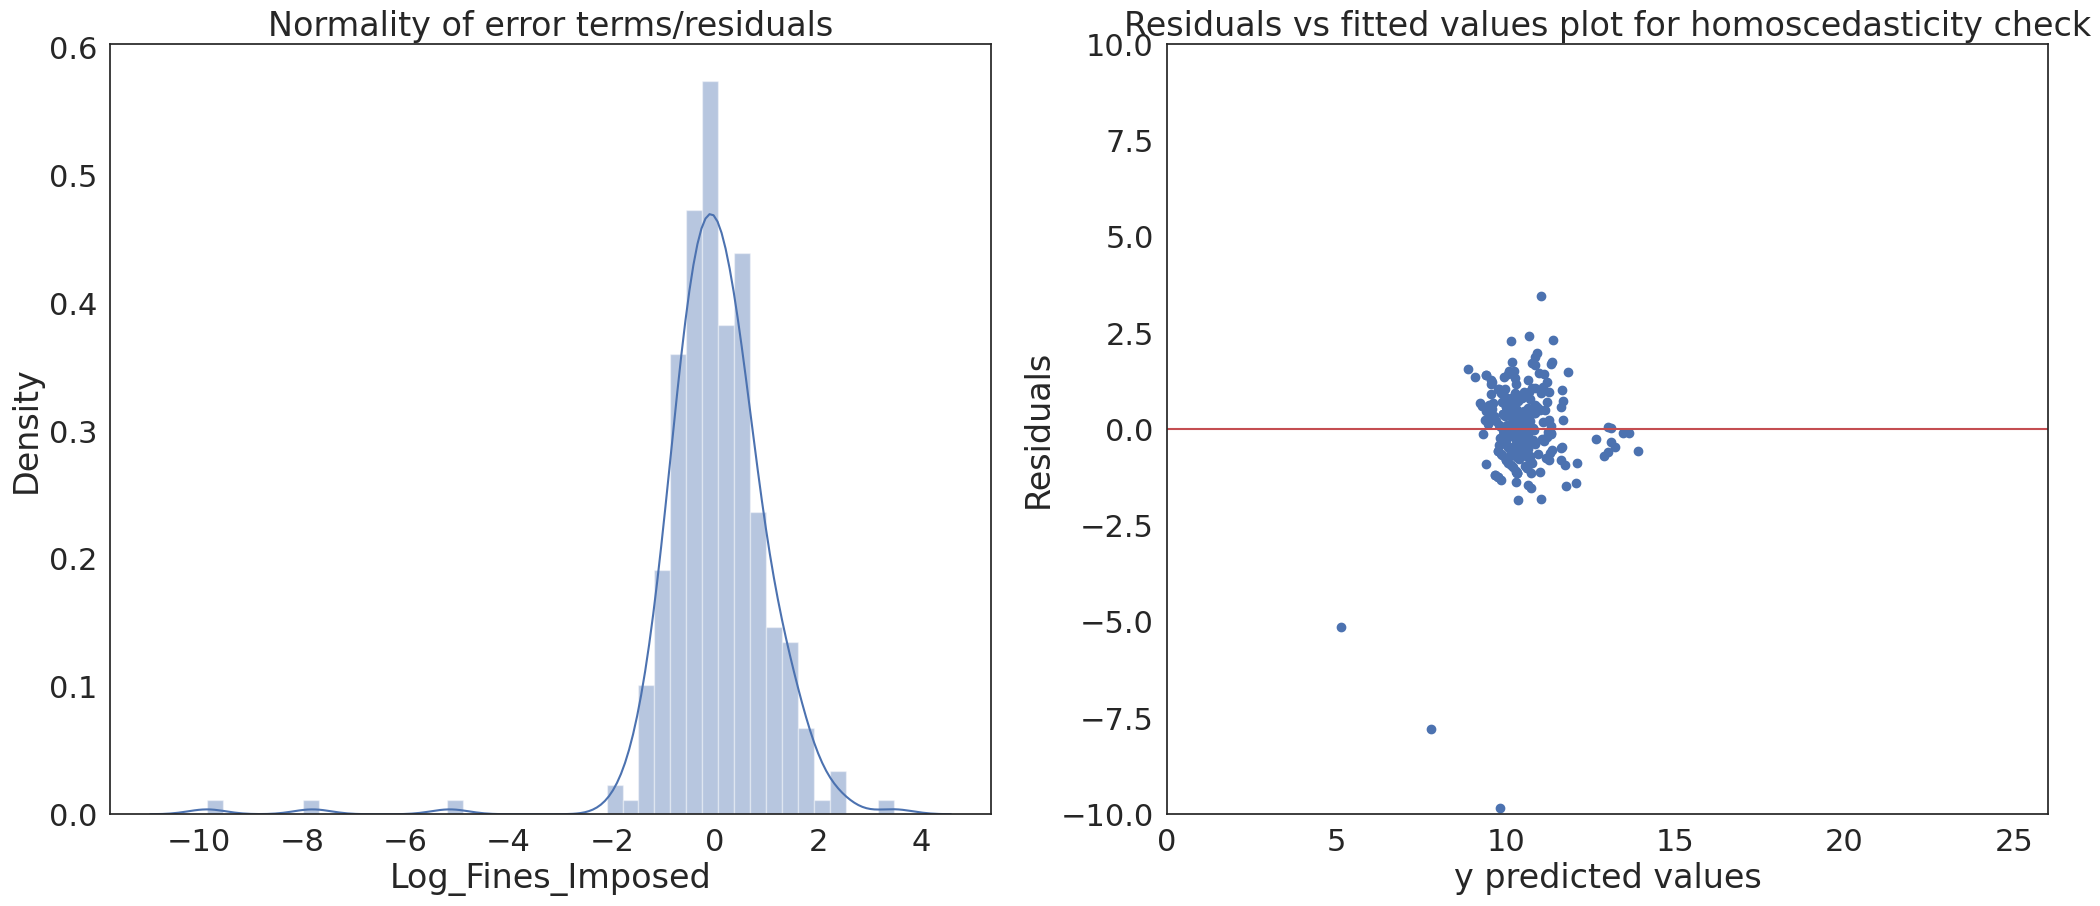

In [102]:
Run_Linear_Regrssion_Assumption(y_train,y_train_pred_elastic,X_train )

===== Mean of Residuals====
Mean of Residuals 0.017350754936121135
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 2.2887397635107942), ('p-value', 0.008489471695297051)]


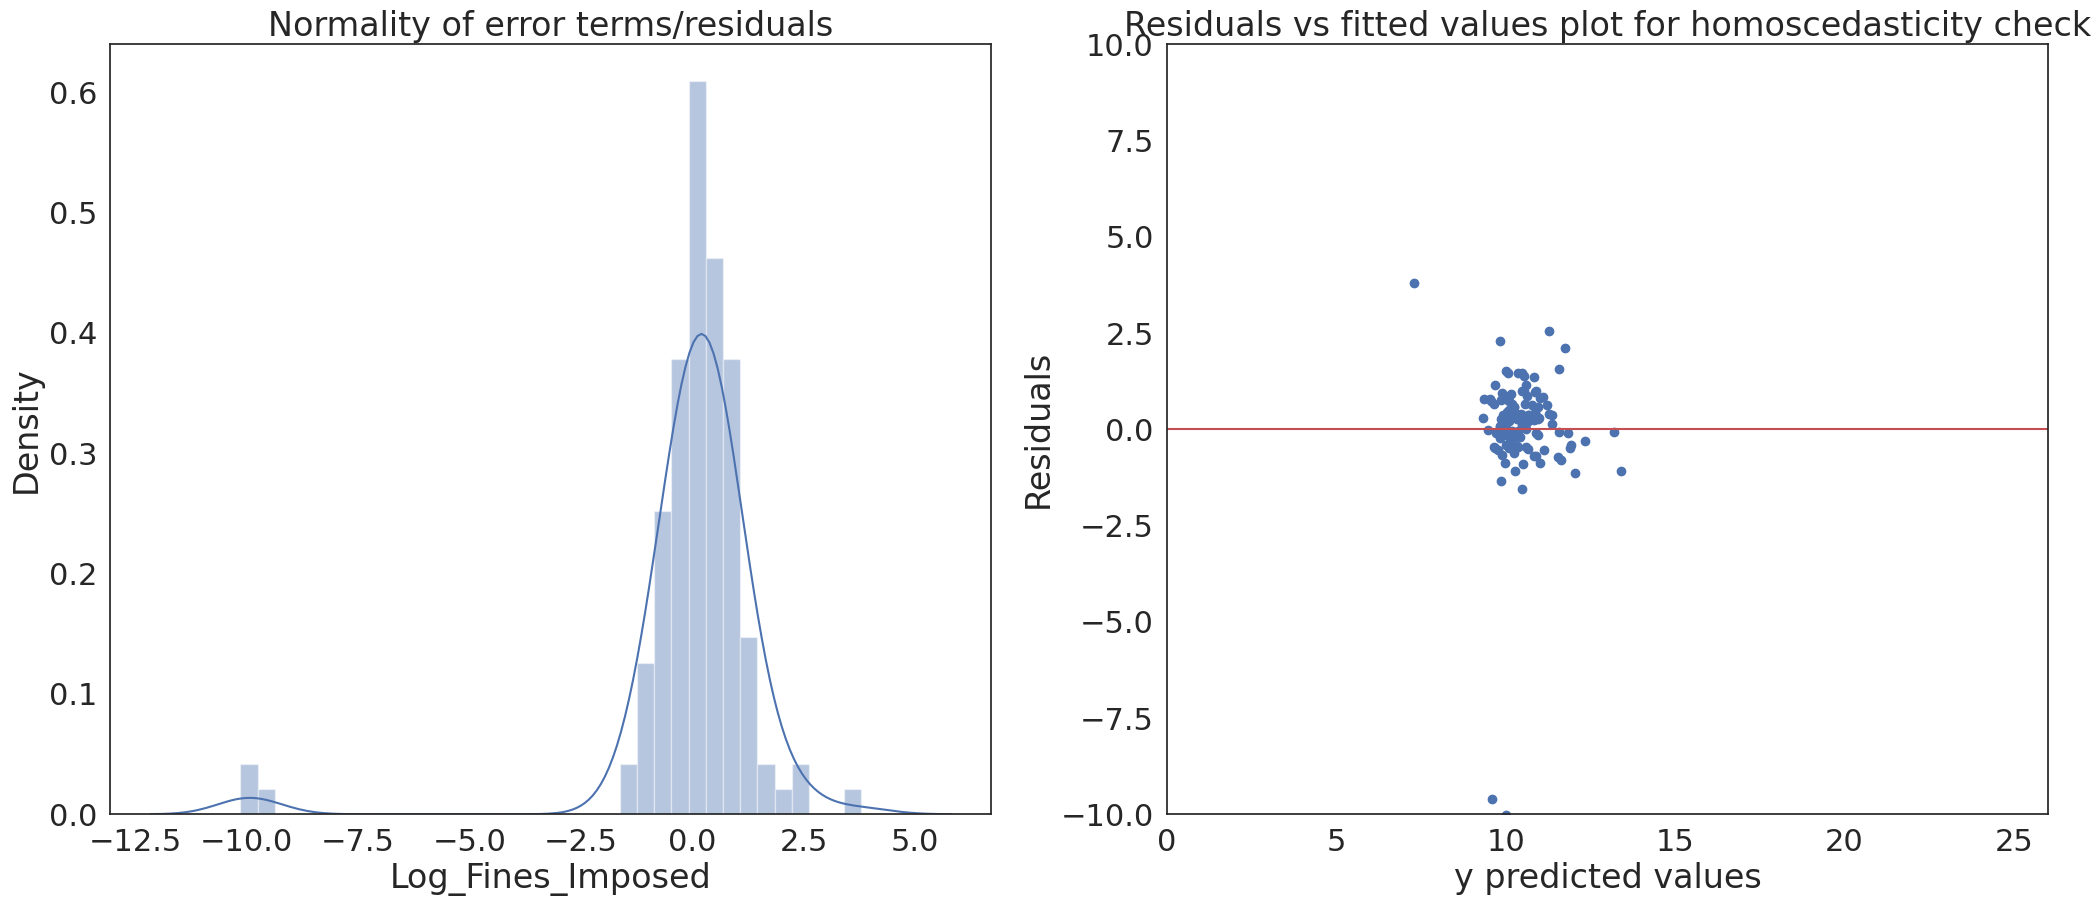

In [103]:
Run_Linear_Regrssion_Assumption(y_test,y_test_pred_elastic,X_test )

### Random Forest Regressor

In [104]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [105]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create a Random Forest Regressor
reg = RandomForestRegressor()

"""
reg = RandomizedSearchCV(estimator = reg,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
"""
# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
# Model prediction on train data
y_train_pred_rf = reg.predict(X_train)

In [107]:

# Model Evaluation
R_squared_train_rf = metrics.r2_score(y_train, y_train_pred_rf)
Adjusted_R_square_train_rf= 1 - (1-metrics.r2_score(y_train, y_train_pred_rf))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


MSE_train_rf = metrics.mean_squared_error(y_train, y_train_pred_rf)
RMSE_train_rf = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf))

print('R^2:', R_squared_train_rf)
print('Adjusted R^2:',Adjusted_R_square_train_rf)
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred_rf))
print('MSE:',MSE_train_rf)
print('RMSE:',RMSE_train_rf)

R^2: 0.9000254771880127
Adjusted R^2: 0.8883097127959829
MAE: 0.27303344947735114
MSE: 0.2246340873491289
RMSE: 0.4739557862808818


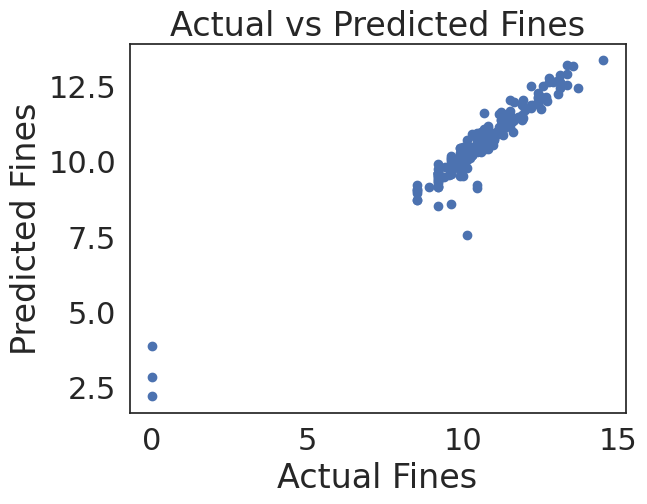

In [108]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_train_pred_rf)
plt.xlabel("Actual Fines")
plt.ylabel("Predicted Fines")
plt.title("Actual vs Predicted Fines")
plt.show()

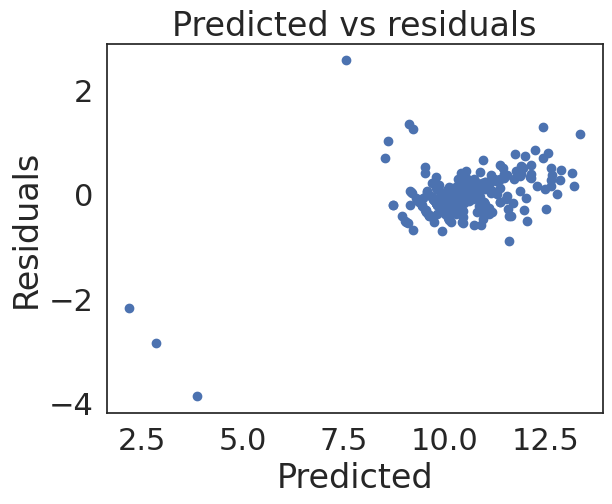

In [109]:
# Checking residuals
plt.scatter(y_train_pred_rf,y_train-y_train_pred_rf)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [110]:
# Predicting Test data with the model
y_test_pred_rf = reg.predict(X_test)

In [111]:

# Model Evaluation
R_squared_test_rf = metrics.r2_score(y_test, y_test_pred_rf)
Adjusted_R_square_test_rf= 1 - (1-metrics.r2_score(y_test, y_test_pred_rf))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

MSE_test_rf = metrics.mean_squared_error(y_test, y_test_pred_rf)
RMSE_test_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))

print('R^2:', R_squared_test_rf)
print('Adjusted R^2:',Adjusted_R_square_test_rf)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_rf))
print('MSE:',MSE_test_rf)
print('RMSE:',RMSE_test_rf)

R^2: 0.25475195114985116
Adjusted R^2: 0.011736283046541729
MAE: 1.0224958536585358
MSE: 2.70019196124634
RMSE: 1.6432260834244143


===== Mean of Residuals====
Mean of Residuals 0.001797560975610922
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 1.6538638608282585), ('p-value', 0.003503569060141656)]


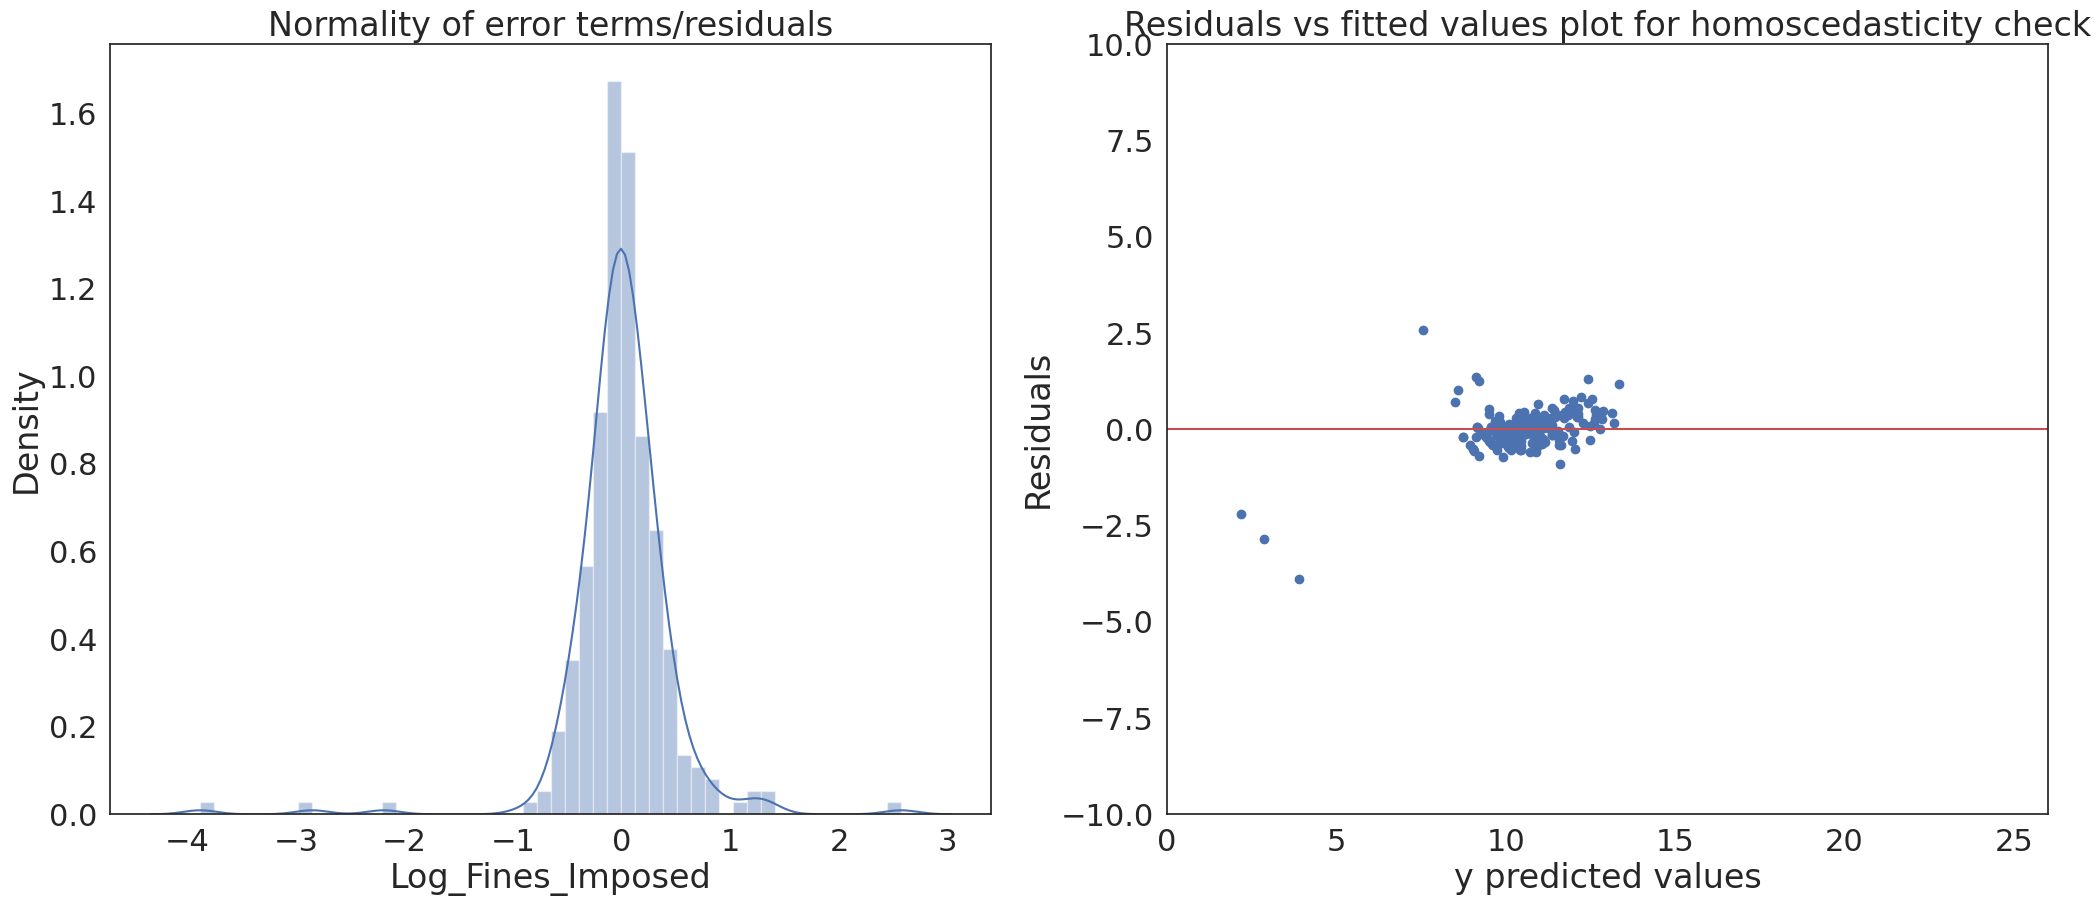

In [112]:
Run_Linear_Regrssion_Assumption(y_train,y_train_pred_rf,X_train )

===== Mean of Residuals====
Mean of Residuals 0.1667870731707338
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 3.070388823092536), ('p-value', 0.0006857374448519108)]


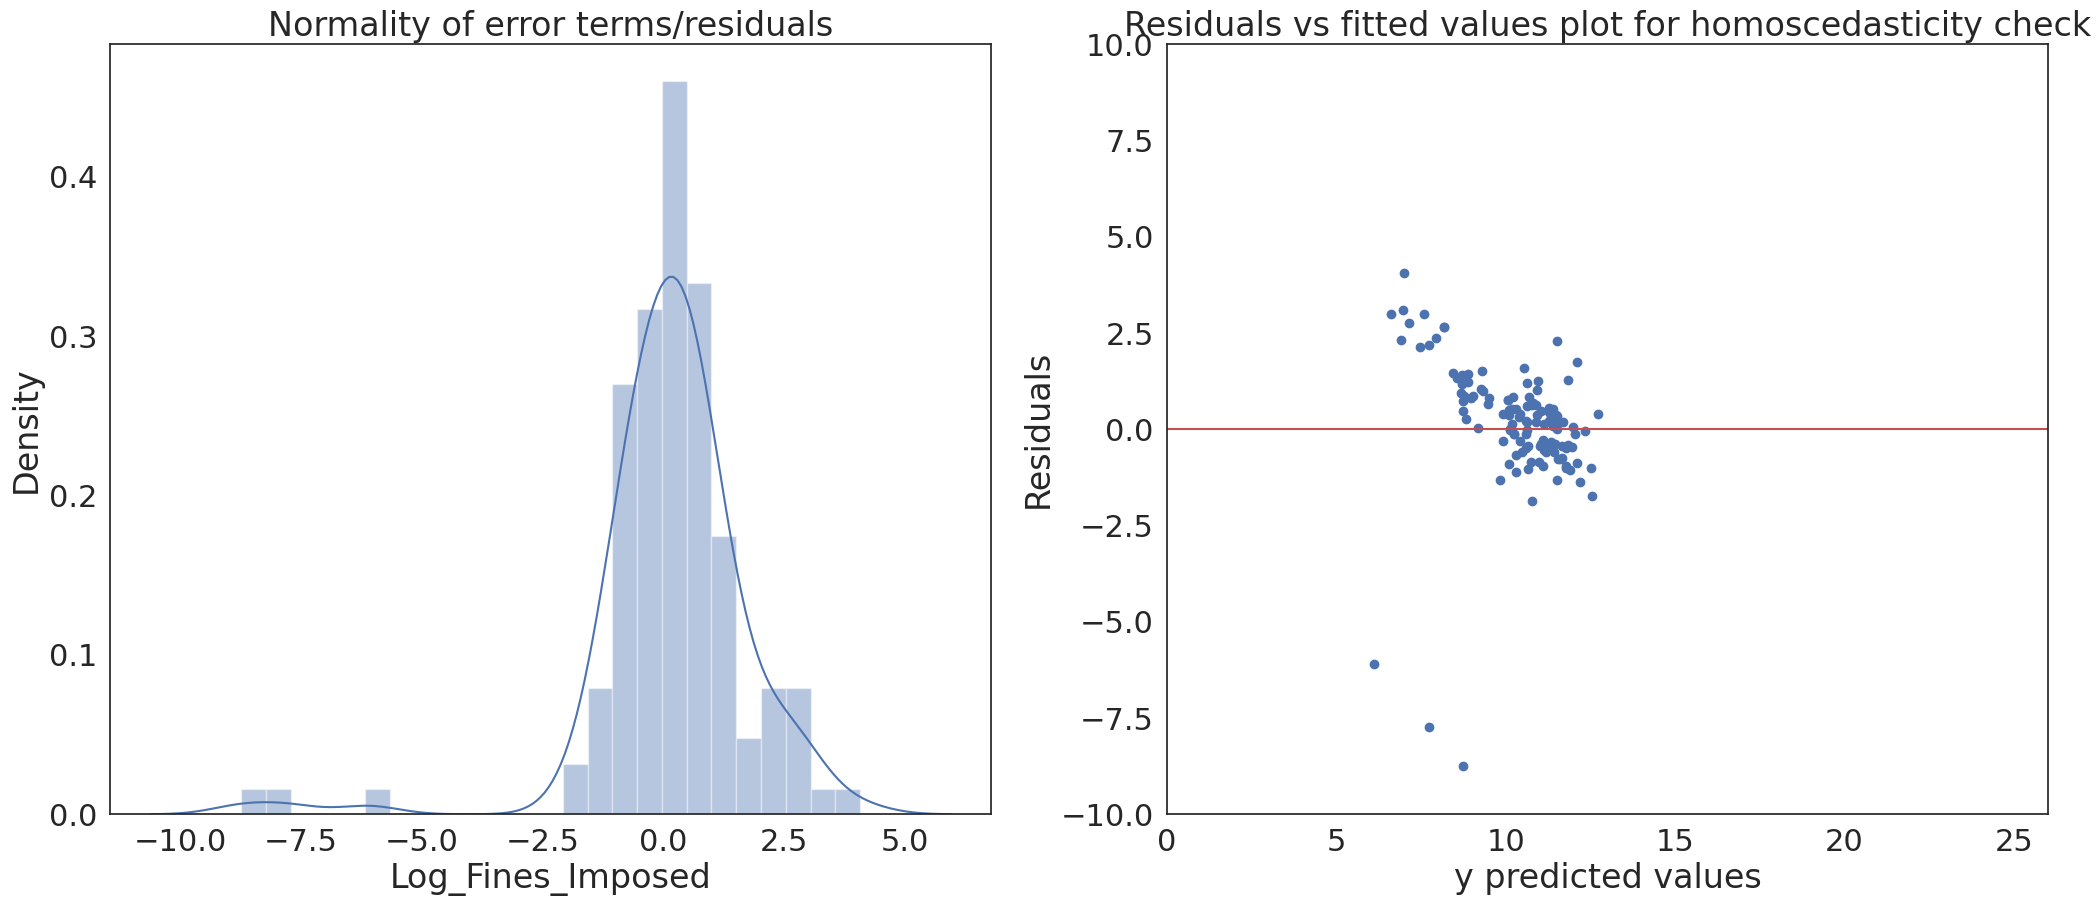

In [113]:
Run_Linear_Regrssion_Assumption(y_test,y_test_pred_rf,X_test )

In [114]:
plt.figure(figsize=(20,20), dpi=400)
sorted_feature_importance = reg.feature_importances_.argsort()
plt.barh(X.columns[sorted_feature_importance], 
        reg.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

### XGBoost Regressor

In [115]:
random_grid = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }


In [116]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

"""
reg = RandomizedSearchCV(estimator = reg,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

"""
# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [117]:
# Model prediction on train data
y_train_pred_xgb = reg.predict(X_train)

In [118]:

# Model Evaluation
R_squared_train_xgb = metrics.r2_score(y_train, y_train_pred_xgb)
Adjusted_R_square_train_xgb= 1 - (1-metrics.r2_score(y_train, y_train_pred_xgb))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

MSE_train_xgb = metrics.mean_squared_error(y_train, y_train_pred_xgb)
RMSE_train_xgb = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_xgb))

print('R^2:', R_squared_train_xgb)
print('Adjusted R^2:',Adjusted_R_square_train_xgb)
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred_xgb))
print('MSE:',MSE_train_xgb)
print('RMSE:',RMSE_train_xgb)

R^2: 0.9999993152238208
Adjusted R^2: 0.9999992349766123
MAE: 0.0008391287384720609
MSE: 1.5386327209797074e-06
RMSE: 0.001240416349851818


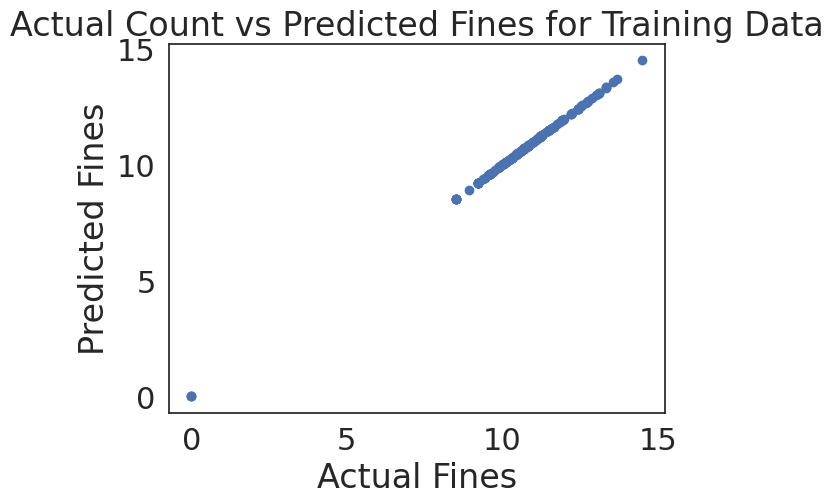

In [119]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_train_pred_xgb)
plt.xlabel("Actual Fines")
plt.ylabel("Predicted Fines")
plt.title("Actual Count vs Predicted Fines for Training Data")
plt.show()

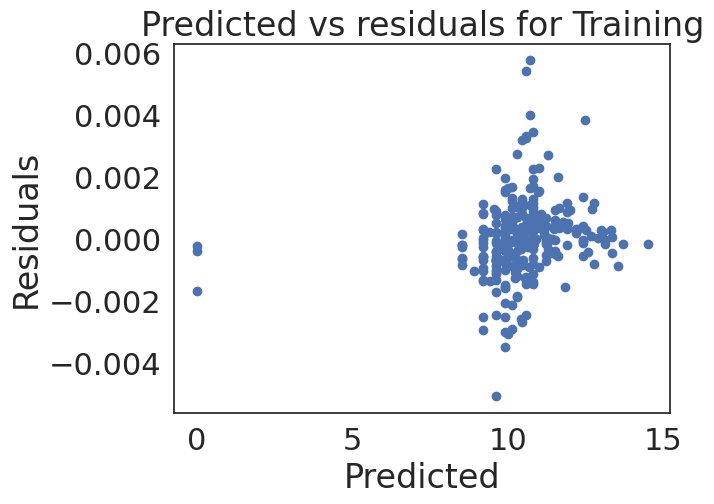

In [120]:
# Checking residuals
plt.scatter(y_train_pred_xgb,y_train-y_train_pred_xgb)
plt.title("Predicted vs residuals for Training")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [121]:
#Predicting Test data with the model
y_test_pred_xgb = reg.predict(X_test)

In [122]:

# Model Evaluation
R_squared_test_xgb = metrics.r2_score(y_test, y_test_pred_xgb)
Adjusted_R_square_test_xgb= 1 - (1-metrics.r2_score(y_test, y_test_pred_xgb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

MSE_test_xgb = metrics.mean_squared_error(y_test, y_test_pred_xgb)
RMSE_test_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgb))

print('R^2:', R_squared_test_xgb)
print('Adjusted R^2:',Adjusted_R_square_test_xgb)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xgb))
print('MSE:',MSE_test_xgb)
print('RMSE:',RMSE_test_xgb)

R^2: 0.2026962038795621
Adjusted R^2: -0.05729416442058066
MAE: 0.9514820948034767
MSE: 2.888800989519246
RMSE: 1.6996473132739174


===== Mean of Residuals====
Mean of Residuals -2.465196578520094e-06
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 1.1069083711517216), ('p-value', 0.29213396822483084)]


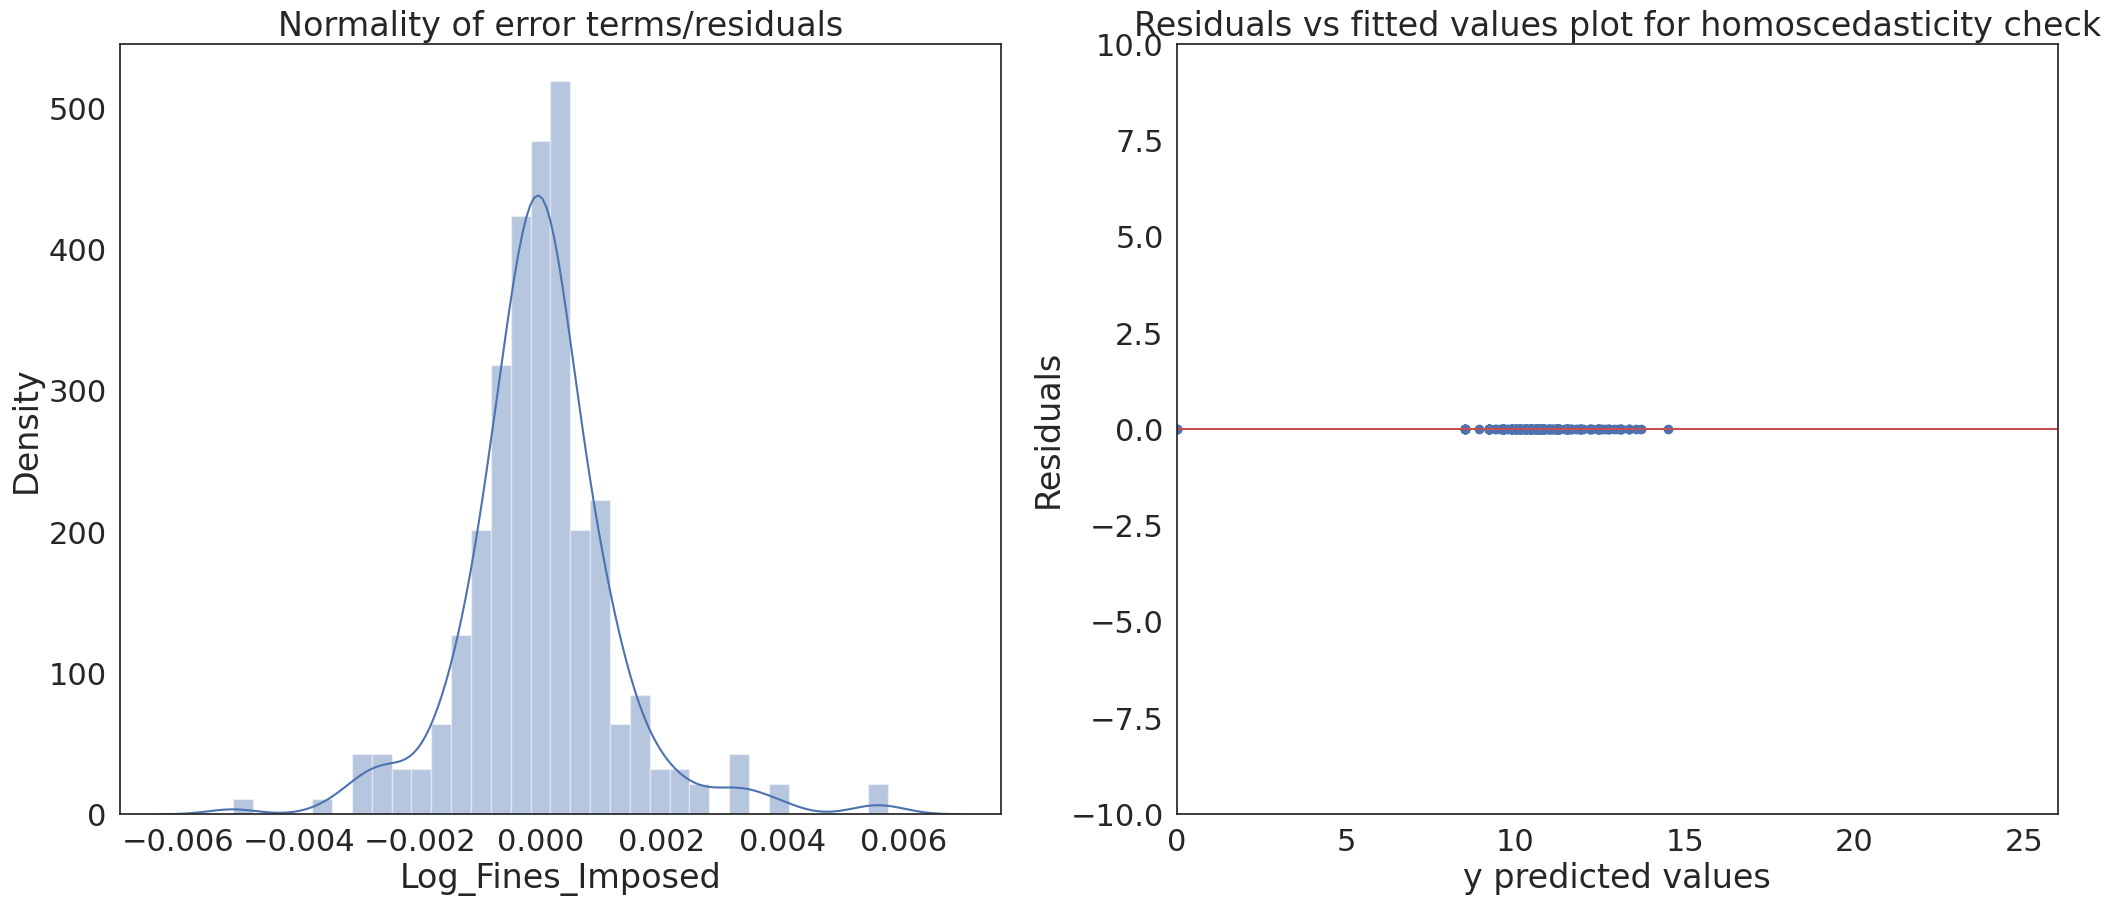

In [123]:
Run_Linear_Regrssion_Assumption(y_train,y_train_pred_xgb,X_train )

===== Mean of Residuals====
Mean of Residuals 0.04591157885295591
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 3.9070954844791164), ('p-value', 5.962946263032098e-05)]


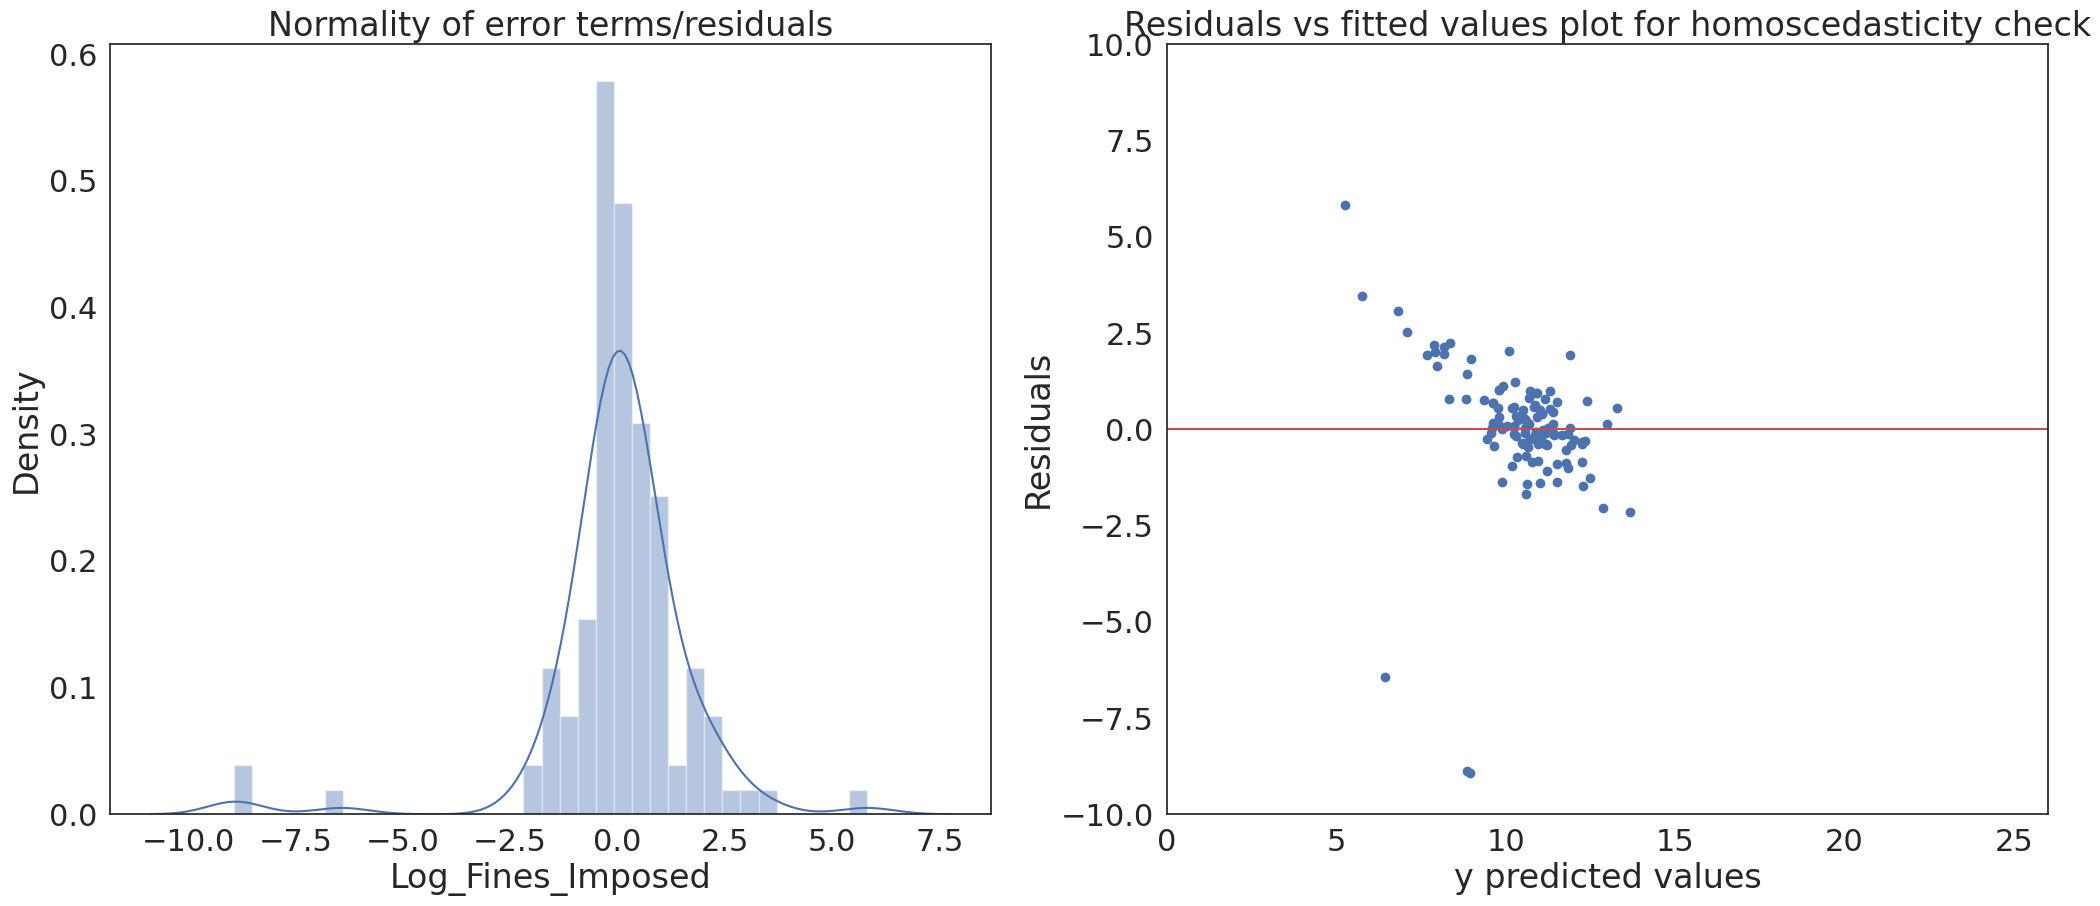

In [124]:
Run_Linear_Regrssion_Assumption(y_test,y_test_pred_xgb,X_test )

### 

### CatBoost Regression

In [125]:
import catboost as cb
cb_model = cb.CatBoostRegressor(loss_function='RMSE')

In [126]:
# Model prediction on train data
cb_model.fit(X_train, y_train)

1:	learn: 1.4705828	total: 48.3ms	remaining: 24.1s
2:	learn: 1.4555820	total: 49.1ms	remaining: 16.3s
3:	learn: 1.4482632	total: 50ms	remaining: 12.5s
4:	learn: 1.4351986	total: 51.3ms	remaining: 10.2s
5:	learn: 1.4233139	total: 52.3ms	remaining: 8.67s
6:	learn: 1.4143557	total: 53.2ms	remaining: 7.55s
7:	learn: 1.4028190	total: 54.4ms	remaining: 6.75s
8:	learn: 1.3898200	total: 55.5ms	remaining: 6.11s
9:	learn: 1.3766320	total: 56.3ms	remaining: 5.58s
10:	learn: 1.3684234	total: 57.2ms	remaining: 5.14s
11:	learn: 1.3632550	total: 58ms	remaining: 4.77s
12:	learn: 1.3510899	total: 58.9ms	remaining: 4.47s
13:	learn: 1.3381299	total: 59.7ms	remaining: 4.21s
14:	learn: 1.3331152	total: 60.5ms	remaining: 3.98s
15:	learn: 1.3208139	total: 61.4ms	remaining: 3.77s
16:	learn: 1.3124543	total: 62.3ms	remaining: 3.6s
17:	learn: 1.3008351	total: 63.1ms	remaining: 3.44s
18:	learn: 1.2915563	total: 64ms	remaining: 3.3s
19:	learn: 1.2863600	total: 64.8ms	remaining: 3.17s
20:	learn: 1.2794428	total: 6

In [127]:
y_train_pred_cb = cb_model.predict(X_train)

In [128]:

# Model Evaluation
R_squared_train_cb = metrics.r2_score(y_train, y_train_pred_cb)
Adjusted_R_square_train_cb= 1 - (1-metrics.r2_score(y_train, y_train_pred_cb))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

MSE_train_cb = metrics.mean_squared_error(y_train, y_train_pred_cb)
RMSE_train_cb = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_cb))

print('R^2:', R_squared_train_cb)
print('Adjusted R^2:',Adjusted_R_square_train_cb)
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred_cb))
print('MSE:',MSE_train_cb)
print('RMSE:',RMSE_train_cb)

R^2: 0.9973263039649419
Adjusted R^2: 0.9970129802108335
MAE: 0.060135957014453255
MSE: 0.006007563245025379
RMSE: 0.07750847208547837


In [129]:
# Model prediction on train data
y_test_pred_cb = cb_model.predict(X_test)

In [130]:
# Model Evaluation
R_squared_test_cb = metrics.r2_score(y_test, y_test_pred_cb)
Adjusted_R_square_test_cb= 1 - (1-metrics.r2_score(y_test, y_test_pred_cb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

MSE_test_cb = metrics.mean_squared_error(y_test, y_test_pred_cb)
RMSE_test_cb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cb))

print('R^2:', R_squared_test_cb)
print('Adjusted R^2:',Adjusted_R_square_test_cb)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_cb))
print('MSE:',MSE_test_cb)
print('RMSE:',RMSE_test_cb)

R^2: 0.3042385500014495
Adjusted R^2: 0.07735981630626998
MAE: 0.8798540463719104
MSE: 2.520891503345542
RMSE: 1.5877315589688143


===== Mean of Residuals====
Mean of Residuals -5.057398874147172e-06
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 0.9318546600116938), ('p-value', 0.6479347771234807)]


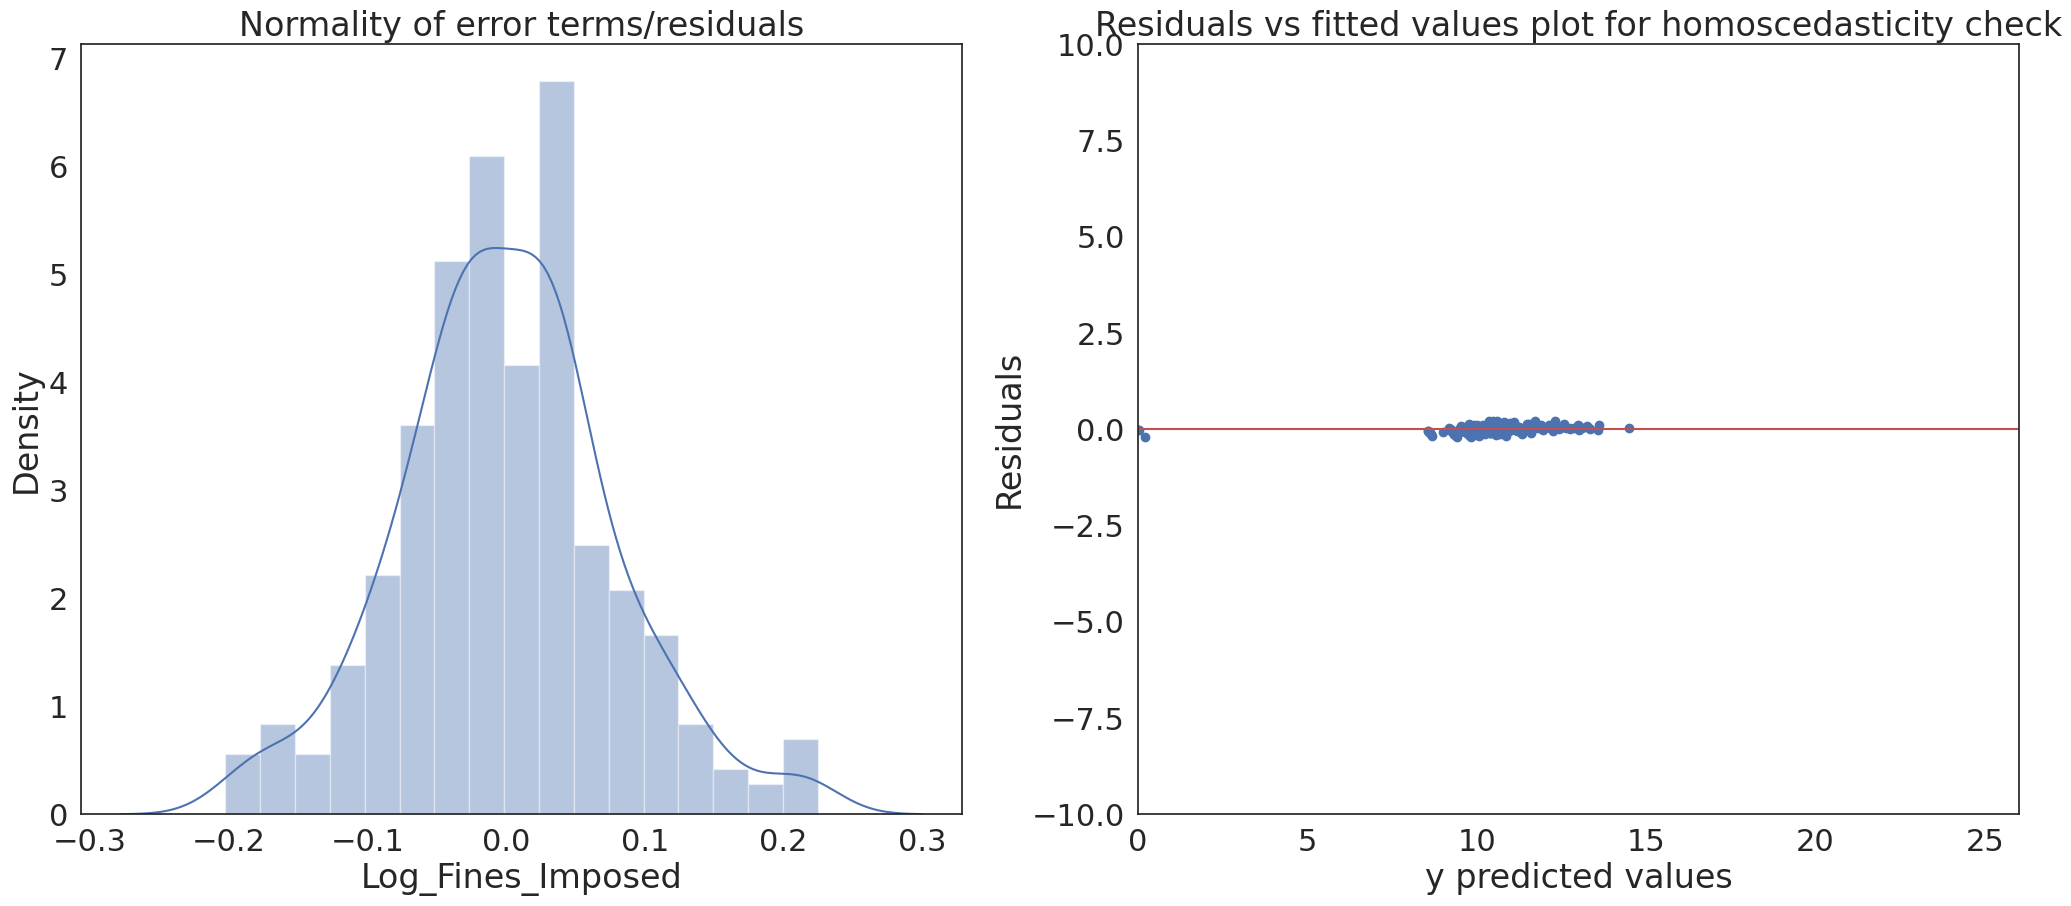

In [131]:
Run_Linear_Regrssion_Assumption(y_train,y_train_pred_cb,X_train )

===== Mean of Residuals====
Mean of Residuals 0.015129759782787917
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 4.281608992574251), ('p-value', 2.1741627591154434e-05)]


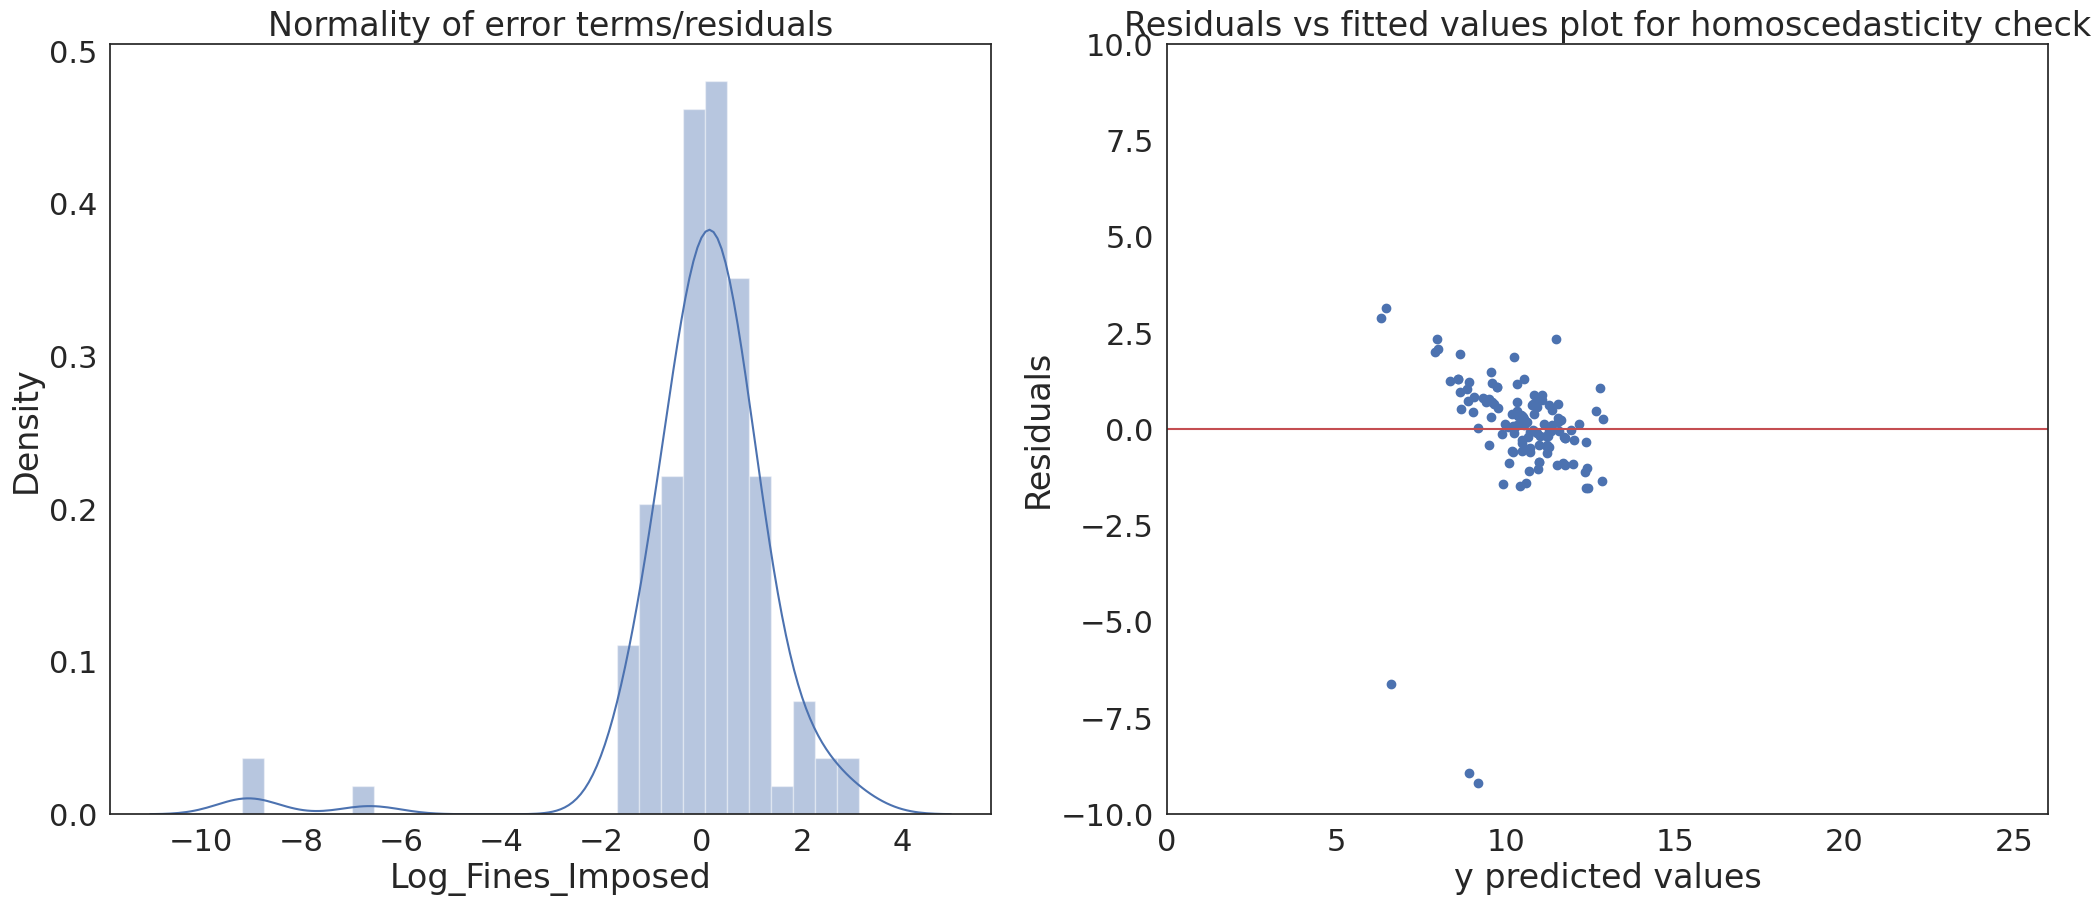

In [132]:
Run_Linear_Regrssion_Assumption(y_test,y_test_pred_cb,X_test )

In [133]:
plt.figure(figsize=(20,20), dpi=400)
sorted_feature_importance = cb_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_feature_importance], 
        cb_model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

Text(0.5, 0, 'CatBoost Feature Importance')

### KNN Regression

In [134]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
rmse_val_train = [] #to store rmse values for different k
rmse_val_test = []
K = range(1,21)
for k in K:
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = k)

    knn_model.fit(X_train, y_train)  #fit the model
    y_train_pred_knn=knn_model.predict(X_train) #make prediction on train set
    y_test_pred_knn=knn_model.predict(X_test) #make prediction on train set
    error_train = sqrt(mean_squared_error(y_train,y_train_pred_knn)) #calculate rmse
    error_test = sqrt(mean_squared_error(y_test,y_test_pred_knn)) #calculate rmse
    rmse_val_train.append(error_train) #store rmse values
    rmse_val_test.append(error_test) #store rmse values
    print('RMSE value for k= ' , k , ' Train Error is:', error_train, ' Test Error is:', error_test)

RMSE value for k=  1  Train Error is: 0.0  Test Error is: 2.449674073227018
RMSE value for k=  2  Train Error is: 0.9091028640487295  Test Error is: 2.1766716699913857
RMSE value for k=  3  Train Error is: 1.0830275195984223  Test Error is: 1.975980604330456
RMSE value for k=  4  Train Error is: 1.145226735782122  Test Error is: 1.9534649592590203
RMSE value for k=  5  Train Error is: 1.1470536660298911  Test Error is: 1.9144110869288495
RMSE value for k=  6  Train Error is: 1.1632418141954333  Test Error is: 1.9175816531682033
RMSE value for k=  7  Train Error is: 1.2096712066867568  Test Error is: 1.918659909723111
RMSE value for k=  8  Train Error is: 1.2373951369096134  Test Error is: 1.8890029307570002
RMSE value for k=  9  Train Error is: 1.2520845972572554  Test Error is: 1.8817648399248181
RMSE value for k=  10  Train Error is: 1.2553203456524789  Test Error is: 1.8872510429688447
RMSE value for k=  11  Train Error is: 1.2698736513037736  Test Error is: 1.8765347652315485
RMSE 

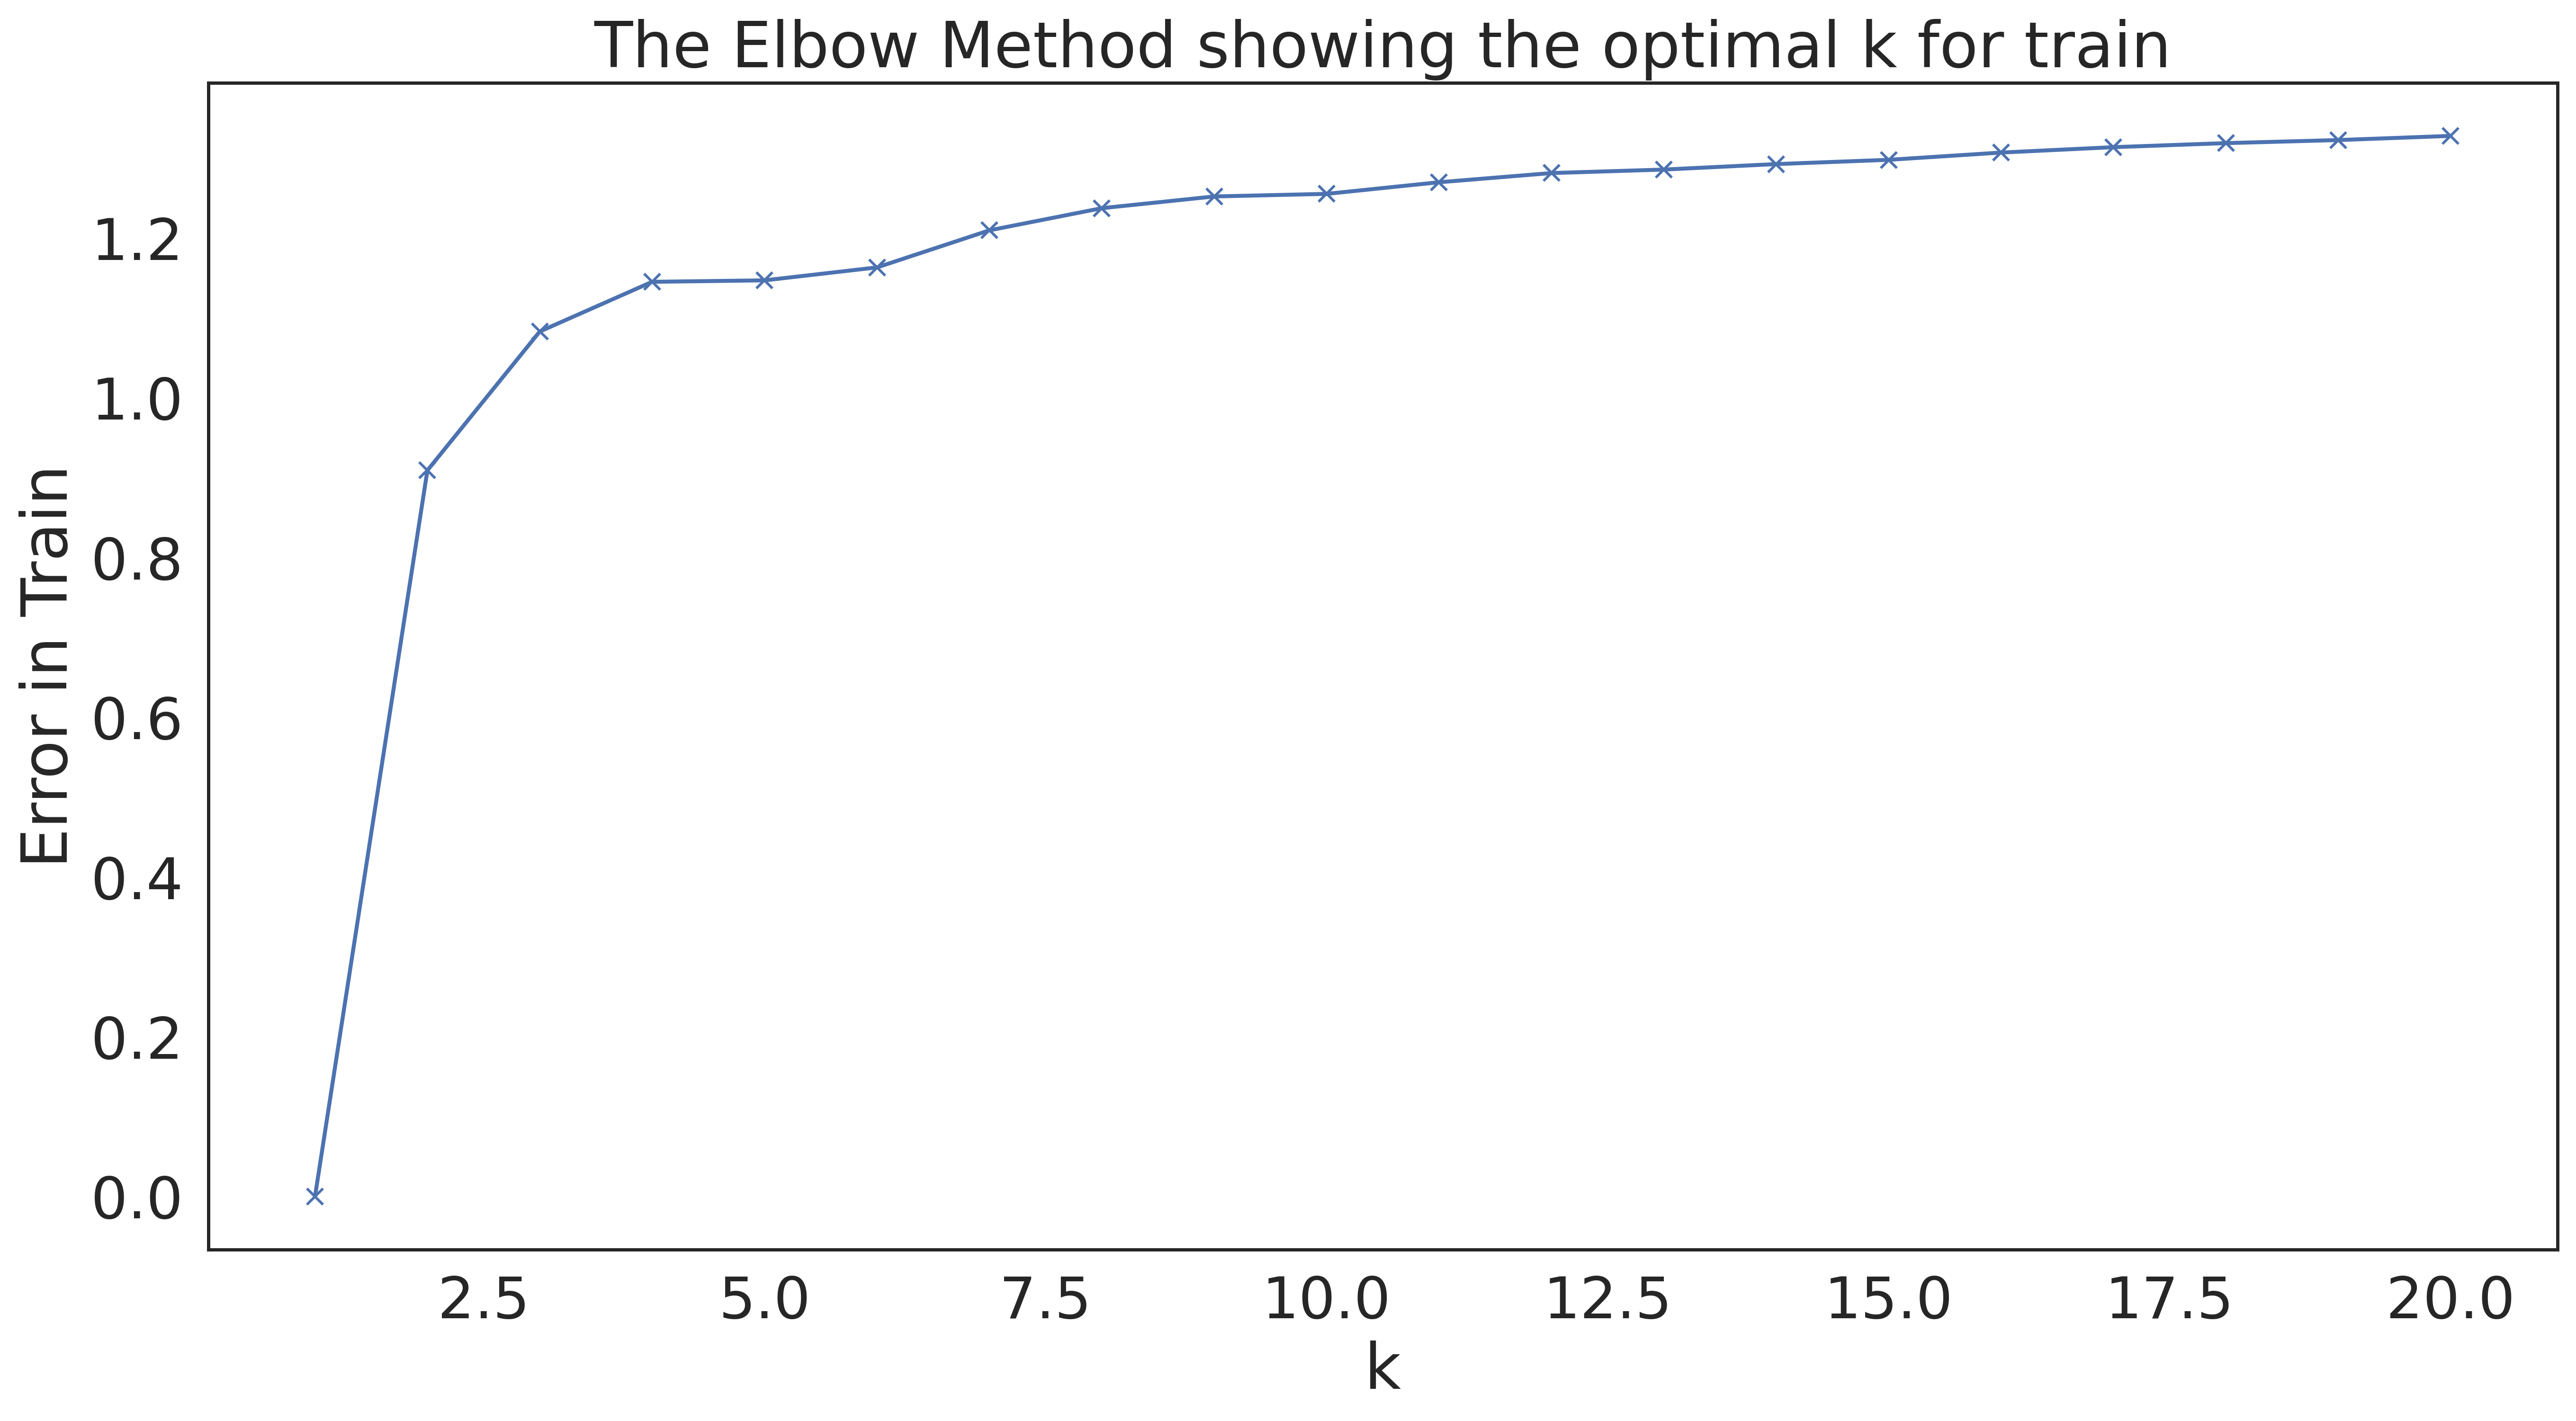

In [136]:
plt.figure(figsize=(16,8), dpi=400)
plt.plot(K, rmse_val_train, 'bx-')
plt.xlabel('k')
plt.ylabel('Error in Train')
plt.title('The Elbow Method showing the optimal k for train')
plt.show()

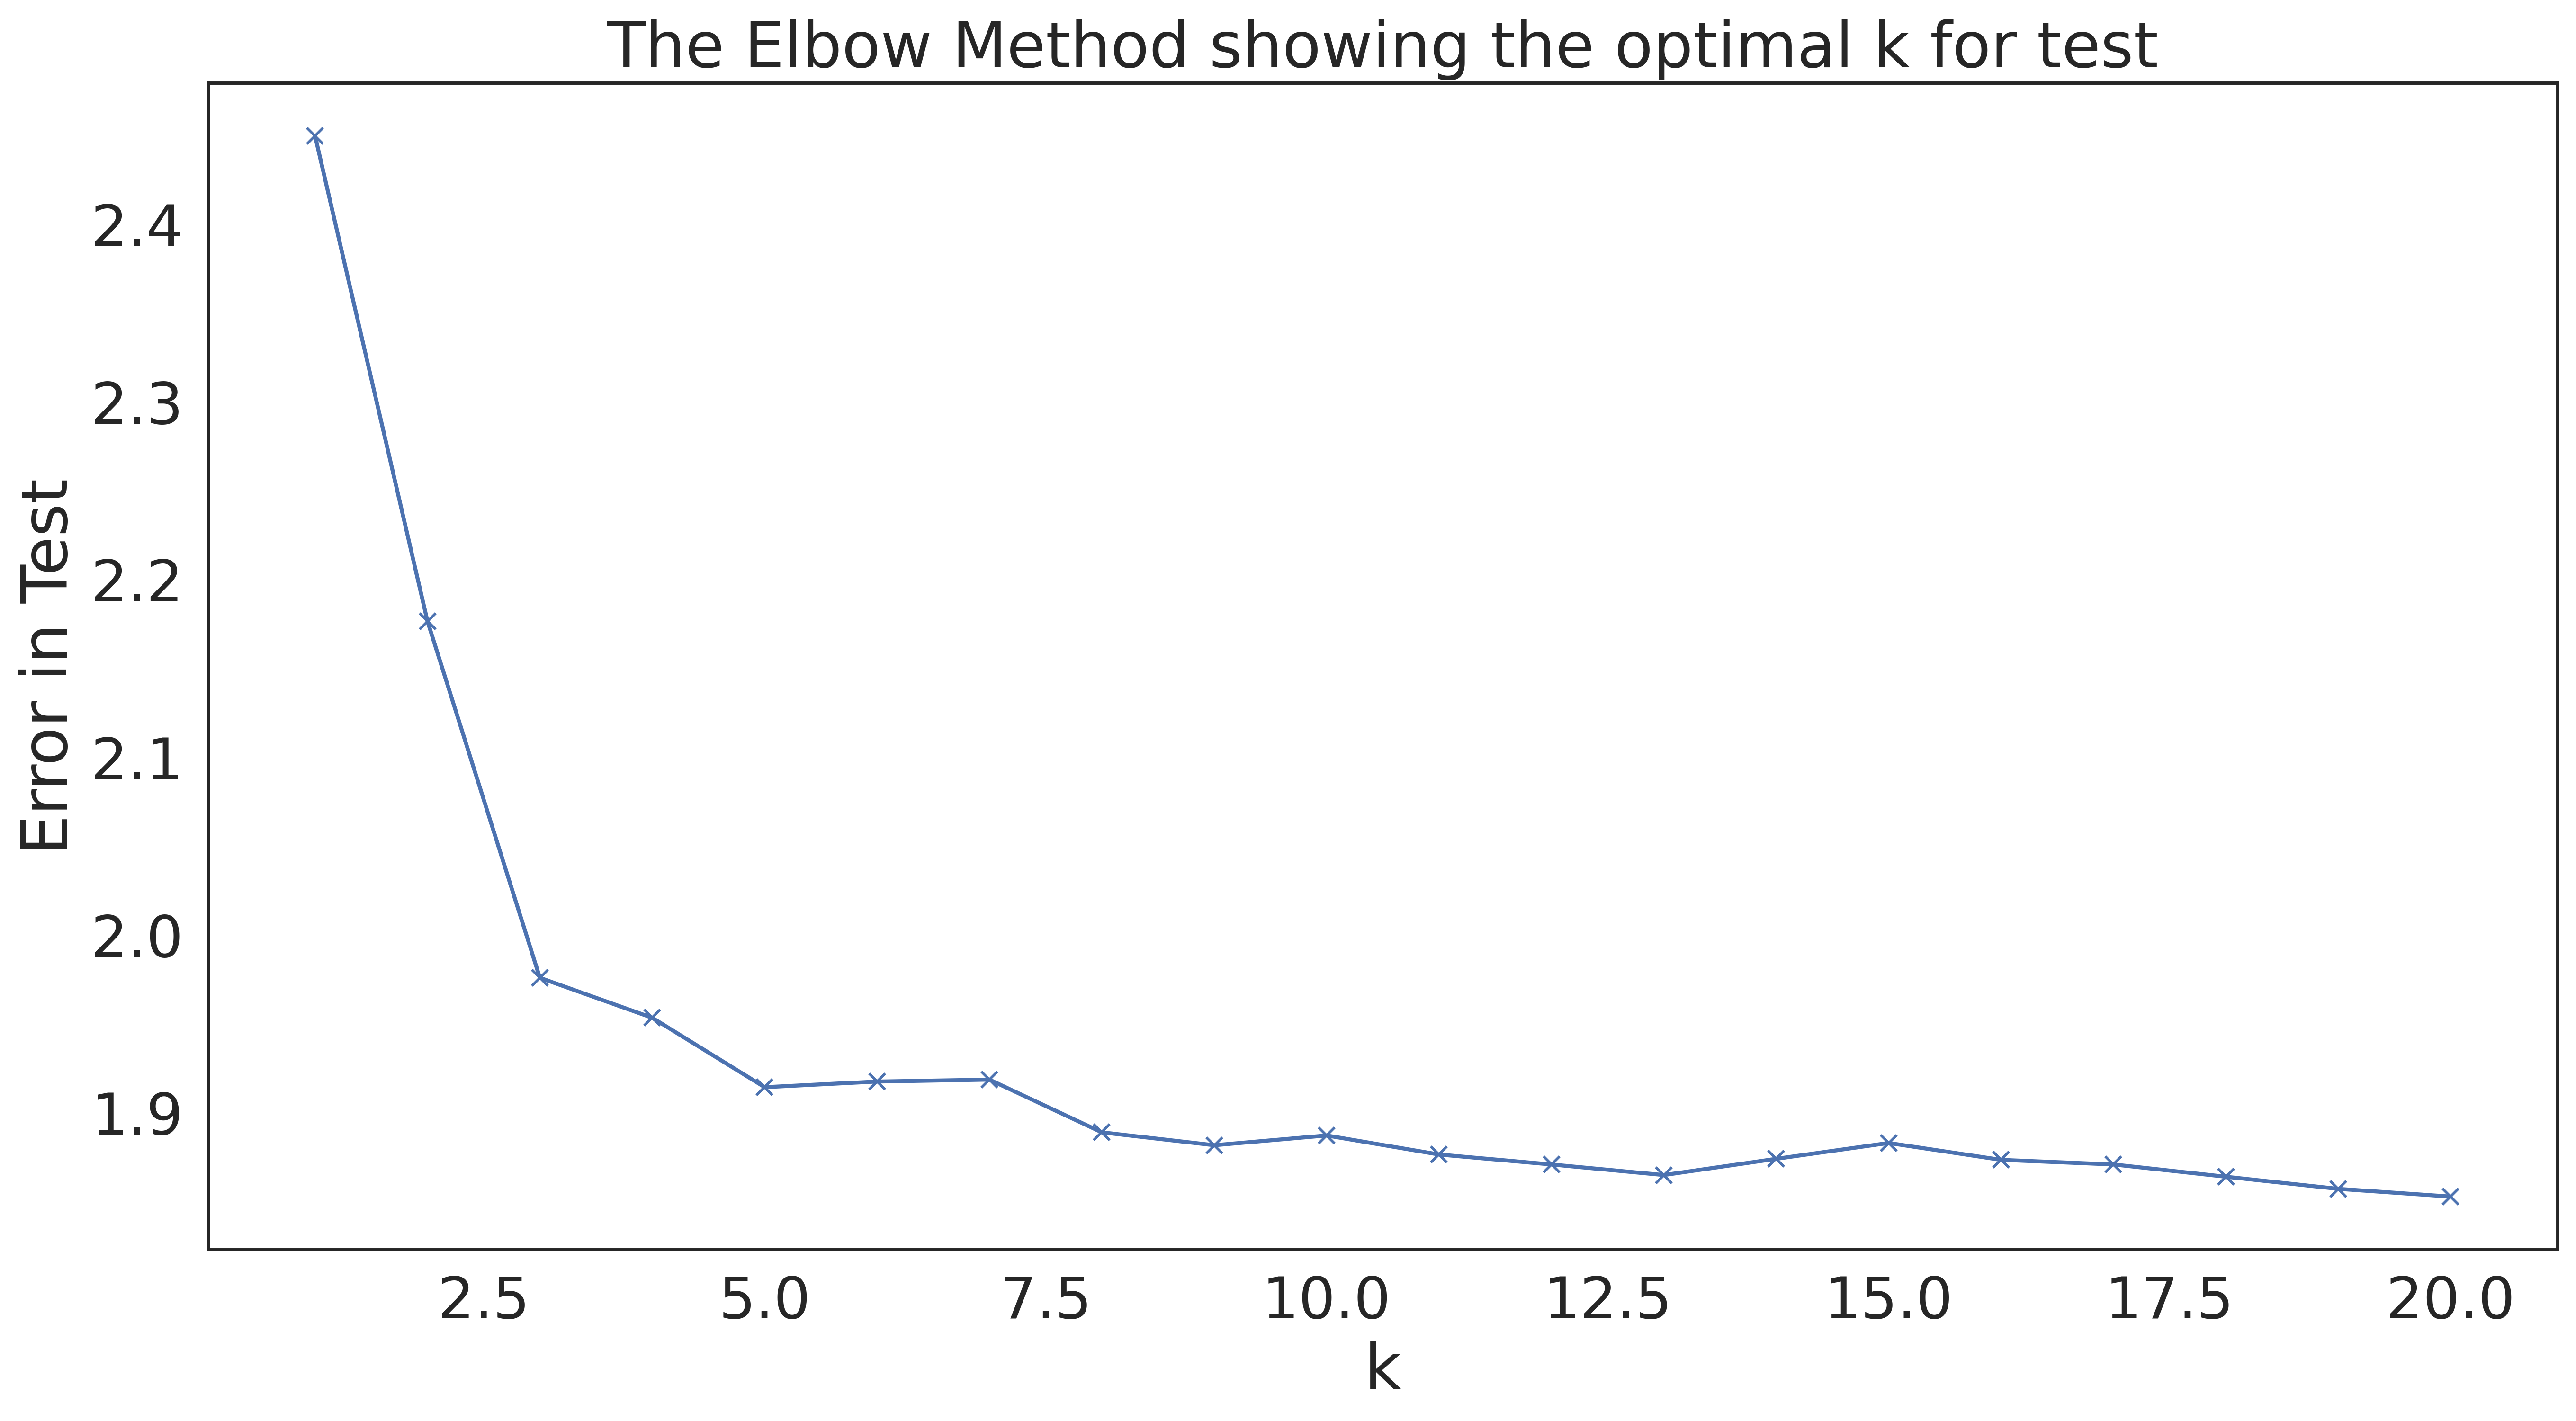

In [137]:
plt.figure(figsize=(16,8), dpi=400)
plt.plot(K, rmse_val_test, 'bx-')
plt.xlabel('k')
plt.ylabel('Error in Test')
plt.title('The Elbow Method showing the optimal k for test')
plt.show()

In [138]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 5)


In [139]:
knn_model.fit(X_train, y_train)  #fit the model
y_train_pred_knn=knn_model.predict(X_train) #make prediction on train set
y_test_pred_knn=knn_model.predict(X_test) #make prediction on train set

In [140]:
# Model Evaluation
R_squared_train_knn = metrics.r2_score(y_train, y_train_pred_knn)
Adjusted_R_square_train_knn= 1 - (1-metrics.r2_score(y_train, y_train_pred_knn))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

MSE_train_knn = metrics.mean_squared_error(y_train, y_train_pred_knn)
RMSE_train_knn = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_knn))


print('R^2:', R_squared_train_knn)
print('Adjusted R^2:',Adjusted_R_square_train_knn)
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred_knn))
print('MSE:',MSE_train_knn)
print('RMSE:',RMSE_train_knn)

R^2: 0.4144268500247257
Adjusted R^2: 0.34580499651199825
MAE: 0.7095198606271778
MSE: 1.3157321127526131
RMSE: 1.1470536660298911


In [141]:
# Model Evaluation
R_squared_test_knn = metrics.r2_score(y_test, y_test_pred_knn)
Adjusted_R_square_test_knn= 1 - (1-metrics.r2_score(y_test, y_test_pred_knn))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

MSE_test_knn = metrics.mean_squared_error(y_test, y_test_pred_knn)
RMSE_test_knn = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_knn))

print('R^2:', R_squared_test_knn)
print('Adjusted R^2:',Adjusted_R_square_test_knn)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_knn))
print('MSE:',MSE_test_knn)
print('RMSE:',RMSE_test_knn)

R^2: -0.011524972674435308
Adjusted R^2: -0.3413700724595774
MAE: 1.0175073170731708
MSE: 3.6649698097560988
RMSE: 1.9144110869288495


===== Mean of Residuals====
Mean of Residuals 0.11807317073170737
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 1.2232557619579565), ('p-value', 0.13902751220620402)]


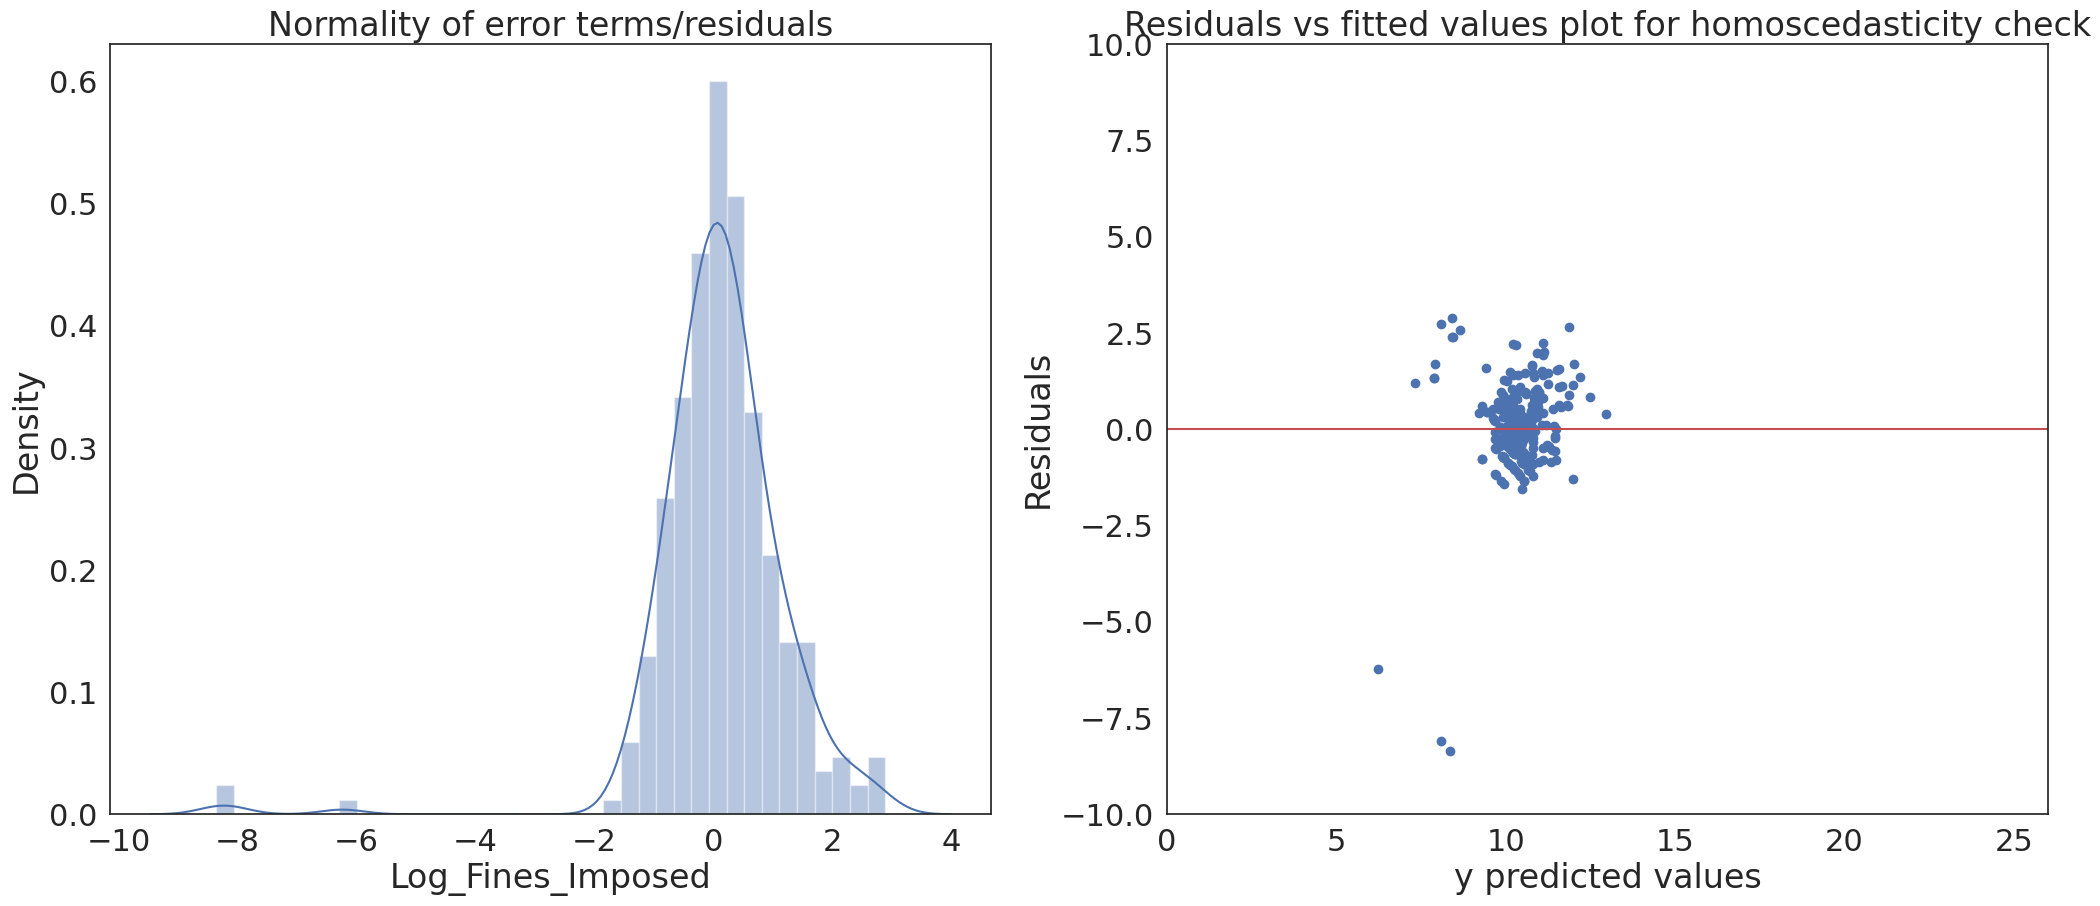

In [142]:
Run_Linear_Regrssion_Assumption(y_train,y_train_pred_knn,X_train )

===== Mean of Residuals====
Mean of Residuals 0.1718520325203253
====Stastical Test for Homoscedasticity i.e. Goldfeld Quandt Test=====
[('F statistic', 1.5670215327063493), ('p-value', 0.09558217255284654)]


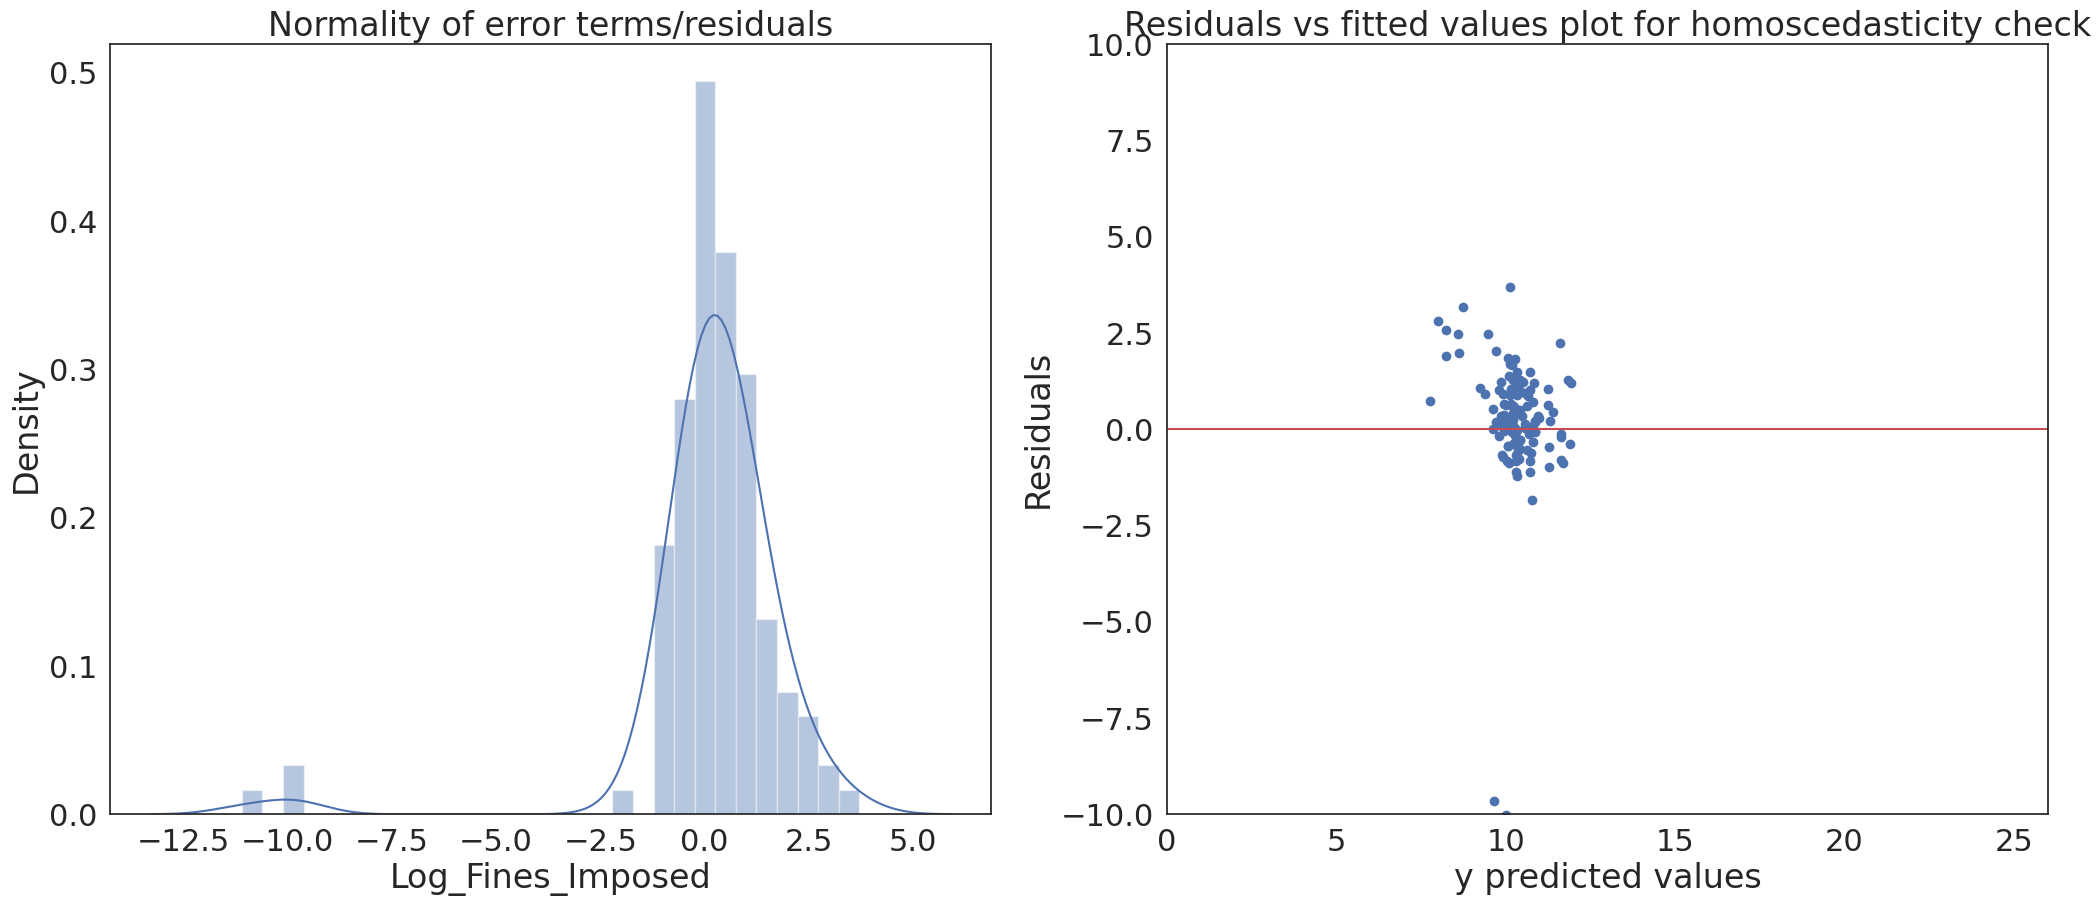

In [143]:
Run_Linear_Regrssion_Assumption(y_test,y_test_pred_knn,X_test )

### Evaluation and comparision of all the models for Test Data

In [144]:
models_R_Score = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'CatBoost Regression','KNN Regression','Lasso','Ridge','Elastic'],
    'R^2-Train': [R_squared_train_linear*100, R_squared_train_rf*100, R_squared_train_xgb*100,  R_squared_train_cb*100, R_squared_train_knn*100,R_squared_train_lasso*100,R_squared_train_ridge*100,R_squared_train_elastic*100],
    'R^2-Test': [R_squared_test_linear*100, R_squared_test_rf*100, R_squared_test_xgb*100,  R_squared_test_cb*100, R_squared_test_knn*100,R_squared_test_lasso*100,R_squared_test_ridge*100,R_squared_test_elastic*100],

    'Adj R^2-Train': [ Adjusted_R_square_train_linear*100, Adjusted_R_square_train_rf*100, Adjusted_R_square_train_xgb*100,  Adjusted_R_square_train_cb*100, Adjusted_R_square_train_knn*100,Adjusted_R_square_train_lasso*100,Adjusted_R_square_train_ridge*100,Adjusted_R_square_train_elastic*100], 
    'Adj R^2-Test': [Adjusted_R_square_test_linear*100, Adjusted_R_square_test_rf*100, Adjusted_R_square_test_xgb*100, Adjusted_R_square_test_cb*100, Adjusted_R_square_test_knn*100,Adjusted_R_square_test_lasso*100,Adjusted_R_square_test_ridge*100,Adjusted_R_square_test_elastic*100]
    
    })
#models.sort_values(by='R-squared Score', ascending=False)


In [145]:
models_Error_score = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost','CatBoost Regression','KNN Regression','Lasso','Ridge','Elastic'],

    'MSE-Train': [ MSE_train_linear, MSE_train_rf, MSE_train_xgb, MSE_train_cb, MSE_train_knn,MSE_train_lasso,MSE_train_ridge,MSE_train_elastic],
    'MSE-Test':  [MSE_test_linear, MSE_test_rf, MSE_test_xgb, MSE_test_cb, MSE_test_knn,MSE_test_lasso,MSE_test_ridge,MSE_test_elastic],
    
    'RMSE-Train': [RMSE_train_linear, RMSE_train_rf, RMSE_train_xgb, RMSE_train_cb, RMSE_train_knn,RMSE_train_lasso,RMSE_train_ridge,RMSE_train_elastic],
    'RMSE-Test': [RMSE_test_linear, RMSE_test_rf, RMSE_test_xgb,  RMSE_test_cb, RMSE_test_knn,RMSE_test_lasso,RMSE_test_ridge,RMSE_test_elastic],\
    
    })
#models.sort_values(by='R-squared Score', ascending=False)


In [146]:
models_R_Score

Model   R^2-Train      R^2-Test  Adj R^2-Train  Adj R^2-Test
0    Linear Regression  -18.649110 -2.982059e-11      39.441325 -2.282523e+25
1        Random Forest   90.002548  2.547520e+01      88.830971  1.173628e+00
2              XGBoost   99.999932  2.026962e+01      99.999923 -5.729416e+00
3  CatBoost Regression   99.732630  3.042386e+01      99.701298  7.735982e+00
4       KNN Regression   41.442685 -1.152497e+00      34.580500 -3.413701e+01
5                Lasso -151.427580 -6.333000e+02      31.350284 -1.376702e+01
6                Ridge  -18.443600 -2.463342e+02      39.441753 -1.770635e+01
7              Elastic  -88.166399 -4.323563e+02      36.093703 -1.278126e+01

In [147]:
models_Error_score

Model  MSE-Train      MSE-Test  RMSE-Train     RMSE-Test
0    Linear Regression   1.217970  6.236444e+23    1.103617  7.897116e+11
1        Random Forest   0.224634  2.700192e+00    0.473956  1.643226e+00
2              XGBoost   0.000002  2.888801e+00    0.001240  1.699647e+00
3  CatBoost Regression   0.006008  2.520892e+00    0.077508  1.587732e+00
4       KNN Regression   1.315732  3.664970e+00    1.147054  1.914411e+00
5                Lasso   1.380699  3.108409e+00    1.175031  1.763068e+00
6                Ridge   1.217961  3.216042e+00    1.103613  1.793333e+00
7              Elastic   1.285298  3.081476e+00    1.133710  1.755413e+00

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=909b4f47-24e3-4666-99ce-533f2f1a4fb0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>